## Set-Up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install matplotlib numpy sklearn pandas cvxopt scipy progressbar33 terminaltables xmltodict
!pip install gym ultralytics torch torchvision opencv-python tensorflow-object-detection-api doqu
!pip install roboflow
!pip install -r "/content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/requirements.txt"

In [ ]:
!pip3 uninstall tensorflow # absl-py astunparse flatbuffers gast google-pasta grpcio h5py keras keras-preprocessing libclang numpy opt-einsum protobuf setuptools six tensorboard tensorflow-io-gcs-filesystem termcolor tf-estimator-nightly typing-extensions wrapt
!pip3 install --no-cache-dir tensorflow==2.12.0
# !pip3 install --no-cache-dir keras==2.6.0
!pip3 install --no-cache-dir keras==2.12.0
# !pip uninstall keras keras-nightly keras-preprocessing tensorboard tensorflow tb-nightly tf-nightly
!pip install keras-rl2 # tensorflow
!pip install setuptools==65.5.0  # 67.7.1

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 303.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependen

In [ ]:
%%capture
# !pip install stable-baselines3[extra] pyglet
!pip install xmltodict
!pip install keras-cv
# !pip install wheel setuptools pip --upgrade

# %%capture
# !apt install --allow-change-held-packages libcudnn8=8.6.0.163-1+cuda11.8
# !pip cache purge
# !pip install tensorflow-gpu

In [ ]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b5588578-9227-135a-564c-667f3967d732)


In [ ]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

# Verify that TensorFlow is now using the GPU
print("TensorFlow is using GPU:", tf.test.is_built_with_cuda())

Python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]

NumPy 1.23.5

TensorFlow 2.12.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU
TensorFlow is using GPU: True


In [ ]:
# https://www.tensorflow.org/install/source#gpu

!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Aug 15 06:55:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# # If using GPU
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU device found")
    for gpu in gpus:
        print("Name:", gpu.name)
        print("Memory:", tf.config.experimental.get_memory_growth(gpu))
else:
    print("No GPU device found")

GPU device found
Name: /physical_device:GPU:0
Memory: None


In [ ]:
# Check if cuDNN is being used
if tf.test.is_built_with_cuda():
    print("TensorFlow is built with CUDA support")
    for gpu in gpus:
        dev_name = gpu.name.lower()
        if 'cudnn' in dev_name:
            print("cuDNN is being used on", gpu.name)
        else:
            print("cuDNN is not being used on", gpu.name)
else:
    print("TensorFlow is not built with CUDA support")

# from tensorflow.python.framework.ops import disable_eager_execution

# # Disable eager execution to configure cuDNN
# disable_eager_execution()

TensorFlow is built with CUDA support
cuDNN is not being used on /physical_device:GPU:0


In [ ]:
import random
import cv2
from PIL import Image
import os
from collections import deque, defaultdict

import torch.nn as nn
import torch.optim as optim
import torch
import torchvision

from gym import spaces
from ultralytics import YOLO
# from stable_baselines3 import PPO
# from stable_baselines3.common.callbacks import BaseCallback
from rl.agents.dqn import DQNAgent
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization, Reshape, Input
from tensorflow.keras.optimizers.legacy import Adam, RMSprop, SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras import backend as K
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from keras_cv.models import YOLOV8Backbone
# from tensorflow.keras.optimizers import RMSprop, SGD, Adam
# from keras.layers import Dense, Activation
# from keras import Sequential
# from keras.models import load_model
# from tensorflow.keras.optimizers import Adam
# from YOLOv8.models import Darknet
# from YOLOv8.utils.datasets import ListDataset
# from YOLOv8.utils.utils import xywh2xyxy, non_max_suppression, ap_per_class, scale_coords, plot_one_box

from roboflow import Roboflow
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.10/dist-packages/thop/profile.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(torch.__version__) < LooseVersion("1.0.0"):


## Dataset

In [ ]:
# rf = Roboflow(api_key="02JljQ26qA8MzNIYHudb")
# project = rf.workspace().project("soccer-players-ckbru")
# model_ = project.version(13).model

# # infer on a local image
# print(model_.predict("your_image.jpg", confidence=40, overlap=30).json())

# # visualize your prediction
# # model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# # infer on an image hosted elsewhere
# # print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

In [ ]:
if "dataset_football" not in os.listdir() :
    os.mkdir('dataset_football')

os.chdir("/content/dataset_football/")
os.getcwd()

'/content/dataset_football'

In [ ]:
# %%capture
!unzip /content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/Dataset/football-players-detection.v4i.yolov8.zip

Archive:  /content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/Dataset/football-players-detection.v4i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg  
 extracting: test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg  
 extracting: test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg  
 extracting: test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg  
 extracting: test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg  
 extracting: test/images/573e61_1_9_png.rf.e82af77d907cdc12dccbd6857f53b9b1.jpg  
 extracting: test/images/573e61_9_6_png.rf.fc52856b5974cb67862c25bae96f25ad.jpg  
 extracting: test/images/744b27_1_10_png.rf.e6f27d3b66a0c6720b9e9e50265251a6.jpg  
 extracting: test/images/744b27_7_4_png.rf.3431eaf3ff56847b5076376771bdf9

In [ ]:
os.chdir("/content/")

if "dataset_football_original" not in os.listdir() :
    os.mkdir('dataset_football_original')

os.chdir("/content/dataset_football_original/")
os.getcwd()

'/content/dataset_football_original'

In [ ]:
# %%capture
!unzip /content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/Dataset/football-players-detection.v4i.yolov8.zip

Archive:  /content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/Dataset/football-players-detection.v4i.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg  
 extracting: test/images/42ba34_1_5_png.rf.4337fde8fbe3640cf4351fb41ac9c3ca.jpg  
 extracting: test/images/42ba34_5_5_png.rf.ceb556bd4c92d41496ae1d8c56600c4a.jpg  
 extracting: test/images/4b770a_1_4_png.rf.5a45b3b841a06de414ceb802e34c136f.jpg  
 extracting: test/images/4b770a_3_6_png.rf.d0d9403f2f73ca0da7a6a1373c02b749.jpg  
 extracting: test/images/573e61_1_9_png.rf.e82af77d907cdc12dccbd6857f53b9b1.jpg  
 extracting: test/images/573e61_9_6_png.rf.fc52856b5974cb67862c25bae96f25ad.jpg  
 extracting: test/images/744b27_1_10_png.rf.e6f27d3b66a0c6720b9e9e50265251a6.jpg  
 extracting: test/images/744b27_7_4_png.rf.3431eaf3ff56847b5076376771bdf9

In [ ]:
# combination files between valid and test
# because we will not use valid dataset
import shutil

valid_folder_img = "/content/dataset_football/valid/images"
valid_folder_label = "/content/dataset_football/valid/labels"
test_folder_img = "/content/dataset_football/test/images"
test_folder_label = "/content/dataset_football/test/labels"

print("The total img/label in valid before copying: ", len(os.listdir(valid_folder_img)))
print("The total img/label in test before copying: ", len(os.listdir(test_folder_img)))

for filename_img in os.listdir(valid_folder_img):
    source_file = os.path.join(valid_folder_img, filename_img)
    destination_file = os.path.join(test_folder_img, filename_img)

    shutil.copy2(source_file, destination_file)

for filename_label in os.listdir(valid_folder_label):
    source_file = os.path.join(valid_folder_label, filename_label)
    destination_file = os.path.join(test_folder_label, filename_label)

    shutil.copy2(source_file, destination_file)

print("The total img/label in valid after copying: ", len(os.listdir(test_folder_img)))

print("The ratio of train_test_split is 80:20 right now.")

The total img/label in valid before copying:  38
The total img/label in test before copying:  13
The total img/label in valid after copying:  51
The ratio of train_test_split is 80:20 right now.


In [ ]:
os.chdir("/content/")
os.getcwd()

'/content'

In [ ]:
len(os.listdir("/content/dataset_football/train/images"))

204

## Environment for Object Detection model

In [ ]:
import torch
import numpy as np
import cv2
import random
import gym
from gym import spaces
from PIL import Image
# from gym.spaces.discrete import Discrete
import os
import pandas as pd
import numpy as np
import sys
import xmltodict
import math
import random
import matplotlib.pyplot as plt
import time
from collections import Counter

In [ ]:
num_classes = 4
theresold_reward = 0.5

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello, World!' + color.END)
print(color.BOLD + color.PURPLE + 'Hello, World!' + color.END + color.END)

Hello, World!
Hello, World!


In [ ]:
file_names = ["lst_ep_cur_each_historys_write_", "lst_mean_iou_historys_write_",
              "lst_reward_historys_write_", "lst_time_historys_write_", "lst_time_each_historys_write_", "lst_last_mean_iou_historys_write_"]
file_names_test = ["test_ep_cur_each_historys_write_", "test_mean_iou_historys_write_",
                   "test_time_historys_write_", "test_last_mean_iou_historys_write_"]
words_unnessary = ["lst_ep_cur", "lst_mean_iou", "lst_reward", "lst_time_each", "lst_time", "lst_last_mean_iou"]
# output_file = "combined_file.txt"

def text_combined_file(path_files, lst_file_names=file_names, num_last=10):
    os.chdir(path_files)

    for file_name in lst_file_names:
        combine_elements = ''
        with open(file_name + "combined_file.txt", "w") as outfile:
            for i in range(num_last+1):
                file_index = file_name + str(i) + ".txt"
                # print(file_index)
                try:
                    with open(file_index, "r") as infile:
                        contents = infile.read()
                        # print("contents ", contents)
                        modified_contents = contents

                        for wd in words_unnessary :
                            modified_contents = modified_contents.replace(wd, '').strip()

                        if file_name not in ["lst_ep_cur_each_historys_write_"]:
                            count_contents = len(modified_contents.split(" "))
                            print(f"{file_index} have the total of value: {count_contents}")
                        else:
                            split_values = modified_contents.split(" ")
                            count_tuples = sum("(" in value for value in split_values)
                                # print("split_values ", split_values)
                                # split_values = [tuple_str.strip("()") for tuple_str in split_values]
                                # print("split_values ", split_values)
                                # aa = [tuple(map(int, tuple_str.split(","))) for tuple_str in split_values]
                                # print("aa ", aa)
                            #     count_contents = Counter(tuples)
                            print(f"{file_index} have the total of value: {count_tuples}")

                        combine_elements += modified_contents
                        combine_elements += ' '

                except:
                    # print("SKIP this number")
                    pass

            outfile.write(combine_elements)
            outfile.write("\n")

    for file_name in lst_file_names:
        file_combine = file_name + "combined_file.txt"
        with open(file_combine, "r") as outfile_r:
            print("file_combine ", file_combine)
            contents_all = outfile_r.read()
            contents_all = contents_all.strip()

            if file_name not in ["lst_ep_cur_each_historys_write_"]:
                count_contents_all = len(contents_all.split(" "))
            else:
                split_values_ = contents_all.split(" ")
                count_contents_all = sum("(" in value for value in split_values_)

            print(f"{file_combine} have the total of value: {count_contents_all}")

    os.chdir("/content/")

def nine_squared(img_mx_size=(300,300), rescale_percent=0.1):
    rescale_x = (rescale_percent*img_mx_size[0] / 2)
    rescale_y = (rescale_percent*img_mx_size[1] / 2)

    # create point
    x_axis_0 = rescale_x
    x_axis_1 = img_mx_size[0] - (img_mx_size[0] / 2)
    x_axis_2 = img_mx_size[0] - rescale_x
    y_axis_0 = rescale_y
    y_axis_1 = img_mx_size[1] - (img_mx_size[1] / 2)
    y_axis_2 = img_mx_size[1] - rescale_y

    # 9 points of axis
    center = (x_axis_1, y_axis_1)
    top_left = (x_axis_0, y_axis_2)
    top = (x_axis_1, y_axis_2)
    top_right = (x_axis_2, y_axis_2)
    left = (x_axis_0, y_axis_1)
    bottom_left = (x_axis_0, y_axis_0)
    bottom = (x_axis_1, y_axis_0)
    bottom_right = (x_axis_2, y_axis_0)
    right = (x_axis_2, y_axis_1)

    dict_nine_point_squared = {"top_left": top_left, "top": top, "top_right": top_right,
                               "left": left, "center": center, "right": right,
                               "bottom_left": bottom_left, "bottom": bottom, "bottom_right": bottom_right}
    dict_nine_squared = {}

    for k, v in dict_nine_point_squared.items():
        x_min = v[0] - rescale_x
        y_min = v[1] - rescale_y
        x_max = v[0] + rescale_x
        y_max = v[1] + rescale_y

        dict_nine_squared[k] = [x_min, y_min, x_max, y_max]

    return dict_nine_squared

def nine_squared_adjust(img_mx_size=(300,300), rescale_percent=0.1):
    rescale_x = (rescale_percent*img_mx_size[0] / 2) # 15
    rescale_y = (rescale_percent*img_mx_size[1] / 2) # 15

    # create point
    x_axis_0 = rescale_x
    x_axis_1 = img_mx_size[0] - (img_mx_size[0] / 2)
    x_axis_2 = img_mx_size[0] - rescale_x
    y_axis_0 = rescale_y
    y_axis_1 = img_mx_size[1] - (img_mx_size[1] / 2)
    y_axis_2 = img_mx_size[1] - rescale_y

    adjust_x = int(x_axis_1 - rescale_x) * 0.25  # 150-15 == 135 / 2 == 67
    adjust_y = int(y_axis_1 - rescale_y) * 0.25  # 150-15 == 135 / 2 == 67

    # 9 points of axis
    center = (x_axis_1, y_axis_1)
    top_left = (x_axis_0+adjust_x, y_axis_2-adjust_y)
    top = (x_axis_1, y_axis_2-adjust_y)
    top_right = (x_axis_2-adjust_x, y_axis_2-adjust_y)
    left = (x_axis_0+adjust_x, y_axis_1)
    bottom_left = (x_axis_0+adjust_x, y_axis_0+adjust_y)
    bottom = (x_axis_1, y_axis_0+adjust_y)
    bottom_right = (x_axis_2-adjust_x, y_axis_0+adjust_y)
    right = (x_axis_2-adjust_x, y_axis_1)

    dict_nine_point_squared = {"top_left": top_left, "top": top, "top_right": top_right,
                               "left": left, "center": center, "right": right,
                               "bottom_left": bottom_left, "bottom": bottom, "bottom_right": bottom_right}
    dict_nine_squared = {}

    for k, v in dict_nine_point_squared.items():
        x_min = v[0] - rescale_x
        y_min = v[1] - rescale_y
        x_max = v[0] + rescale_x
        y_max = v[1] + rescale_y

        dict_nine_squared[k] = [x_min, y_min, x_max, y_max]

    return dict_nine_squared

def calculate_average_last(filename, delimiter=' ', iou_or_time="iou"):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()
            total_sum = 0
            num_values = 0

            for line in lines:
                values = line.strip().split(delimiter)
                for value in values:
                    try:
                        num = float(value)
                        total_sum += num
                        num_values += 1
                    except ValueError:
                        pass  # Skip non-numeric lines

            if (num_values > 0) and (iou_or_time=="iou"):
                average = round(float(total_sum / num_values), 4)
                return average
            elif (num_values > 0) and (iou_or_time=="time"):
                return total_sum
            else:
                return None

    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return None

In [ ]:
def get_id_class_name(class_name):
    if class_name == "ball":
        return 0
    elif class_name == "goalkeeper":
        return 1
    elif class_name == "player":
        return 2
    elif class_name == "referee":
        return 3

classes_index_name = {0: "ball",
                1: "goalkeeper",
                2: "player",
                3: "referee" }
classes_name_index = { "ball": 0,
                       "goalkeeper": 1,
                       "player": 2,
                       "referee": 3}

def check_keys_dict_only(lst_dict):
    unique_class = set()
    for i in lst_dict:
        unique_class.add(get_id_class_name(i['class']))

    return unique_class

def read_label(label_txt):
    with open(label_txt) as f :
        each_value = [ text_i.replace("\n", "").split(" ") for text_i in f.readlines()]
        list_class_and_box = []
        for i in each_value :
            dict_class = {}
            dict_class["class"] = classes_index_name[int(i[0])]
            dict_class["box"] = i[1:]
            list_class_and_box.append(dict_class)

    return list_class_and_box

def transform_groundtruth_to_keyvalues(ground_truth_boxes_, classes_name_index_): # , img_size_xy=(224,224)
    box_by_class = {}
    for b in ground_truth_boxes_:
        class_name = b['class']
        class_idx = classes_name_index_.get(class_name, None)
        # box_crods = [ float(b['box'][idx]) * img_size_xy[0] if idx in [0,2] else float(b['box'][idx]) * img_size_xy[1] for idx in range(len(b['box'])) ]
        box_crods = [ float(coord) for coord in b['box'] ]

        if class_idx not in box_by_class:
            box_by_class[class_idx] = []
        box_by_class[class_idx].append(box_crods)

    box_by_class = {int(k): v for k,v in box_by_class.items()}

    return box_by_class

def xywh2xyxy_in_dict(list_xywh, rescale_img_size_x=1, rescale_img_size_y=1):
    x_center = list_xywh[0] * rescale_img_size_x
    y_center = list_xywh[1] * rescale_img_size_y
    width = list_xywh[2] * rescale_img_size_x
    height = list_xywh[3] * rescale_img_size_y

    x_min = round(x_center - width, 2 )
    y_min = round(y_center - height, 2)
    x_max = round(x_center + width, 2)
    y_max = round(y_center + height, 2)

    dict_xyxy = {"x_min": x_min, "y_min": y_min, "x_max": x_max, "y_max": y_max}

    return dict_xyxy

def xywh2xyxy_in_list(list_xywh, rescale_img_size_x=1, rescale_img_size_y=1):
    x_center = list_xywh[0] * rescale_img_size_x
    y_center = list_xywh[1] * rescale_img_size_y
    width = list_xywh[2] * rescale_img_size_x
    height = list_xywh[3] * rescale_img_size_y

    x_min = round(x_center - width, 2 )
    y_min = round(y_center - height, 2)
    x_max = round(x_center + width, 2)
    y_max = round(y_center + height, 2)

    list_xyxy = [x_min, y_min, x_max, y_max]

    return list_xyxy

def pred_box(model, img, img_size=(224,224), confidence=0.5):
    img = cv2.imread(img)
    img_resize = cv2.resize(img, img_size)
    pred_model = model.predict(img_resize, conf=confidence)

    return pred_model

def transform_predbox_to_list(pred_model):
    lst_new = []
    boxes_ = pred_model[0].boxes
    box = boxes_

    for value in list(zip(box.xyxy, box.cls)) :
        xy_value = value[0].tolist()
        cls_value = [int(value[1])]
        xy_value.extend(cls_value)
        lst_new.append(xy_value)

    return lst_new  # (N, 5) >> (x_min, y_min, x_max, y_max, cls)

def WriteReplace_dict_to_txt_file(filename, dict_value, img_size=224):
    with open(filename, "w") as f :
        for key, values in dict_value.items():
            for v in values :
                f.write(f"{key} ")
                all_bb = " ".join( str(bb/img_size) for bb in v)
                f.write(all_bb)
                f.write("\n")
    with open(filename, "rb+") as f:
        f.seek(-1, os.SEEK_END)
        f.truncate()

def initial_mask_pair_with_groundtruth(label_txt, classes_name_index, history_size=4, img_size_=(224,224)):
    ground_truth_boxes_ = read_label(label_txt)  # "/content/dataset_football/test/labels/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.txt"
    transform_gt_box_to_kv = transform_groundtruth_to_keyvalues(ground_truth_boxes_, classes_name_index) # , img_size_xy=img_size_
    xywh2xyxy_by_k = {k: list(map(lambda x: xywh2xyxy_in_list(x, rescale_img_size_x=img_size_[0], rescale_img_size_y=img_size_[1]), v ))
                        for k, v in transform_gt_box_to_kv.items()}

    pair_m_gt_hs = []
    # currrent_mask will be like this (groundtruth, pred_box)
    # [ ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax]), ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax]), ...]

    total_value = np.arange(0, len(ground_truth_boxes_))
    for num_cls in range(len(classes_name_index.keys())):
        if num_cls not in xywh2xyxy_by_k.keys():
            continue

        for i in range(len(xywh2xyxy_by_k[num_cls])) :
            five_dim_groundtruth = xywh2xyxy_by_k[num_cls][i] + [num_cls] #.append(num_cls) # [xmin, ymin, xmax, ymax, cls]
            # four_dim_new_mask = [0, 0, img_size_[0], img_size_[1]] # [xmin, ymin, xmax, ymax] >> new bounding-box
            nine_sq = nine_squared_adjust(img_mx_size=(img_size_[0], img_size_[1]), rescale_percent=0.1)
            four_dim_new_mask = random.choice(list(nine_sq.values()))
            history_sz = [-1] * history_size

            pair_m_gt_hs.append((five_dim_groundtruth, four_dim_new_mask, history_sz))

    return pair_m_gt_hs

# def resume_mask_pair_with_groundtruth(label_txt, classes_name_index, masks, history_size=4, img_size_=224, img_size_x_=1, img_size_y_=1):
#     ground_truth_boxes_ = read_label(label_txt)  # "/content/dataset_football/test/labels/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.txt"
#     transform_gt_box_to_kv = transform_groundtruth_to_keyvalues(ground_truth_boxes_, classes_name_index, img_size=img_size_)
#     xywh2xyxy_by_k = {k: list(map(lambda x: xywh2xyxy_in_list(x, img_size_x=img_size_x_, img_size_y=img_size_y_), v )) for k, v in transform_gt_box_to_kv.items()}

#     pair_m_gt = []
#     # currrent_mask will be like this (groundtruth, pred_box)
#     # [ ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax]), ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax]), ...]

#     total_value = np.arange(0, len(ground_truth_boxes_))
#     for num_cls in range(len(classes_name_index.keys())):
#         if num_cls not in xywh2xyxy_by_k.keys():
#             continue

#         for i in range(len(xywh2xyxy_by_k[num_cls])) :
#             five_dim_groundtruth = xywh2xyxy_by_k[num_cls][i] + [num_cls] #.append(num_cls) # [xmin, ymin, xmax, ymax, cls]
#             four_dim_new_mask = [0, 0, img_size_, img_size_] # [xmin, ymin, xmax, ymax] >> new bounding-box

#             pair_m_gt.append((five_dim_groundtruth, four_dim_new_mask))

#     return pair_m_gt

def six_historys_write(lst_time, lst_time_each, lst_ep_cur, lst_reward, lst_mean_iou, lst_last_mean_iou, round_save_failure=0):
    with open(f"lst_time_historys_write_{round_save_failure}.txt", "w") as file0:
        # lst_time
        file0.write("lst_time" + " ")
        for item in lst_time:
            file0.write(str(item) + " ")

    with open(f"lst_time_each_historys_write_{round_save_failure}.txt", "w") as file1:
        # lst_time_each
        file1.write("lst_time_each" + " ")
        for item in lst_time_each:
            file1.write(str(item) + " ")

    with open(f"lst_ep_cur_each_historys_write_{round_save_failure}.txt", "w") as file2:
        # lst_ep_cur
        file2.write("lst_ep_cur" + " ")
        for item in lst_ep_cur:
            file2.write(str(item) + " ")

    with open(f"lst_reward_historys_write_{round_save_failure}.txt", "w") as file3:
        # lst_reward
        file3.write("lst_reward" + " ")
        for item in lst_reward:
            file3.write(str(item) + " ")
        # file.write("\n")
        # file.write("\n")

    with open(f"lst_mean_iou_historys_write_{round_save_failure}.txt", "w") as file4:
        # lst_mean_iou
        file4.write("lst_mean_iou" + " ")
        for item in lst_mean_iou:
            file4.write(str(item) + " ")

    with open(f"lst_last_mean_iou_historys_write_{round_save_failure}.txt", "w") as file5:
        # lst_mean_iou
        file5.write("lst_last_mean_iou" + " ")
        for item in lst_last_mean_iou:
            file5.write(str(item) + " ")

    print("write a text file for collecting the history results.")

def test_four_historys_write(lst_time, lst_ep_cur, lst_mean_iou, lst_last_mean_iou, round_save_failure=0):
    with open(f"test_time_historys_write_{round_save_failure}.txt", "w") as file0:
        # lst_time
        file0.write("lst_time" + " ")
        for item in lst_time:
            file0.write(str(item) + " ")

    with open(f"test_ep_cur_each_historys_write_{round_save_failure}.txt", "w") as file2:
        # lst_ep_cur
        file2.write("lst_ep_cur" + " ")
        for item in lst_ep_cur:
            file2.write(str(item) + " ")

    with open(f"test_mean_iou_historys_write_{round_save_failure}.txt", "w") as file4:
        # lst_mean_iou
        file4.write("lst_mean_iou" + " ")
        for item in lst_mean_iou:
            file4.write(str(item) + " ")

    with open(f"test_last_mean_iou_historys_write_{round_save_failure}.txt", "w") as file5:
        # lst_mean_iou
        file5.write("lst_last_mean_iou" + " ")
        for item in lst_last_mean_iou:
            file5.write(str(item) + " ")

    print("write a text file for collecting the history results. IN TEST.")


In [ ]:
def get_ground_truth_box():
    # Return the ground truth bounding box for the current image
    ground_truth_box = [10, 10, 50, 50] # [xmin, ymin, xmax, ymax]
    return ground_truth_box

def get_initial_predicted_box():
    # Return the initial predicted bounding box for the current image
    initial_predicted_box = [0, 0, 10, 10] # [xmin, ymin, xmax, ymax]
    return initial_predicted_box

def get_img_dataset():
    list_img_train = os.listdir("/content/dataset_football/train/images")
    list_img_val = os.listdir("/content/dataset_football/valid/images")
    list_img_test = os.listdir("/content/dataset_football/test/images")

    return list_img_train, list_img_val, list_img_test

def get_label_dataset():
    list_label_train = os.listdir("/content/dataset_football/train/labels")
    list_label_val = os.listdir("/content/dataset_football/valid/labels")
    list_label_test = os.listdir("/content/dataset_football/test/labels")

    return list_label_train, list_label_val, list_label_test

def get_len_img_label():
    len_img_train = len(os.listdir("/content/dataset_football/train/images"))
    len_img_val = len(os.listdir("/content/dataset_football/valid/images"))
    len_img_test = len(os.listdir("/content/dataset_football/test/images"))

    len_label_train = len(os.listdir("/content/dataset_football/train/labels"))
    len_label_val = len(os.listdir("/content/dataset_football/valid/labels"))
    len_label_test = len(os.listdir("/content/dataset_football/test/labels"))

    if (len_img_train != len_label_train) or (len_img_val != len_label_val) or (len_img_test != len_label_test):
        return "Images and labels is not equal!! Check your dataset again."
    else:
        return len_img_train, len_img_val, len_img_test

def get_labels_from_img(img, train_or_test):
    label_path = str(img).replace("train", train_or_test).replace("test", train_or_test)
    label_path = label_path.replace("jpg", "txt").replace("images", "labels")

    return label_path

def compute_iou_box(mask, ground_truth):
    dx = min(mask[2], ground_truth[2]) - max(mask[0], ground_truth[0])
    dy = min(mask[3], ground_truth[3]) - max(mask[1], ground_truth[1])

    if (dx >= 0) and (dy >= 0):
        inter_area = dx*dy
    else:
        inter_area = 0

    mask_area = (mask[2] - mask[0]) * (mask[3] - mask[1])
    ground_truth_area = (ground_truth[2] - ground_truth[0]) * (ground_truth[3] - ground_truth[1])

    return inter_area / (mask_area + ground_truth_area - inter_area)


def compute_sum_mean_IOU(groundtruth_and_new_masks):
    ious = []
    c = 0

    for gt_nm in groundtruth_and_new_masks :
        c += 1
        gt_only, nm = gt_nm[0][:-1], gt_nm[1]
        iou = compute_iou_box(nm, gt_only)
        ious.append(iou)
        print(f"IoU of object {c}: {iou} by nm and gt_only >> {nm}, {gt_only}")

    sum_iou = sum(ious)
    mean_iou = sum_iou / len(ious)

    return sum_iou, mean_iou

def compute_reward_new_old_iou(old_iou, new_iou):
        reward = 0

        if new_iou > old_iou:
            reward = 2.0
        else:
            reward = -2.0

        return reward

def compute_metrics_precision_recall_mAP(gt_new_masks, threshold_iou_intersect=0.1):
    unique_cls = set(cls[0][-1]  for cls in gt_new_masks)
    num_classes = max(gt_new_masks, key=lambda x: x[0][-1])[0][-1] + 1

    num_ground_truth = np.zeros(num_classes)
    num_predictions = np.zeros(num_classes)
    true_positives = np.zeros(num_classes)
    false_positives = np.zeros(num_classes)

    for sample in gt_new_masks:
        ground_truth = sample[0][:-1]
        predicted_bbox = sample[1]
        class_id = sample[0][-1]

        num_ground_truth[class_id] += 1

        iou = compute_iou_box(predicted_bbox, ground_truth)
        if iou > threshold_iou_intersect:
            true_positives[class_id] += 1
        else:
            false_positives[class_id] += 1

        num_predictions[class_id] += 1

    false_negatives = num_ground_truth - true_positives

    precision = np.sum(true_positives) / np.sum(true_positives + false_positives) if np.sum(true_positives + false_positives) > 0 else 0
    recall = np.sum(true_positives) / np.sum(true_positives + false_negatives) if np.sum(true_positives + false_negatives) > 0 else 0
    mAP = np.mean(true_positives / np.maximum(num_ground_truth, 1))
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"mAP: {mAP}")

    return precision, recall, mAP


def compute_f1_score(precision, recall):

    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return f1_score

HUBER_DELTA = 1.0
def smoothL1(y_true, y_pred):
    x = K.abs(y_true - y_pred)
    x = tf.where(x < HUBER_DELTA, 0.5 * x ** 2, HUBER_DELTA * (x - 0.5 * HUBER_DELTA))
    return K.sum(x)

def create_vgg16():
    vgg16 = VGG16(weights='imagenet', include_top=True , pooling='max')
    #vgg16.summary()
    return vgg16

def create_resnet50v2():
    resnet50v2 = ResNet50V2(weights='imagenet', include_top=True , pooling='max')
    #resnet50v2.summary()
    return resnet50v2

def create_inceptionV3():
    inceptionV3 = InceptionV3(weights='imagenet', include_top=True , pooling='max')
    #inceptionV3.summary()
    return inceptionV3

# https://github.com/google/automl/tree/master/efficientnetv2
def create_efficientNetV2S():
    efficientNetV2S = EfficientNetV2S(weights='imagenet', include_top=True , pooling='max')
    #efficientNetV2S.summary()
    return efficientNetV2S

def extract_feature(image, img_size, action_size, object_history, backbone_obj, input_num, output_num): # backbone_obj=vgg16
    his_size = len(object_history)
    history_feature = np.zeros(action_size * his_size)
    for i in range(his_size):
        if object_history[i] != -1:
            history_feature[i * action_size + object_history[i]] = 1

    feature_extractor = K.function([backbone_obj.layers[input_num].input], [backbone_obj.layers[output_num].output])
    image_reshape = [(cv2.resize(image, (img_size, img_size))).reshape(1, img_size, img_size, 3)]
    image_feature = feature_extractor(image_reshape)[0]
    image_feature = np.ndarray.flatten(image_feature)
    feature = np.concatenate((image_feature, history_feature))

    return np.array(feature)

def extract_feature_transformer(image, img_size, action_size, object_history, backbone_model):
    his_size = len(object_history)
    history_feature = np.zeros(action_size * his_size)
    for i in range(his_size):
        if object_history[i] != -1:
            history_feature[i * action_size + object_history[i]] = 1

    image = cv2.resize(image, (img_size, img_size))
    image_tensor = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()  # Convert to PyTorch tensor
    # image = image / 255.0  # Normalize the image

    mask = torch.ones( 1, 7, 7)

    # tensor_list = NestedTensor(image, mask=None)
    # tensor_list = [(image_tensor, None)]
    nested_tensor = NestedTensor(image_tensor, mask)

    backbone_model.eval()
    with torch.no_grad():
        features, _ = backbone_model(nested_tensor)

    image_feature = features[0].tensors.detach().numpy()
    image_feature = image_feature.flatten()

    feature = np.concatenate((image_feature, history_feature))
    # print(feature.shape) : (100392,)

    return np.array(feature)

def num_input_output_K_function(backbone_name=None):
    if backbone_name == "vgg16":
        input, output = 0, 20
    elif backbone_name in ["resnet50v2", "inceptionV3", "efficientNetV2S"]:
        input, output = 0, -2
    else:
        input, output = None, None

    return input, output

def crop_image(image, new_mask, img_size=(224,224)):
    height, width, channel = np.shape(image)
    new_mask = np.asarray(new_mask).astype("int")
    new_mask[0] = max(new_mask[0], 0)
    new_mask[1] = max(new_mask[1], 0)
    new_mask[2] = min(new_mask[2], width)
    new_mask[3] = min(new_mask[3], height)

    cropped_image = image[new_mask[1]:new_mask[3], new_mask[0]:new_mask[2]]
    # print("image[new_mask[1]:new_mask[3], new_mask[0]:new_mask[2]]: ", cropped_image)
    new_height, new_width, new_channel = np.shape(cropped_image)

    if new_height == 0 or new_width == 0:
        cropped_image = np.zeros((img_size[0], img_size[1], 3))
    else:
        cropped_image = cv2.resize(cropped_image, (img_size[0], img_size[1]))

    return cropped_image

def crop_in_gt(mask, ground_truth):
    # x_min, y_min > ground_truth and x_max, y_max < ground_truth
    if (mask[0] <= ground_truth[0]) and (mask[1] <= ground_truth[1]) and (mask[2] >= ground_truth[2]) and (mask[3] >= ground_truth[3]) :
        return True
    else :
        # print("crop is not contain all of ground_truth. >> False")
        return False


In [ ]:
class ObjectDetectionEnv(gym.Env):
    def __init__(self, max_steps, act_opt, train_or_test, image_shape=(224,224), render_mode='human'):

        # Temperature array: the state of the environment that the agent can observe
        self.observation_space = gym.spaces.Box(low=0, high=255, shape=(image_shape[0], image_shape[1], 3), dtype=np.uint8) # np.array([255,255,3])
        # Action we can take : up, down, left, right
        self.action_space = spaces.Discrete(act_opt)

        self.reward_range = (-3.0, 3.0)
        self.current_state = None
        self.ground_truth_box = None
        self.predicted_box = None
        # self.done = False
        self.reward = 0

        self.current_step = 0
        self.image_shape = image_shape
        self.max_steps = max_steps
        self.idx = 0
        self.img_dataset  = get_img_dataset()     # self.img_dataset[0] is train img dataset
        self.label_dataset  = get_label_dataset() # self.label_dataset[0] is train label dataset
        self.detected_objects = set()
        self.cumulative_reward = 0    # for max or min loss function in agent
        self.train_or_test = train_or_test
        self.current_image = None
        self.render_mode = render_mode

        self.mean_iou_keep = 0

        self.one_hot_classes = np.eye(4) # Replace 4 with the number of classes in your dataset

    def _get_img_label(self, idx):
        # print("idx ", idx)
        if self.train_or_test == "train":
            img_path_ = f"/content/dataset_football/{self.train_or_test}/images" + "/" + self.img_dataset[0][idx]
            gt_box_ = f"/content/dataset_football/{self.train_or_test}/labels" + "/" + self.label_dataset[0][idx]
        elif self.train_or_test == "val":
            img_path_ = f"/content/dataset_football/{self.train_or_test}/images" + "/" + self.img_dataset[1][idx]
            gt_box_ = f"/content/dataset_football/{self.train_or_test}/labels" + "/" + self.label_dataset[1][idx]
        elif self.train_or_test == "test":
            img_path_ = f"/content/dataset_football/{self.train_or_test}/images" + "/" + self.img_dataset[2][idx]
            gt_box_ = f"/content/dataset_football/{self.train_or_test}/labels" + "/" + self.label_dataset[2][idx]

        return img_path_, gt_box_

    def _is_done_all(self, pair_nm_rw_d_brace_nf):
        for i in pair_nm_rw_d_brace_nf:
            if i[2] == False: # At least one element that still got False in term of done.
                return False
        else:
            print("All done is TRUE, return True for all_done variable.")
            return True

    def _compute_reward(self, mask, ground_truth_box, theresold_reward=0.25):
        # Compute reward from how relevant bounding-box of predicted and ground_truth (might use IoU)
        iou = compute_iou_box(mask, ground_truth_box)
        reward = 0

        if iou >= theresold_reward:
            reward = 1.0
        else:
            reward = -1.0

        return reward

    def _compute_reward_end(self, mask, ground_truth_box, theresold_reward=0.25):
        # Compute reward from how relevant bounding-box of predicted and ground_truth (might use IoU)
        iou = compute_iou_box(mask, ground_truth_box)
        reward = 0

        if iou >= theresold_reward:
            reward = 3.0
        else:
            reward = -3.0

        return reward

    def _compute_reward_mean_iou(self, old_mean_iou, new_mean_iou):
        reward = 0
        if old_mean_iou < new_mean_iou :
            reward = 1.0
        else:
            reward = -1.0

        return reward

    def get_initial_state(self):
        current_mask = np.asarray([0, 0, self.image_shape[0], self.image_shape[1]]) # width, height
        return current_mask

    def reset(self):
        # Reset the environment to the initial state
        self.current_state = self.get_initial_state()
        self.idx = 0
        self.detected_objects = set()
        self.cumulative_reward = 0
        self.reward = 0
        # self.done = False
        self.mean_iou_keep = 0
        self.current_image = None
        self.current_step = 0
        self.reward = 0

    def step(self, pair_gt_m_a, image_rate, episode, backbone, backbone_name=None, theresold_reward=0.25):
        self.idx = episode
        limit_idx = get_len_img_label()[0] if self.train_or_test == "train" else get_len_img_label()[2]
        print("limit_idx ", limit_idx)
        if self.idx >= limit_idx:
            self.idx = 0
        print("self.idx ", self.idx)
        img_path, _ = self._get_img_label(self.idx)
        input_idx, output_idx = num_input_output_K_function(backbone_name)

        # Read image
        img = cv2.imread(img_path)
        self.current_image = cv2.imread(img_path)

        # Resize the image
        img = cv2.resize(img, self.image_shape, interpolation = cv2.INTER_AREA)
        self.current_image = cv2.resize(self.current_image, self.image_shape, interpolation=cv2.INTER_AREA)

        # done = self.done
        reward = self.reward
        # # Get ground truth box coordinates for the current object class
        # true_boxes = read_label(gt_box)

        pair_nm_rw_d_brace_nf = []
        pair_gt_nm_heo = []

        for elements in pair_gt_m_a : #for action, history, ground_truth_box, current_mask in zip(actions, histories, ground_truth_boxes, current_masks):
            # updating a new_mask, the result will be added by new_mask in element[1]
            # [ ([xmin, ymin, xmax, ymax, cls], [xmin_n, ymin_n, xmax_n, ymax_n], action), ([xmin, ymin, xmax, ymax, cls], [xmin_n, ymin_n, xmax_n, ymax_n], action), ...]

            ground_truth_with_cls = elements[0]
            ground_truth = elements[0][:-1]
            current_mask = elements[1]
            action = elements[2]
            history_each_obj = elements[3]
            # print("action from step: ", action)

            # Execute the action in the environment
            assert self.action_space.contains(action)

            if action == 8:
                new_mask = current_mask # new_state
                done = True
                reward = self._compute_reward_end(new_mask, ground_truth, theresold_reward=theresold_reward)

            else:
                new_mask = BB_Mask(img=img, num_classes=num_classes, path_img=img_path).compute_new_mask_bbox(current_mask, action, image_rate=image_rate, image_shape=self.image_shape[0])
                reward = self._compute_reward(new_mask, ground_truth, theresold_reward=theresold_reward) # + self._compute_reward(new_mask, ground_truth, theresold_reward=theresold_reward)
                done = False
                history_each_obj = history_each_obj[1:]
                history_each_obj.append(action)

            if crop_in_gt(mask=new_mask, ground_truth=ground_truth) == True:
                img = crop_image(image=img, new_mask=new_mask, img_size=(self.image_shape[0],self.image_shape[1]))

            if backbone_name == "transformer":
                new_feature = extract_feature_transformer(image=img, img_size=self.image_shape[0], action_size=action_option,
                                                          object_history=history_each_obj, backbone_model=backbone)
            elif backbone_name not in [None, "transformer"] :
                new_feature = extract_feature(image=img, img_size=self.image_shape[0], action_size=action_option,
                                              object_history=history_each_obj, backbone_obj=backbone, input_num=input_idx, output_num=output_idx)
                # print("new_feature shape: ", new_feature.shape)
            else:
                new_feature = None

            pair_nm_rw_d_brace_nf.append((new_mask, reward, done, {}, new_feature))
            pair_gt_nm_heo.append((ground_truth_with_cls, new_mask, history_each_obj))
            self.reward += reward

        done_all = self._is_done_all(pair_nm_rw_d_brace_nf)

        if self.current_step == self.max_steps :
            print("----- current_step == max_steps -----")
            done_all = True  # self.idx += 1
            # self.current_step = 0
            # self.reward = 0

        return pair_nm_rw_d_brace_nf, done_all, self.reward, pair_gt_nm_heo

    def render(self, episode, pair_gt_nm_heo, want_img_size=(0,0),train_or_test="train"):

        # if self.render_mode == 'human':
        if self.current_image is not None:
            # Display the current image using a GUI window
            # cv2_imshow(self.current_image)
            # cv2.waitKey(1)  # Wait for a small amount of time to show the image

            for idx, pairs in enumerate(pair_gt_nm_heo):
                gt = pairs[0][:-1]
                new_mask = pairs[1]

                if want_img_size[0] == 0 or want_img_size[1] == 0:
                    # Create a blank frame
                    frame = np.zeros_like(self.current_image, dtype=np.uint8)

                    # Draw the border lines on the frame
                    cv2.rectangle(frame, (int(gt[0]), int(gt[1])), (int(gt[2]), int(gt[3])), (0, 0, 255), 4)
                    cv2.rectangle(frame, (int(new_mask[0]), int(new_mask[1])), (int(new_mask[2]), int(new_mask[3])), (255, 0, 0), 4)

                    image = cv2.bitwise_or(self.current_image, frame)

                    if train_or_test == "train":
                        # Save the image to a file
                        path_save_add = os.path.join(path_save, f"rendered_image{episode}_obj{idx}_step{self.current_step}.png")
                        cv2.imwrite(path_save_add, image)
                    else:
                        path_save_add = os.path.join(path_save, f"rendered_image{episode}_obj{idx}_step{self.current_step}_test.png")
                        cv2.imwrite(path_save_add, image)


                else:
                    img_path, _ = self._get_img_label(self.idx)
                    img = cv2.imread(img_path)
                    rescale_size_img = cv2.resize(img, want_img_size, interpolation=cv2.INTER_AREA)
                    rescale_gt = [gt[0]*want_img_size[0]/self.image_shape[0], gt[1]*want_img_size[0]/self.image_shape[1],
                                      gt[2]*want_img_size[0]/self.image_shape[0], gt[3]*want_img_size[0]/self.image_shape[1] ]
                    rescale_new_mask = [new_mask[0]*want_img_size[0]/self.image_shape[0], new_mask[1]*want_img_size[0]/self.image_shape[1],
                                            new_mask[2]*want_img_size[0]/self.image_shape[0], new_mask[3]*want_img_size[0]/self.image_shape[1] ]

                    frame = np.zeros_like(rescale_size_img, dtype=np.uint8)
                    cv2.rectangle(frame, (int(rescale_gt[0]), int(rescale_gt[1])), (int(rescale_gt[2]), int(rescale_gt[3])), (0, 0, 255), 4)
                    cv2.rectangle(frame, (int(rescale_new_mask[0]), int(rescale_new_mask[1])),
                                             (int(rescale_new_mask[2]), int(rescale_new_mask[3])), (255, 0, 0), 4)
                    image = cv2.bitwise_or(rescale_size_img, frame)

                    if train_or_test == "train":
                        path_save_add = os.path.join(path_save, f"rendered_image{episode}_obj{idx}_step{self.current_step}.png")
                        cv2.imwrite(path_save_add, image)
                    else:
                        path_save_add = os.path.join(path_save, f"rendered_image{episode}_obj{idx}_step{self.current_step}_test.png")
                        cv2.imwrite(path_save_add, image)


                print(f"Render object: {idx}")
                print("Ground Truth:", gt)
                print("New Mask:", new_mask)
                # Display the result
                # cv2_imshow(image)
                # cv2.waitKey(1)
                # cv2.destroyAllWindows()

            print(f"Render all objects successfully.")
        else:
            print("No current image available.")

        # else:
        #     # Handle other rendering modes here
        #     print("No render at all !!!")


In [ ]:
class BB_Mask:
    def __init__(self, img, num_classes, path_img):
        self.img = Image.fromarray(img)
        self.img_array = img  # np.asarray(Image.open(img).copy())
        self.num_classes = num_classes
        self.label_txt = path_img.replace(".jpg", ".txt").replace("/images/", "/labels/")

    def compute_new_mask_bbox(self, bbox, action, image_rate, image_shape=224):
        image_rate = image_rate
        h, w = self.img_array.shape[0], self.img_array.shape[1]
        xmin, ymin, xmax, ymax = bbox

        delta_width = image_rate * (xmax - xmin)
        delta_height = image_rate * (ymax - ymin)
        dx1 = 0
        dy1 = 0
        dx2 = 0
        dy2 = 0

        if action == 0:
            # Right
            dx1 = delta_width
            dx2 = delta_width
        elif action == 1:
            # Left
            dx1 = -delta_width
            dx2 = -delta_width
        elif action == 2:
            # Upward
            dy1 = delta_height
            dy2 = delta_height
        elif action == 3:
            # Downward
            dy1 = -delta_height
            dy2 = -delta_height
        elif action == 4:
            # Bigger
            dx1 = -delta_width
            dx2 = delta_width
            dy1 = -delta_height
            dy2 = delta_height
        elif action == 5:
            # Smaller
            dx1 = delta_width
            dx2 = -delta_width
            dy1 = delta_height
            dy2 = -delta_height
        elif action == 6:
            # Fatter: top-left and bottom-right corners of the new mask will move vertically upward
            dy1 = delta_height
            dy2 = -delta_height
        elif action == 7:
            # Taller: top-left corner will move to the right, and the bottom-right corner will move to the left
            dx1 = delta_width
            dx2 = -delta_width

        new_mask_tmp = np.array([xmin + dx1,
                                 ymin + dy1,
                                 xmax + dx2,
                                 ymax + dy2])
        # Adjust new mask if xmin or xmax exceeds the image boundaries
        new_mask_tmp[0] = max(0, new_mask_tmp[0])            # Adjust xmin
        new_mask_tmp[2] = min(image_shape, new_mask_tmp[2])  # Adjust xmax
        new_mask_tmp[1] = max(0, new_mask_tmp[1])            # Adjust ymin
        new_mask_tmp[3] = min(image_shape, new_mask_tmp[3])  # Adjust ymax

        new_mask = np.array([
            min(new_mask_tmp[0], new_mask_tmp[2]),  # xmin = max(0, xmin)
            min(new_mask_tmp[1], new_mask_tmp[3]),  # ymin = max(0, ymin)
            max(new_mask_tmp[0], new_mask_tmp[2]),  # xmax = min(w-1, xmax)
            max(new_mask_tmp[1], new_mask_tmp[3])   # ymax = min(h-1, ymax)
        ])

        return new_mask # [xmin, ymin, xmax, ymax]

In [ ]:
class DQNAgent_:
    def __init__(self, input_model_shape, action_size, model_name, history_size=4,
                 gamma=0.9, epsilon=1.0, learning_rate=0.001,
                 epsilon_min=0.01, epsilon_decay=0.99, batch_size=32, memory_size=10000, target_update_freq=20):
        self.action_size = action_size
        self.input_shape = input_model_shape

        if model_name == None:
            self.state_size = action_size * history_size
        elif model_name in ["vgg16"]:
            self.state_size = 4096 + action_size * history_size
        elif model_name in ["resnet50v2", "inceptionV3", "transformer"]:
            self.state_size = 2048 + action_size * history_size
        elif model_name in ["efficientNetV2S"]:
            self.state_size = 1280 + action_size * history_size

        self.model_name = model_name
        self.history_size = history_size
        self.memory = deque(maxlen=memory_size) # []
        self.gamma = gamma # discount rate :  constant between 0 and 1
        self.epsilon = epsilon # exploration rate
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size    # experience sample size
        self.total_true_positives = 0
        self.total_false_positives = 0
        self.total_false_negatives = 0
        self.target_update_freq = target_update_freq

        # Create main Q-network and target Q-network
        self.dqn_model = self._build_model()
        self.target_network = self._build_model()


    def _build_model(self):
        # Neural Network for Deep-Q learning Model
        model = Sequential()
        # model.add(Dense(1024, input_shape=(self.state_size,), activation='relu'))
        model.add(Dense(1024, input_shape=(self.input_shape,), activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=smoothL1, optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf): # state==mask, action, reward, next_state==new_mask, done
        masks = []
        actions = []
        rewards = []
        new_masks = []
        dones = []
        new_features = []

        if len(pair_gt_m_a_heo) == len(pair_nm_rw_d_brace_nf):
            for i, j in zip(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf):
                # print(i, j)
                mask = np.array(i[1])
                action = i[2]
                new_mask = np.array(j[0])
                reward = j[1]
                done = j[2]
                new_feature = j[4]

                masks.append(mask)
                actions.append(action)
                rewards.append(reward)
                new_masks.append(new_mask)
                dones.append(done)
                new_features.append(new_feature)

        else:
            return "the number of pair_gt_m_a_heo and pair_nm_rw_d_brace_nf are not equal."

        return self.memory.append((masks, actions, rewards, new_masks, dones, new_features))

    # act
    def select_actions(self, total_reward, pair_m_gt_hs, step, max_steps, iou_objs, old_mean_iou, threshold_iou):
        # after predicting by dqn_mdel, the result will be added by action
        # # [ ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ...]
        num_objects = len(pair_m_gt_hs)
        print("num_objects: ", num_objects)
        pair_gt_m_a_heo = []
        reward_objs = 0

        for obj_idx in range(num_objects):
            ground_truth_with_cls = pair_m_gt_hs[obj_idx][0]
            ground_truth_only = pair_m_gt_hs[obj_idx][0][:-1]
            state = pair_m_gt_hs[obj_idx][1]  ## or mask
            history_each_obj = pair_m_gt_hs[obj_idx][2]
            print("ground_truth_only, state: ", ground_truth_only, state)
            iou_this_obj = compute_iou_box(state, ground_truth_only)
            print("iou_this_obj: ", iou_this_obj)

            reward_each_obj = compute_reward_new_old_iou(iou_this_obj, iou_objs[obj_idx])
            iou_objs[obj_idx] = iou_this_obj

            # state_reshape = np.array(state).reshape(1, self.state_size) # np.resize(state, (1, self.state_size)) #np.array(state).reshape(self.state_size)
            # state_reshape = np.resize((np.array(state).flatten()), (self.state_size,) ).reshape(1, self.state_size)  # .reshape(self.state_size,)
            state_reshape = np.resize((np.array(state).flatten()), (self.input_shape,) ).reshape(1, self.input_shape)

            q_value = self.dqn_model.predict(state_reshape)
            # print("q_value[0] ", q_value[0])
            # print("np.argmax(q_value[0]) : ", np.argmax(q_value[0]))

            if (np.random.rand() > self.epsilon) and (step != max_steps) and (np.argmax(q_value[0]) <= self.action_size):
                action = np.argmax(q_value[0])
                # print(f"np.argmax(q_value[0]) <= self.action_size: {np.argmax(q_value[0]) <= self.action_size}" )
                # print("Random pick in action_size")
            else:
                # action = np.random.choice(self.action_size-1)
                if iou_this_obj < 0.25 :
                    action = 4
                elif (iou_this_obj > 0) and  (iou_this_obj < 0.25) :
                    action = np.random.choice(self.action_size-4)
                else:
                    action = np.random.choice(self.action_size-1)
                    # Not use Bigger action
                    while action == 4:
                        action = np.random.choice(self.action_size-1)

            if (state[0] <= ground_truth_only[0]) and (state[1] <= ground_truth_only[1]) and (state[2] >= ground_truth_only[2]) and (state[3] >= ground_truth_only[3]):
                action = np.random.choice([5,6,7])
                print("state[0,1] <= ground_truth_only[0,1] & state[2,3] >= ground_truth_only[2,3]")

            # check total_reward
            if ((old_mean_iou > threshold_iou) and (total_reward > 0)) or (step == max_steps):
                action = 8

            print(f"obj_idx {obj_idx} of action: {action}")
            pair_gt_m_a_heo.append((ground_truth_with_cls, state, action, history_each_obj))
            reward_objs += reward_each_obj

        return pair_gt_m_a_heo, reward_objs, iou_objs  # np.argmax(q_value[0]): the action with the highest Q-value

    # experience replay
    def replay(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf, current_step, max_steps, train_or_test="train", epoch=1, iou_threshold_=0.5):
        if len(self.memory) < self.batch_size:
            print("memory still not enough. add more memory!!")
            self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)
        else:
            print("memory are full. delete the first one of memory and then add a new one instead.")
            self.memory.popleft()
            self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)

        # print("self.memory ", self.memory)
        print("len(self.memory) ", len(self.memory))
        num_objects = len(pair_gt_m_a_heo)
        print(f"The total of objects are {num_objects}")
        sample = random.choices(self.memory, k=self.batch_size)
        # print("sample ", sample)
        print("len(sample) ", len(sample))

        targets = np.zeros((self.batch_size, num_objects, action_option))
        print("targets.shape: ", targets.shape)

        for i in range(self.batch_size):
            masks, actions, rewards, new_masks, dones, new_features = sample[i]
            # print("sample[i] ", sample[i])

            for j in range(num_objects):
                if j >= len(masks) or j >= len(actions) or j >= len(rewards) or j >= len(new_masks) or j >= len(dones):
                    nm_random = random.randint(0, len(masks)-1)

                    # mask = np.resize((np.array([masks[nm_random]]).flatten()), (self.state_size,) ).reshape(1, self.state_size) # .reshape(1, 4)
                    # new_feature = new_features[nm_random].reshape(1, self.state_size) # instead of new_mask
                    action = actions[nm_random]
                    reward = rewards[nm_random]
                    new_mask = np.resize((np.array([new_masks[nm_random]]).flatten()), (self.input_shape,)).reshape(-1, self.input_shape) # new_mask = np.array([new_masks[nm_random]]).reshape(1, self.state_size)
                    done = dones[nm_random]

                    new_feature = np.resize((np.array(new_features[nm_random]).flatten()), (self.input_shape,) ).reshape(-1, self.input_shape)
                    mask = np.resize((np.array([masks[nm_random]]).flatten()), (self.input_shape,) ).reshape(-1, self.input_shape)

                else:
                    mask = np.resize((np.array([masks[j]]).flatten()), (self.state_size,) ).reshape(1, self.state_size) # .reshape(1, 4)
                    # new_feature = new_features[j].reshape(1, self.state_size) # instead of new_mask
                    action = actions[j]
                    reward = rewards[j]
                    new_mask = np.resize((np.array([new_masks[j]]).flatten()), (self.input_shape,)).reshape(-1, self.input_shape) # new_mask = np.array([new_masks[j]]).reshape(1, 4)
                    done = dones[j]
                    new_feature = np.resize((np.array(new_features[j]).flatten()), (self.input_shape,) ).reshape(-1, self.input_shape)
                    mask = np.resize((np.array([masks[j]]).flatten()), (self.input_shape,) ).reshape(-1, self.input_shape)


                if not done:
                    # Bellman Equation : Q(s, a) = r + γ * max Q(s', a')
                    # Use the target network to predict the next state's Q-values

                    if self.model_name != None:
                        target = reward + self.gamma * np.amax(self.target_network.predict(new_feature)[0]) # target_next, not use (new_mask)[0] already
                    else :
                        target = reward + self.gamma * np.amax(self.target_network.predict(new_mask)[0])
                else :
                    target = reward

                q_values = self.dqn_model.predict(mask) # target_f, not use mask already
                # print("q_values ", q_values)
                q_values[0][action] = target

                targets[i, j, :] = q_values

                # print("q_values ", q_values)
                # print("action ", action)

                # print("q_values[0][action] ", q_values[0][action])
                # print("targets ", targets)

                # print("targets[i] ", targets[i])
                # print("targets[i, j] ", targets[i, j])
                # print("targets[i, j, :] ", targets[i, j, :])

        x = np.concatenate([each[0][j] if j < len(each[0]) else each[0][random.randint(0, len(each[0])-1)] for each in sample for j in range(num_objects)])
        targets = np.concatenate([targets[i, j, :] if j < len(sample[i][0]) else np.random.random(self.action_size) for i in range(self.batch_size) for j in range(num_objects)])
        print("x.shape ", x.shape)
        print("targets.shape ", targets.shape)

        # Reshape input and target arrays
        # targets = targets.reshape(-1, self.action_size) # targets = targets.reshape(self.batch_size * num_objects, self.action_size)
        # x = np.resize(x, (targets.shape[0], self.state_size)) # x = np.resize(x, (4132,)).reshape(1, self.state_size) #x = x.reshape(-1, self.state_size)
        targets = targets.reshape(len(sample) * num_objects, -1) # 1472
        x = x.reshape(len(sample) * num_objects, -1)

        print("x.shape ", x.shape)
        print("targets.shape ", targets.shape)

        if train_or_test == "train":
            # Train dqn model : Q-network
            self.dqn_model.fit(x, targets, epochs=epoch, verbose=1) # self.dqn_model.fit(state, target_f, epochs=epoch, verbose=1)
            print("----------Model was fitted!!----------")

            if current_step % self.target_update_freq == 0:
                self.update_target_network()
                print(f"target_network was update at {current_step}")

        # if (max_steps - current_step) <= int(max_steps * 0.25):
        #     # Update epsilon when change image
        #         self.update_epsilon()

        # Calculate mAP after training
        # predictions = self.dqn_model.predict(state)  # Assuming you have implemented the prediction logic
        # mAP = calculate_mAP(predictions, ground_truth, iou_threshold=iou_threshold_)
        # print("mAP:", mAP)
        print("----------Replay End.----------")

    def update_target_network(self):
        self.target_network.set_weights(self.dqn_model.get_weights())

    def update_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            print(f"current epsilon was updated to be {self.epsilon}")
        else:
            print(f"current epsilon was not updated ({self.epsilon})")

    def load(self, name):
        self.dqn_model.load_weights(name)
        self.target_network.load_weights(name)
        print("load log_file successful.")

    def save(self, name):
        self.dqn_model.save_weights(name)
        print("save log_file successful.")

    def __len__(self):
        return len(self.memory)

In [ ]:
# Train function for running

def run_train(backbone_name, train_test):
    tt_res = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test=train_test, image_shape=(img_size,img_size))
    env = tt_res
    action_size_ = env.action_space.n # set of possible bounding box coordinates and confidence scores
    iters_img = len(os.listdir("/content/dataset_football/train/images"))
    os.chdir(path_save)
    print(f"This run training for {color.BOLD}{color.BLUE}{backbone_name}{color.END}{color.END}.")

    history_runtime = []
    history_runtime_sub = []
    history_episode_currentstep = []
    history_reward = []
    history_mean_iou = []
    history_last_mean_iou = []

    agent = DQNAgent_(input_model_shape=model_shape, action_size=action_size_, model_name=this_backbone_name, history_size=history_size_,
                    target_update_freq=target_update_freq_rate, batch_size=batch_nm, epsilon=epsilon_value, gamma=gamma_value, learning_rate=learning_rate_value)

    if continue_running > 0 :
        print("LOAD WEIGHT DRL MODEL from h5 file!!!")
        agent.load(f"{path_save}" +  '/' + f"{log_file}.h5")

    for episode in range(continue_running, iters_img):
        print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
        # Get the initial state
        env.reset()
        img_path, _ = env._get_img_label(episode)
        gt_box = get_labels_from_img(img_path, train_test)
        print("img_path ", img_path)
        print("gt_box ", gt_box)
        ini_pair_m_gt_hs = initial_mask_pair_with_groundtruth(gt_box, classes_name_index, history_size=4, img_size_=(img_size, img_size))
        print("ini_pair_m_gt_hs: ", ini_pair_m_gt_hs)

        # Play through the episode
        done_all = False
        total_reward = 0
        old_mean_iou = 0
        while not done_all:
            start_time = time.time()
            print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
            if env.current_step == 0 :
                masks = ini_pair_m_gt_hs
                iou_obj_his_exp = np.zeros(len(ini_pair_m_gt_hs), dtype=float)
            # Take an action based on the current state. Predicting an action by agent
            actions, reward_objs, iou_objs_his = agent.select_actions(total_reward=total_reward, pair_m_gt_hs=masks,
                                                                     step=env.current_step, max_steps=env.max_steps,
                                                                     iou_objs=iou_obj_his_exp, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
            # Get the next state and reward based on the action taken
            elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_core, backbone_name=this_backbone_name,
                                                                    image_rate=img_rate, episode=episode, theresold_reward=theresold_reward_
                                                                    )
            # Save action for each object
            env.render(episode=episode, pair_gt_nm_heo=gt_new_masks_hoe, want_img_size=save_render_new_size_img, train_or_test=train_test)
            # Update the memory buffer
            agent.remember(actions, elements)
            # Train the agent
            agent.replay(actions, elements, env.current_step, max_steps=mx_steps, train_or_test=train_test
                         , epoch=epoch_for_train, iou_threshold_=iou_threshold_)

            # Update the current_state, reward, mean_iou and current_step
            sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
            another_reward = env._compute_reward_mean_iou(old_mean_iou, mean_iou)
            masks = gt_new_masks_hoe
            total_reward += rewards + another_reward + reward_objs
            iou_obj_his_exp = iou_objs_his
            print("masks ", masks)
            print("gt_box ", gt_box)
            print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} and total_reward: {total_reward}{color.END}")

            old_mean_iou = mean_iou
            env.current_step += 1
            print(f" The condition of exit-loop is {done_all}")

            # Collect the history of result
            history_episode_currentstep.append((episode, env.current_step))
            history_reward.append(total_reward)
            history_mean_iou.append(mean_iou)
            history_runtime_sub.append(time.time() - start_time)

            if env.current_step % mx_steps == 0:
                # Collect Run time per image
                end_time = time.time()
                execution_time = end_time - start_time
                history_runtime.append(execution_time)
                history_last_mean_iou.append(mean_iou)

                agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step}_mean_iou{mean_iou}_total_reward{total_reward}.h5")
                print(f"dqn_agent_weights_image was saved.")
                # print("write text file for collect history results")
                six_historys_write(history_runtime, history_runtime_sub, history_episode_currentstep, history_reward, history_mean_iou, history_last_mean_iou, round_save_failure)

        # Update epsilon when change image
        agent.update_epsilon()

    # Save to my drive
    os.chdir(path_save)
    agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step-1}_mean_iou{mean_iou}_total_reward{total_reward}_FINAL.h5")
    six_historys_write(history_runtime, history_runtime_sub, history_episode_currentstep, history_reward, history_mean_iou, history_last_mean_iou, round_save_failure)
    os.chdir("/content/")

In [ ]:
def run_test(backbone_name, train_test):
    tt_res = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test=train_test, image_shape=(img_size,img_size))
    env = tt_res
    action_size_ = env.action_space.n # set of possible bounding box coordinates and confidence scores
    iters_img = len(os.listdir("/content/dataset_football/test/images")) # len(os.listdir(test_folder_img))
    os.chdir(path_save)
    print(f"This run testing for {color.BOLD}{color.PURPLE}{backbone_name}{color.END}{color.END}.")

    history_mean_iou = []
    history_runtime = []
    history_episode_currentstep = []
    history_last_mean_iou = []

    agent_test = DQNAgent_(input_model_shape=model_shape, action_size=action_size_, model_name=this_backbone_name, history_size=history_size_,
                    target_update_freq=target_update_freq_rate, batch_size=batch_nm, epsilon=epsilon_value, gamma=gamma_value, learning_rate=learning_rate_value)
    agent_test.load(f"{path_save}" +  '/' + f"{log_file}.h5")

    for episode in range(continue_running, iters_img):
        print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
        # Get the initial state
        state = env.reset()
        img_path, _ = env._get_img_label(episode)
        gt_box = get_labels_from_img(img_path, train_test)
        print("img_path ", img_path)
        # print("gt_box ", gt_box)
        # ini_pair_m_gt = initial_mask_pair_with_groundtruth(gt_box, classes_name_index)
        ini_pair_m_gt_hs = initial_mask_pair_with_groundtruth(gt_box, classes_name_index, history_size=4, img_size_=(img_size, img_size))
        print("ini_pair_m_gt_hs: ", ini_pair_m_gt_hs)

        # Play through the episode
        done_all = False
        total_reward = 0
        old_mean_iou = 0
        while not done_all:
            start_time = time.time()
            print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
            if env.current_step == 0 :
                masks = ini_pair_m_gt_hs
                iou_obj_his_exp = np.zeros(len(ini_pair_m_gt_hs), dtype=float)
            # Take an action based on the current state. Predicting an action by agent
            actions, reward_objs, iou_objs_his = agent_test.select_actions(total_reward=total_reward, pair_m_gt_hs=masks,
                                                                     step=env.current_step, max_steps=env.max_steps,
                                                                     iou_objs=iou_obj_his_exp, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
            # Get the next state and reward based on the action taken
            elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_core, backbone_name=this_backbone_name,
                                                                    image_rate=img_rate, episode=episode, theresold_reward=theresold_reward_
                                                                    )

            # Save action for each object
            env.render(episode=episode, pair_gt_nm_heo=gt_new_masks_hoe, want_img_size=save_render_new_size_img, train_or_test=train_test)
            # Update the memory buffer
            agent_test.remember(actions, elements)
            # Train the agent
            agent_test.replay(actions, elements, env.current_step, max_steps=mx_steps, train_or_test=train_test,
                                epoch=epoch_for_train, iou_threshold_=iou_threshold_)

            # Update the current_state, reward, mean_iou and current_step
            sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
            masks = gt_new_masks_hoe
            print("masks ", masks)
            print("gt_box ", gt_box)
            print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} {color.END}")

            old_mean_iou = mean_iou
            env.current_step += 1
            print(f" The condition of exit-loop is {done_all}")

            # Collect the history of result
            history_episode_currentstep.append((episode, env.current_step))
            history_mean_iou.append(mean_iou)

            if env.current_step % mx_steps == 0:
                # Collect Run time per image
                end_time = time.time()
                execution_time = end_time - start_time
                history_runtime.append(execution_time)
                history_last_mean_iou.append(mean_iou)

                # save log
                test_four_historys_write(history_runtime, history_episode_currentstep, history_mean_iou, history_last_mean_iou, round_save_failure)

    os.chdir(path_save)
    test_four_historys_write(history_runtime, history_episode_currentstep, history_mean_iou, history_last_mean_iou, round_save_failure)
    os.chdir("/content/")


## DQN Agent (Original)

In [ ]:
# Train & Test configulation

action_option = 9
history_size_ = 4
mx_steps = 20 # 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
img_size = 224
this_backbone_name = None
backbone_core = None
path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Original"
save_render_new_size_img = (640, 640)

# Define the state space and action space
model_shape = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
epoch_for_train = 20
img_rate = 0.25 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001

log_file = "dqn_agent_weights_image203_current_step20_mean_iou0.0009081395248268752_total_reward-9822.0_FINAL"
epsilon_value = 1.00
continue_running = 29
round_save_failure = 1

### Training DQN Model

In [ ]:
run_train(this_backbone_name, "train")

This run training for None.
LOAD WEIGHT DRL MODEL from h5 file!!!
load log_file successful.
--- Episode 119 ---
img_path  /content/dataset_football/train/images/cd987c_0_1_png.rf.2d7e02ffe3f918a6130f68124765001d.jpg
gt_box  /content/dataset_football/train/labels/cd987c_0_1_png.rf.2d7e02ffe3f918a6130f68124765001d.txt
ini_pair_m_gt_hs:  [([72.68, 73.02, 74.73, 77.83, 0], [176.60000000000002, 25.0, 199.0, 47.400000000000006], [-1, -1, -1, -1]), ([144.49, 60.67, 147.53, 72.7, 2], [25.0, 176.60000000000002, 47.400000000000006, 199.0], [-1, -1, -1, -1]), ([109.38, 57.76, 113.34, 74.77, 2], [176.60000000000002, 176.60000000000002, 199.0, 199.0], [-1, -1, -1, -1]), ([94.67, 75.6, 99.11, 97.59, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([82.66, 59.42, 86.16, 73.94, 2], [176.60000000000002, 100.8, 199.0, 123.2], [-1, -1, -1, -1]), ([100.51, 70.21, 104.01, 90.53, 2], [176.60000000000002, 100.8, 199.0, 123.2], [-1, -1, -1, -1]), ([134.52, 62.33, 138.72, 81.82, 2], [176.6000

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
iou_this_obj:  0.0
obj_idx 12 of action: 6
ground_truth_only, state:  [99.58, 58.8, 106.34, 88.25] [      109.2       100.8       142.8       117.6]
iou_this_obj:  0.0
obj_idx 13 of action: 8
ground_truth_only, state:  [126.52, 67.72, 132.36, 96.34] [     185.35      36.069      187.45      36.331]
iou_this_obj:  0.0
obj_idx 14 of action: 4
ground_truth_only, state:  [166.72, 58.8, 173.25, 88.25] [      133.2       168.5         171       205.5]
iou_this_obj:  0.0
obj_idx 15 of action: 3
ground_truth_only, state:  [74.55, 82.65, 82.02, 115.42] [     187.19      111.21      188.76      112.79]
iou_this_obj:  0.0
obj_idx 16 of action: 0
ground_truth_only, state:  [197.87, 106.92, 206.73, 142.18] [      183.6       186.4       186.4       189.2]
iou_this_obj:  0.0
obj_idx 17 of action: 8
ground_truth_only, state:  [131.13, 100.18, 139.53, 145.81] [     110.42       41.45      113.58       47.75]
iou_this_obj:  0.0
obj_idx 18 of action: 4


In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou)}" )
print(f"The average last step IoU score is {np.mean(history_last_mean_iou)}" )

In [ ]:
# Combine file log
text_combined_file(path_save, num_last=2)

lst_ep_cur_each_historys_write_0.txt have the total of value: 818
lst_ep_cur_each_historys_write_1.txt have the total of value: 1679
lst_ep_cur_each_historys_write_2.txt have the total of value: 1785
lst_mean_iou_historys_write_0.txt have the total of value: 818
lst_mean_iou_historys_write_1.txt have the total of value: 1679
lst_mean_iou_historys_write_2.txt have the total of value: 1785
lst_reward_historys_write_0.txt have the total of value: 818
lst_reward_historys_write_1.txt have the total of value: 1679
lst_reward_historys_write_2.txt have the total of value: 1785
lst_time_historys_write_0.txt have the total of value: 39
lst_time_historys_write_1.txt have the total of value: 80
lst_time_historys_write_2.txt have the total of value: 85
lst_time_each_historys_write_0.txt have the total of value: 818
lst_time_each_historys_write_1.txt have the total of value: 1679
lst_time_each_historys_write_2.txt have the total of value: 1785
lst_last_mean_iou_historys_write_0.txt have the total of

### Testing DQN Model

In [ ]:
run_test(this_backbone_name, "test")

This run testing for None.
load log_file successful.
--- Episode 29 ---
img_path  /content/dataset_football/test/images/744b27_3_7_png.rf.8611933fe3c87a1f7cdc044eb6076239.jpg
ini_pair_m_gt_hs:  [([146.24, 114.81, 148.08, 117.79, 0], [25.0, 176.60000000000002, 47.400000000000006, 199.0], [-1, -1, -1, -1]), ([32.43, 91.67, 36.17, 110.76, 1], [25.0, 100.8, 47.400000000000006, 123.2], [-1, -1, -1, -1]), ([166.78, 89.29, 170.28, 102.15, 2], [25.0, 176.60000000000002, 47.400000000000006, 199.0], [-1, -1, -1, -1]), ([73.79, 89.19, 77.29, 104.95, 2], [176.60000000000002, 100.8, 199.0, 123.2], [-1, -1, -1, -1]), ([80.94, 88.8, 86.11, 103.61, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([84.58, 92.09, 90.18, 107.85, 2], [176.60000000000002, 100.8, 199.0, 123.2], [-1, -1, -1, -1]), ([145.48, 101.63, 149.68, 119.05, 2], [25.0, 100.8, 47.400000000000006, 123.2], [-1, -1, -1, -1]), ([99.59, 84.27, 104.62, 99.78, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), 

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
IoU of object 15: 0.008142289203176003 by nm and gt_only >> [     67.149      93.244      156.85      205.32], [82.72, 99.87, 86.92, 119.36]
IoU of object 16: 0.0 by nm and gt_only >> [     77.942          56      146.06         168], [158.14, 119.16, 163.97, 143.63]
IoU of object 17: 0.07233562936433109 by nm and gt_only >> [     9.5707      96.863      66.995      127.14], [26.19, 104.53, 32.02, 126.1]
IoU of object 18: 0.0 by nm and gt_only >> [     66.216          56      114.45         168], [120.17, 121.02, 126.7, 147.99]
IoU of object 19: 0.0 by nm and gt_only >> [     77.942      111.92      146.06      186.64], [53.32, 128.07, 60.78, 153.38]
IoU of object 20: 0.008998215566393214 by nm and gt_only >> [          0          70         224         154], [18.73, 128.9, 25.49, 160.01]
IoU of object 21: 0.0 by nm and gt_only >> [     83.904          70       177.3         154], [76.88, 155.76, 86.22, 190.61]
IoU of object 22: 0.0071

In [ ]:
# Combine file log
text_combined_file(path_save, num_last=1, lst_file_names=file_names_test)

test_ep_cur_each_historys_write_0.txt have the total of value: 1216
test_ep_cur_each_historys_write_1.txt have the total of value: 924
test_mean_iou_historys_write_0.txt have the total of value: 608
test_mean_iou_historys_write_1.txt have the total of value: 462
test_time_historys_write_0.txt have the total of value: 29
test_time_historys_write_1.txt have the total of value: 22
test_last_mean_iou_historys_write_0.txt have the total of value: 29
test_last_mean_iou_historys_write_1.txt have the total of value: 22
file_combine  test_ep_cur_each_historys_write_combined_file.txt
test_ep_cur_each_historys_write_combined_file.txt have the total of value: 2140
file_combine  test_mean_iou_historys_write_combined_file.txt
test_mean_iou_historys_write_combined_file.txt have the total of value: 1070
file_combine  test_time_historys_write_combined_file.txt
test_time_historys_write_combined_file.txt have the total of value: 51
file_combine  test_last_mean_iou_historys_write_combined_file.txt
test_la

## DQN Agent with VGG16 (object detection backbone)

In [ ]:
# Train & Test configulation

action_option = 9
history_size_ = 4
mx_steps = 20 #, 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
img_size = 224
this_backbone_name = "vgg16"
backbone_core = create_vgg16()
path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_VGG16"
save_render_new_size_img = (640, 640)

# Define the state space and action space
model_shape = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
epoch_for_train = 20
img_rate = 0.25 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001

log_file = "dqn_agent_weights_image203_current_step20_mean_iou0.0_total_reward-6598.0_FINAL"
epsilon_value = 1.00 #0.15422195158075974 # 0.230535818 #0.34116606151404244 #0.5048858887870696 # 0.7623427143471035 #
continue_running = 47  # 27, 68,107,147,187
round_save_failure = 2  # 1,2,3,4,5

553467096/553467096 [==============================] - 17s 0us/step


### Training DQN Model

In [ ]:
run_train(this_backbone_name, "train")

This run training for vgg16.
LOAD WEIGHT DRL MODEL from h5 file!!!
load log_file successful.
--- Episode 187 ---
img_path  /content/dataset_football/train/images/4b770a_5_6_png.rf.2c5345f6d97d8e806de4611a6150f114.jpg
gt_box  /content/dataset_football/train/labels/4b770a_5_6_png.rf.2c5345f6d97d8e806de4611a6150f114.txt
ini_pair_m_gt_hs:  [([141.38, 60.01, 144.78, 65.55, 0], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([56.76, 59.32, 60.73, 76.74, 2], [176.60000000000002, 25.0, 199.0, 47.400000000000006], [-1, -1, -1, -1]), ([122.21, 59.73, 126.64, 77.16, 2], [100.8, 25.0, 123.2, 47.400000000000006], [-1, -1, -1, -1]), ([115.44, 55.27, 119.41, 72.28, 2], [25.0, 25.0, 47.400000000000006, 47.400000000000006], [-1, -1, -1, -1]), ([137.38, 66.16, 141.81, 87.73, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([86.74, 68.55, 91.18, 87.21, 2], [176.60000000000002, 25.0, 199.0, 47.400000000000006], [-1, -1, -1, -1]), ([188.24, 63.16, 193.61, 84.31, 2], [100.8,

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
obj_idx 12 of action: 5
ground_truth_only, state:  [99.58, 58.8, 106.34, 88.25] [       93.8          39       144.2        64.2]
iou_this_obj:  0.025479912163265804
obj_idx 13 of action: 1
ground_truth_only, state:  [126.52, 67.72, 132.36, 96.34] [      185.7      101.15       189.9      103.25]
iou_this_obj:  0.0
obj_idx 14 of action: 6
ground_truth_only, state:  [166.72, 58.8, 173.25, 88.25] [      176.6        33.4       187.8          39]
iou_this_obj:  0.0
obj_idx 15 of action: 4
ground_truth_only, state:  [74.55, 82.65, 82.02, 115.42] [         25       201.8        58.6       218.6]
iou_this_obj:  0.0
obj_idx 16 of action: 1
ground_truth_only, state:  [197.87, 106.92, 206.73, 142.18] [      175.2      186.75       200.4      199.35]
iou_this_obj:  0.0
obj_idx 17 of action: 8
ground_truth_only, state:  [131.13, 100.18, 139.53, 145.81] [      35.15       37.25       47.75       43.55]
iou_this_obj:  0.0
obj_idx 18 of action: 6
gr

In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou)}" )
print(f"The average last step IoU score is {np.mean(history_last_mean_iou)}" )

In [ ]:
backbone_core.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Combine file log
text_combined_file(path_save, 5)

lst_ep_cur_each_historys_write_0.txt have the total of value: 566
lst_ep_cur_each_historys_write_1.txt have the total of value: 860
lst_ep_cur_each_historys_write_2.txt have the total of value: 818
lst_ep_cur_each_historys_write_3.txt have the total of value: 839
lst_ep_cur_each_historys_write_4.txt have the total of value: 839
lst_ep_cur_each_historys_write_5.txt have the total of value: 357
lst_mean_iou_historys_write_0.txt have the total of value: 566
lst_mean_iou_historys_write_1.txt have the total of value: 860
lst_mean_iou_historys_write_2.txt have the total of value: 818
lst_mean_iou_historys_write_3.txt have the total of value: 839
lst_mean_iou_historys_write_4.txt have the total of value: 839
lst_mean_iou_historys_write_5.txt have the total of value: 357
lst_reward_historys_write_0.txt have the total of value: 566
lst_reward_historys_write_1.txt have the total of value: 860
lst_reward_historys_write_2.txt have the total of value: 818
lst_reward_historys_write_3.txt have the to

### Testing DQN Model

In [ ]:
run_test(this_backbone_name, "test")

This run testing for vgg16.
load log_file successful.
--- Episode 47 ---
img_path  /content/dataset_football/test/images/121364_9_2_png.rf.400d952c966048709aa5b421889a4dba.jpg
ini_pair_m_gt_hs:  [([67.47, 61.86, 69.9, 66.56, 0], [100.8, 25.0, 123.2, 47.400000000000006], [-1, -1, -1, -1]), ([208.95, 76.74, 216.42, 99.14, 1], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([88.78, 96.03, 93.45, 114.28, 2], [100.8, 100.8, 123.2, 123.2], [-1, -1, -1, -1]), ([78.17, 123.2, 87.03, 141.45, 2], [25.0, 176.60000000000002, 47.400000000000006, 199.0], [-1, -1, -1, -1]), ([126.88, 71.97, 130.84, 91.05, 2], [25.0, 25.0, 47.400000000000006, 47.400000000000006], [-1, -1, -1, -1]), ([153.01, 99.97, 158.84, 126.52, 2], [176.60000000000002, 176.60000000000002, 199.0, 199.0], [-1, -1, -1, -1]), ([69.88, 74.15, 75.95, 93.64, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([150.38, 102.04, 156.92, 128.59, 2], [176.60000000000002, 176.60000000000002, 199.0, 199.0], [-1, -1,

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
IoU of object 13: 0.007706115813190094 by nm and gt_only >> [       17.5      52.199       206.5       171.8], [173.54, 137.72, 180.78, 161.78]
IoU of object 14: 0.003416566955868173 by nm and gt_only >> [          0      113.15         224      190.32], [99.81, 107.13, 105.64, 123.3]
IoU of object 15: 0.01258420819281412 by nm and gt_only >> [     73.585      88.375      211.25      135.62], [82.72, 99.87, 86.92, 119.36]
IoU of object 16: 0.00990840517023401 by nm and gt_only >> [         28      94.971         196      129.03], [158.14, 119.16, 163.97, 143.63]
IoU of object 17: 0.02082817487542853 by nm and gt_only >> [     19.287      66.589      85.764      157.41], [26.19, 104.53, 32.02, 126.1]
IoU of object 18: 0.009876915427424554 by nm and gt_only >> [     52.199      42.101       171.8      138.56], [120.17, 121.02, 126.7, 147.99]
IoU of object 19: 0.010493399243391509 by nm and gt_only >> [          0      131.46         224 

In [ ]:
# Combine file log
text_combined_file(path_save, num_last=2, lst_file_names=file_names_test)

test_ep_cur_each_historys_write_0.txt have the total of value: 1468
test_ep_cur_each_historys_write_1.txt have the total of value: 502
test_ep_cur_each_historys_write_2.txt have the total of value: 168
test_mean_iou_historys_write_0.txt have the total of value: 734
test_mean_iou_historys_write_1.txt have the total of value: 251
test_mean_iou_historys_write_2.txt have the total of value: 84
test_time_historys_write_0.txt have the total of value: 35
test_time_historys_write_1.txt have the total of value: 12
test_time_historys_write_2.txt have the total of value: 4
test_last_mean_iou_historys_write_0.txt have the total of value: 35
test_last_mean_iou_historys_write_1.txt have the total of value: 12
test_last_mean_iou_historys_write_2.txt have the total of value: 4
file_combine  test_ep_cur_each_historys_write_combined_file.txt
test_ep_cur_each_historys_write_combined_file.txt have the total of value: 2138
file_combine  test_mean_iou_historys_write_combined_file.txt
test_mean_iou_historys_

## DQN Agent with ResNetV2 (object detection backbone)

In [ ]:
# Train & Test configulation

action_option = 9
history_size_ = 4
mx_steps = 20 # 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
img_size = 224
this_backbone_name = "resnet50v2"
backbone_core = create_resnet50v2()
path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_ResNetV2"
save_render_new_size_img = (640, 640)

# Define the state space and action space
model_shape = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
epoch_for_train = 20
img_rate = 0.25 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001

log_file = "dqn_agent_weights_image203_current_step20_mean_iou0.0_total_reward-6904.0_FINAL"
epsilon_value = 1.00 #0.14964140535347828 #0.1722499299035721 #0.1923853125723799 #0.219237269 #0.23521662890421688 #0.2734891506313204 #0.308544470193651 #0.35160920605547
#0.4047319720998436 #0.425590122780362 #0.4658807745039137 #0.5416850751926274 #0.623525394 #0.6894490852943773 #0.717730532 #0.7778213590452723 #0.86005835425
continue_running = 25  #15,25,33,37,47,61,76,85,91,105,119,131,146,153,166,177,191
round_save_failure = 3 #1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17

### Training DQN Model

In [ ]:
run_train(this_backbone_name, "train")

This run training for resnet50v2.
LOAD WEIGHT DRL MODEL from h5 file!!!
load log_file successful.
--- Episode 191 ---
img_path  /content/dataset_football/train/images/a9f16c_8_3_png.rf.402aca5ae0150e839d310d54d4e85b7c.jpg
gt_box  /content/dataset_football/train/labels/a9f16c_8_3_png.rf.402aca5ae0150e839d310d54d4e85b7c.txt
ini_pair_m_gt_hs:  [([131.54, 156.8, 135.51, 161.78, 0], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([57.4, 71.66, 60.67, 87.84, 1], [176.60000000000002, 25.0, 199.0, 47.400000000000006], [-1, -1, -1, -1]), ([186.26, 69.27, 189.29, 84.21, 2], [25.0, 25.0, 47.400000000000006, 47.400000000000006], [-1, -1, -1, -1]), ([126.82, 57.66, 130.08, 73.42, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([107.62, 61.81, 112.06, 76.74, 2], [25.0, 100.8, 47.400000000000006, 123.2], [-1, -1, -1, -1]), ([110.19, 128.9, 117.43, 157.53, 2], [100.8, 25.0, 123.2, 47.400000000000006], [-1, -1, -1, -1]), ([88.84, 75.91, 94.21, 93.33, 2], [176.600000000

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
IoU of object 12: 0.0 by nm and gt_only >> [         39        36.9        47.4        41.1], [83.12, 115.01, 88.96, 134.5]
IoU of object 13: 0.0 by nm and gt_only >> [         39      112.17        44.6      112.88], [153.47, 112.21, 156.51, 131.29]
IoU of object 14: 0.0 by nm and gt_only >> [     116.55      44.075      135.45      53.525], [61.77, 142.59, 65.74, 167.9]
IoU of object 15: 0.0 by nm and gt_only >> [       29.9      110.43        55.1      113.57], [71.4, 126.0, 75.13, 148.81]
IoU of object 16: 0.0 by nm and gt_only >> [      200.4       109.9       217.2       118.3], [160.65, 135.75, 165.32, 161.05]
IoU of object 17: 0.0 by nm and gt_only >> [        126       189.2       137.2       194.8], [128.63, 145.39, 134.46, 171.94]
IoU of object 18: 0.0 by nm and gt_only >> [      115.5        29.9       140.7        42.5], [189.7, 124.86, 194.83, 149.75]
IoU of object 19: 0.0 by nm and gt_only >> [         39        36.9    

In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou)}" )
print(f"The average last step IoU score is {np.mean(history_last_mean_iou)}" )

In [ ]:
# Combine file log
last_num_txt = 17
text_combined_file(path_save, last_num_txt)

lst_ep_cur_each_historys_write_0.txt have the total of value: 314
lst_ep_cur_each_historys_write_1.txt have the total of value: 209
lst_ep_cur_each_historys_write_2.txt have the total of value: 167
lst_ep_cur_each_historys_write_3.txt have the total of value: 83
lst_ep_cur_each_historys_write_4.txt have the total of value: 209
lst_ep_cur_each_historys_write_5.txt have the total of value: 293
lst_ep_cur_each_historys_write_6.txt have the total of value: 314
lst_ep_cur_each_historys_write_7.txt have the total of value: 188
lst_ep_cur_each_historys_write_8.txt have the total of value: 125
lst_ep_cur_each_historys_write_9.txt have the total of value: 293
lst_ep_cur_each_historys_write_10.txt have the total of value: 293
lst_ep_cur_each_historys_write_11.txt have the total of value: 251
lst_ep_cur_each_historys_write_12.txt have the total of value: 314
lst_ep_cur_each_historys_write_13.txt have the total of value: 146
lst_ep_cur_each_historys_write_14.txt have the total of value: 272
lst_ep

In [ ]:
backbone_core = create_resnet50v2()
backbone_core.summary()

102869336/102869336 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                      

In [ ]:
len(backbone_core.layers)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


192

### Test DQN Model

In [ ]:
run_test(this_backbone_name, "test")

This run testing for resnet50v2.
load log_file successful.
--- Episode 45 ---
img_path  /content/dataset_football/test/images/538438_1_5_png.rf.927cf8101773ba75712dcee17a35e56b.jpg
ini_pair_m_gt_hs:  [([47.4, 93.07, 49.62, 97.25, 0], [100.8, 25.0, 123.2, 47.400000000000006], [-1, -1, -1, -1]), ([37.97, 90.84, 43.34, 106.61, 1], [176.60000000000002, 25.0, 199.0, 47.400000000000006], [-1, -1, -1, -1]), ([66.62, 77.99, 71.28, 97.07, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([30.1, 93.13, 36.17, 111.38, 2], [100.8, 176.60000000000002, 123.2, 199.0], [-1, -1, -1, -1]), ([119.35, 79.33, 123.08, 99.66, 2], [100.8, 100.8, 123.2, 123.2], [-1, -1, -1, -1]), ([33.72, 94.58, 42.12, 119.47, 2], [176.60000000000002, 176.60000000000002, 199.0, 199.0], [-1, -1, -1, -1]), ([79.51, 80.37, 83.48, 100.7, 2], [176.60000000000002, 100.8, 199.0, 123.2], [-1, -1, -1, -1]), ([84.99, 83.17, 90.83, 101.42, 2], [100.8, 25.0, 123.2, 47.400000000000006], [-1, -1, -1, -1]), ([52.67, 86.39, 5

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
iou_this_obj:  0.005345438119361942
state[0,1] <= ground_truth_only[0,1] & state[2,3] >= ground_truth_only[2,3]
obj_idx 0 of action: 8
ground_truth_only, state:  [74.32, 98.31, 78.98, 113.24] [          0      111.92         224      186.64]
iou_this_obj:  0.00036530425908039044
obj_idx 1 of action: 8
ground_truth_only, state:  [122.27, 86.28, 125.53, 101.21] [     5.6875      64.981      218.31      219.86]
iou_this_obj:  0.0014780091976657216
state[0,1] <= ground_truth_only[0,1] & state[2,3] >= ground_truth_only[2,3]
obj_idx 2 of action: 8
ground_truth_only, state:  [146.47, 94.79, 150.44, 112.21] [          0      3.3142         224      127.22]
iou_this_obj:  0.0024918087563039477
state[0,1] <= ground_truth_only[0,1] & state[2,3] >= ground_truth_only[2,3]
obj_idx 3 of action: 8
ground_truth_only, state:  [106.4, 81.41, 109.67, 93.44] [          0      23.086         224      92.539]
iou_this_obj:  0.002338767677046276
obj_idx 4 of 

In [ ]:
# Combine file log
text_combined_file(path_save, num_last=3, lst_file_names=file_names_test)

test_ep_cur_each_historys_write_0.txt have the total of value: 502
test_ep_cur_each_historys_write_1.txt have the total of value: 670
test_ep_cur_each_historys_write_2.txt have the total of value: 712
test_ep_cur_each_historys_write_3.txt have the total of value: 252
test_mean_iou_historys_write_0.txt have the total of value: 251
test_mean_iou_historys_write_1.txt have the total of value: 335
test_mean_iou_historys_write_2.txt have the total of value: 356
test_mean_iou_historys_write_3.txt have the total of value: 126
test_time_historys_write_0.txt have the total of value: 12
test_time_historys_write_1.txt have the total of value: 16
test_time_historys_write_2.txt have the total of value: 17
test_time_historys_write_3.txt have the total of value: 6
test_last_mean_iou_historys_write_0.txt have the total of value: 12
test_last_mean_iou_historys_write_1.txt have the total of value: 16
test_last_mean_iou_historys_write_2.txt have the total of value: 17
test_last_mean_iou_historys_write_3.t

## DQN Agent with InceptionV3 (object detection backbone)

In [ ]:
# Train & Test configulation

action_option = 9
history_size_ = 4
mx_steps = 20 # 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
img_size = 299
this_backbone_name = "inceptionV3"
backbone_core = create_inceptionV3()
path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_InceptionV3"
save_render_new_size_img = (640, 640)

# Define the state space and action space
model_shape = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
epoch_for_train = 20
img_rate = 0.25 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001

log_file = "dqn_agent_weights_image203_current_step20_mean_iou0.0_total_reward-7471.0_FINAL"
epsilon_value = 1.00 #0.139475569 #0.152679732 #0.16054819098209813 #0.16380796957667393 #0.17574730135018407
#0.19238531273962764 #0.21272570305836136 #0.2192372691905911 #0.2305358181335806 #0.2498370562580231 #0.27348915080281194 #0.2790420883611998 #0.30545902568325284 #0.3377544006279415 #0.34116606124034493 #0.366032340979583 #0.396677806103794 #0.43861750145803385 #0.4430479812707413 #0.484991369885083 #0.5255964871039072
#0.56390519 #0.5696012024771592 #0.6111172395328651 #0.6622820409839835 #0.7249803359578534 #0.7323033696543974 #0.7397003733882802 #0.7778213593991465 #0.8345137614500874 #0.92274469442792
continue_running = 50  # 8,18,25,30,31,32,41,49,56,57,64,81,82,92,100,107,108,118,127,129,138,146,151,154,164,174,181,183,188,197
round_save_failure = 9 # 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31

Instructions for updating:
Colocations handled automatically by placer.


96112376/96112376 [==============================] - 1s 0us/step


### Training DQN Model

In [ ]:
run_train(this_backbone_name, "train")

This run training for inceptionV3.
LOAD WEIGHT DRL MODEL from h5 file!!!
load log_file successful.
--- Episode 197 ---
img_path  /content/dataset_football/train/images/573e61_7_9_png.rf.dd50ed4dd24175fccb14ecde9214072d.jpg
gt_box  /content/dataset_football/train/labels/573e61_7_9_png.rf.dd50ed4dd24175fccb14ecde9214072d.txt
ini_pair_m_gt_hs:  [([262.79, 133.86, 268.71, 157.67, 2], [134.55, 134.55, 164.45, 164.45], [-1, -1, -1, -1]), ([258.82, 132.89, 266.3, 159.47, 2], [235.60000000000002, 134.55, 265.5, 164.45], [-1, -1, -1, -1]), ([127.39, 103.96, 132.37, 124.44, 2], [235.60000000000002, 33.5, 265.5, 63.400000000000006], [-1, -1, -1, -1]), ([203.07, 114.48, 208.05, 140.5, 2], [235.60000000000002, 33.5, 265.5, 63.400000000000006], [-1, -1, -1, -1]), ([166.71, 131.37, 172.63, 160.71, 2], [235.60000000000002, 134.55, 265.5, 164.45], [-1, -1, -1, -1]), ([177.76, 113.23, 182.44, 136.49, 2], [33.5, 134.55, 63.400000000000006, 164.45], [-1, -1, -1, -1]), ([54.58, 124.44, 61.12, 148.25, 2], [

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
iou_this_obj:  0.0
obj_idx 23 of action: 4
ground_truth_only, state:  [149.09, 64.42, 154.7, 85.66] [     141.44       37.09      154.06      86.543]
iou_this_obj:  0.16542395504630786
obj_idx 24 of action: 2
limit_idx  204
self.idx  202
memory are full. delete the first one of memory and then add a new one instead.
len(self.memory)  149
The total of objects are 25
len(sample)  64
targets.shape:  (64, 25, 9)
x.shape  (6400,)
targets.shape  (14400,)
x.shape  (1600, 4)
targets.shape  (1600, 9)
Train on 1600 samples
Epoch 1/20
1600/1600 [==============================] - 0s 133us/sample - loss: 17.6714
Epoch 2/20
1600/1600 [==============================] - 0s 102us/sample - loss: 16.7891
Epoch 3/20
1600/1600 [==============================] - 0s 127us/sample - loss: 16.6264
Epoch 4/20
1600/1600 [==============================] - 0s 123us/sample - loss: 16.2450
Epoch 5/20
1600/1600 [==============================] - 0s 111us/sample - loss

In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou)}" )
print(f"The average last step IoU score is {np.mean(history_last_mean_iou)}" )

In [ ]:
backbone_core = create_inceptionV3()
backbone_core.summary()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 149, 149, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
# Combine file log
text_combined_file(path_save, num_last=31)

lst_ep_cur_each_historys_write_0.txt have the total of value: 167
lst_ep_cur_each_historys_write_1.txt have the total of value: 209
lst_ep_cur_each_historys_write_2.txt have the total of value: 146
lst_ep_cur_each_historys_write_3.txt have the total of value: 104
lst_ep_cur_each_historys_write_4.txt have the total of value: 20
lst_ep_cur_each_historys_write_5.txt have the total of value: 20
lst_ep_cur_each_historys_write_6.txt have the total of value: 188
lst_ep_cur_each_historys_write_7.txt have the total of value: 167
lst_ep_cur_each_historys_write_8.txt have the total of value: 146
lst_ep_cur_each_historys_write_9.txt have the total of value: 20
lst_ep_cur_each_historys_write_10.txt have the total of value: 146
lst_ep_cur_each_historys_write_11.txt have the total of value: 167
lst_ep_cur_each_historys_write_12.txt have the total of value: 188
lst_ep_cur_each_historys_write_13.txt have the total of value: 20
lst_ep_cur_each_historys_write_14.txt have the total of value: 209
lst_ep_cu

### Testing DQN Model

In [ ]:
run_test(this_backbone_name, "test")

This run testing for inceptionV3.
load log_file successful.
--- Episode 40 ---
img_path  /content/dataset_football/test/images/744b27_1_6_png.rf.a47d969e663ab6a912c9ddcb7ac9ada4.jpg
ini_pair_m_gt_hs:  [([87.35, 95.03, 90.72, 100.85, 0], [235.60000000000002, 235.60000000000002, 265.5, 265.5], [-1, -1, -1, -1]), ([113.76, 79.32, 119.68, 103.13, 2], [33.5, 134.55, 63.400000000000006, 164.45], [-1, -1, -1, -1]), ([225.5, 82.64, 230.48, 105.34, 2], [235.60000000000002, 33.5, 265.5, 63.400000000000006], [-1, -1, -1, -1]), ([119.53, 79.89, 126.65, 106.29, 2], [235.60000000000002, 235.60000000000002, 265.5, 265.5], [-1, -1, -1, -1]), ([84.33, 84.58, 92.11, 108.39, 2], [235.60000000000002, 235.60000000000002, 265.5, 265.5], [-1, -1, -1, -1]), ([248.0, 79.18, 254.54, 107.97, 2], [33.5, 33.5, 63.400000000000006, 63.400000000000006], [-1, -1, -1, -1]), ([223.0, 87.07, 228.61, 115.31, 2], [235.60000000000002, 235.60000000000002, 265.5, 265.5], [-1, -1, -1, -1]), ([150.6, 93.09, 159.28, 120.52, 2], 

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Streaming output truncated to the last 5000 lines.
ground_truth_only, state:  [273.85, 112.96, 278.52, 132.89] [     228.13      26.025      272.98      70.875]
iou_this_obj:  0.0
obj_idx 5 of action: 4
ground_truth_only, state:  [286.0, 123.89, 293.78, 149.92] [     228.13      127.08      272.98      171.92]
iou_this_obj:  0.0
obj_idx 6 of action: 4
ground_truth_only, state:  [192.04, 121.42, 196.56, 145.6] [     26.025      127.08      70.875      171.92]
iou_this_obj:  0.0
obj_idx 7 of action: 4
ground_truth_only, state:  [86.07, 131.97, 93.74, 157.79] [     127.08      26.025      171.92      70.875]
iou_this_obj:  0.0
obj_idx 8 of action: 4
ground_truth_only, state:  [159.23, 103.13, 163.28, 123.61] [     127.08      26.025      171.92      70.875]
iou_this_obj:  0.0
obj_idx 9 of action: 4
ground_truth_only, state:  [136.81, 112.54, 142.1, 137.46] [     228.13      228.13      272.98      272.98]
iou_this_obj:  0.0
obj_idx 10 of action: 4
ground_truth_only, state:  [286.85, 134.2

In [ ]:
# Combine file log
num_last_spec = 8
text_combined_file(path_save, num_last=num_last_spec, lst_file_names=file_names_test)

test_ep_cur_each_historys_write_0.txt have the total of value: 292
test_ep_cur_each_historys_write_1.txt have the total of value: 126
test_ep_cur_each_historys_write_2.txt have the total of value: 82
test_ep_cur_each_historys_write_3.txt have the total of value: 376
test_ep_cur_each_historys_write_4.txt have the total of value: 418
test_ep_cur_each_historys_write_5.txt have the total of value: 168
test_ep_cur_each_historys_write_6.txt have the total of value: 40
test_ep_cur_each_historys_write_7.txt have the total of value: 166
test_ep_cur_each_historys_write_8.txt have the total of value: 462
test_mean_iou_historys_write_0.txt have the total of value: 146
test_mean_iou_historys_write_1.txt have the total of value: 63
test_mean_iou_historys_write_2.txt have the total of value: 41
test_mean_iou_historys_write_3.txt have the total of value: 188
test_mean_iou_historys_write_4.txt have the total of value: 209
test_mean_iou_historys_write_5.txt have the total of value: 84
test_mean_iou_hist

## DQN Agent with EfficientNetV2S (object detection backbone)





In [ ]:
# Train & Test configulation

action_option = 9
history_size_ = 4
mx_steps = 20 # 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
img_size = 384
this_backbone_name = "efficientNetV2S"
backbone_core = create_efficientNetV2S()
path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_EfficientNetV2S"
save_render_new_size_img = (640, 640)

# Define the state space and action space
model_shape = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
epoch_for_train = 20
img_rate = 0.25 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001

log_file = "dqn_agent_weights_image24_current_step20_mean_iou0.000140998779481265_total_reward-5460.0"
epsilon_value = 1.00 #
continue_running = 0  #
round_save_failure = 0 #

### Training DQN Model

In [ ]:
run_train(this_backbone_name, "train")

This run training for efficientNetV2S.
--- Episode 0 ---
img_path  /content/dataset_football/train/images/a9f16c_8_1_png.rf.837172e2675625ead9eba63cc3b447cf.jpg
gt_box  /content/dataset_football/train/labels/a9f16c_8_1_png.rf.837172e2675625ead9eba63cc3b447cf.txt
ini_pair_m_gt_hs:  [([213.91, 244.71, 218.98, 254.44, 0], [302.6, 43.0, 341.0, 81.4], [-1, -1, -1, -1]), ([373.9, 124.44, 383.1, 154.31, 1], [302.6, 43.0, 341.0, 81.4], [-1, -1, -1, -1]), ([5.1, 142.93, 19.1, 177.07, 1], [43.0, 302.6, 81.4, 341.0], [-1, -1, -1, -1]), ([247.8, 91.2, 252.6, 108.98, 2], [43.0, 172.8, 81.4, 211.2], [-1, -1, -1, -1]), ([123.9, 99.56, 131.5, 123.73, 2], [43.0, 172.8, 81.4, 211.2], [-1, -1, -1, -1]), ([107.47, 154.7, 119.21, 184.42, 2], [302.6, 172.8, 341.0, 211.2], [-1, -1, -1, -1]), ([151.9, 159.64, 163.5, 198.04, 2], [43.0, 43.0, 81.4, 81.4], [-1, -1, -1, -1]), ([170.2, 112.53, 179.8, 140.27, 2], [43.0, 43.0, 81.4, 81.4], [-1, -1, -1, -1]), ([199.8, 153.96, 206.2, 188.09, 2], [172.8, 172.8, 211.2, 

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


obj_idx 0 of action: 4
ground_truth_only, state:  [373.9, 124.44, 383.1, 154.31] [302.6, 43.0, 341.0, 81.4]
iou_this_obj:  0.0
obj_idx 1 of action: 4
ground_truth_only, state:  [5.1, 142.93, 19.1, 177.07] [43.0, 302.6, 81.4, 341.0]
iou_this_obj:  0.0
obj_idx 2 of action: 4
ground_truth_only, state:  [247.8, 91.2, 252.6, 108.98] [43.0, 172.8, 81.4, 211.2]
iou_this_obj:  0.0
obj_idx 3 of action: 4
ground_truth_only, state:  [123.9, 99.56, 131.5, 123.73] [43.0, 172.8, 81.4, 211.2]
iou_this_obj:  0.0
obj_idx 4 of action: 4
ground_truth_only, state:  [107.47, 154.7, 119.21, 184.42] [302.6, 172.8, 341.0, 211.2]
iou_this_obj:  0.0
obj_idx 5 of action: 4
ground_truth_only, state:  [151.9, 159.64, 163.5, 198.04] [43.0, 43.0, 81.4, 81.4]
iou_this_obj:  0.0
obj_idx 6 of action: 4
ground_truth_only, state:  [170.2, 112.53, 179.8, 140.27] [43.0, 43.0, 81.4, 81.4]
iou_this_obj:  0.0
obj_idx 7 of action: 4
ground_truth_only, state:  [199.8, 153.96, 206.2, 188.09] [172.8, 172.8, 211.2, 211.2]
iou_this

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



----------Model was fitted!!----------
----------Replay End.----------
IoU of object 1: 0.0 by nm and gt_only >> [     215.17      99.846      242.77      210.21], [213.91, 244.71, 218.98, 254.44]
IoU of object 2: 0.0022560158969748274 by nm and gt_only >> [          0           0         384      317.21], [373.9, 124.44, 383.1, 154.31]
IoU of object 3: 0.0 by nm and gt_only >> [      79.03         144      237.09         240], [5.1, 142.93, 19.1, 177.07]
IoU of object 4: 0.0008949894223441516 by nm and gt_only >> [     30.866           0      279.19         384], [247.8, 91.2, 252.6, 108.98]
IoU of object 5: 0.00508336050763848 by nm and gt_only >> [     39.306          48      129.37         336], [123.9, 99.56, 131.5, 123.73]
IoU of object 6: 0.0 by nm and gt_only >> [      141.1      89.484      297.46      294.52], [107.47, 154.7, 119.21, 184.42]
IoU of object 7: 0.007411354038894061 by nm and gt_only >> [      142.2      74.381      207.83      163.64], [151.9, 159.64, 163.5, 198

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-7cf71f414bb4>", line 1, in <cell line: 1>
    run_train(this_backbone_name, "train")
  File "<ipython-input-25-6cec75922226>", line 90, in run_train
    agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step}_mean_iou{mean_iou}_total_reward{total_reward}.h5")
  File "<ipython-input-24-fd93899ca2b9>", line 263, in save
    self.dqn_model.save_weights(name)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 567, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 237, in ma

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-7cf71f414bb4>", line 1, in <cell line: 1>
    run_train(this_backbone_name, "train")
  File "<ipython-input-25-6cec75922226>", line 90, in run_train
    agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step}_mean_iou{mean_iou}_total_reward{total_reward}.h5")
  File "<ipython-input-24-fd93899ca2b9>", line 263, in save
    self.dqn_model.save_weights(name)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 567, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/usr/local/lib/python3.10/dist-packages/h5py/_hl/files.py", line 237, in ma

In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou)}" )
print(f"The average last step IoU score is {np.mean(history_last_mean_iou)}" )

In [ ]:
backbone_core = create_efficientNetV2S()
backbone_core.summary()

87549136/87549136 [==============================] - 1s 0us/step
Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 384, 384, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 384, 384, 3)  0           ['input_4[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 192, 192, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                  

In [ ]:
len(backbone_core.layers)

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


516

### Testing DQN Model

In [ ]:
run_test(this_backbone_name, "test")

In [ ]:
print(history_mean_iou2)
print(f"The average IoU score of testing is {np.mean(history_mean_iou2)}")

### Old version

In [ ]:
# # https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
# # https://www.mdpi.com/2076-3417/12/7/3220
# # https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b
# # https://github.com/ManooshSamiei/Object-Detection-Deep-Reinforcement-Learning/blob/main/Dynamic/main_code.ipynb

# class DQNAgent_EfficientNetV2S:
#     def __init__(self, state_size, action_size, gamma=0.9, epsilon=1.0, learning_rate=0.001,
#                  epsilon_min=0.01, epsilon_decay=0.99, batch_size=32, memory_size=10000, target_update_freq=20):
#         self.action_size = action_size
#         self.state_size = 1280 + self.action_size * history_size # state_size
#         self.memory = deque(maxlen=memory_size) # []
#         self.gamma = gamma # discount rate :  constant between 0 and 1
#         self.epsilon = epsilon # exploration rate
#         self.epsilon_decay = epsilon_decay
#         self.epsilon_min = epsilon_min
#         self.learning_rate = learning_rate
#         self.batch_size = batch_size    # experience sample size
#         self.total_true_positives = 0
#         self.total_false_positives = 0
#         self.total_false_negatives = 0
#         self.target_update_freq = target_update_freq

#         # Create main Q-network and target Q-network
#         self.dqn_model = self._build_model()
#         self.target_network = self._build_model()

#     def _build_model(self):
#         # Neural Network for Deep-Q learning Model
#         model = Sequential()
#         model.add(Dense(1024, input_shape=(self.state_size,), activation='relu'))
#         model.add(Dense(1024, activation='relu'))
#         model.add(Dense(1024, activation='relu'))
#         model.add(Dense(1024, activation='relu'))
#         model.add(Dense(self.action_size, activation='linear'))
#         model.compile(loss=smoothL1, optimizer=Adam(learning_rate=self.learning_rate))
#         return model

#     def remember(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf): # state==mask, action, reward, next_state==new_mask, done
#         masks = []
#         actions = []
#         rewards = []
#         new_masks = []
#         dones = []
#         new_features = []

#         if len(pair_gt_m_a_heo) == len(pair_nm_rw_d_brace_nf):
#             for i, j in zip(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf):
#                 # print(i, j)
#                 mask = np.array(i[1])
#                 action = i[2]
#                 new_mask = np.array(j[0])
#                 reward = j[1]
#                 done = j[2]
#                 new_feature = j[4]

#                 masks.append(mask)
#                 actions.append(action)
#                 rewards.append(reward)
#                 new_masks.append(new_mask)
#                 dones.append(done)
#                 new_features.append(new_feature)

#         else:
#             return "the number of pair_gt_m_a_heo and pair_nm_rw_d_brace_nf are not equal."

#         return self.memory.append((masks, actions, rewards, new_masks, dones, new_features))

#     # act
#     def select_actions(self, total_reward, pair_m_gt_hs, step, max_steps, old_mean_iou, threshold_iou):
#         # after predicting by dqn_mdel, the result will be added by action
#         # # [ ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ...]
#         num_objects = len(pair_m_gt_hs)
#         print("num_objects: ", num_objects)
#         pair_gt_m_a_heo = []

#         for obj_idx in range(num_objects):
#             ground_truth_with_cls = pair_m_gt_hs[obj_idx][0]
#             ground_truth_only = pair_m_gt_hs[obj_idx][0][:-1]
#             state = pair_m_gt_hs[obj_idx][1]  ## or mask
#             history_each_obj = pair_m_gt_hs[obj_idx][2]
#             # print(ground_truth_with_cls, state, history_each_obj)
#             iou_this_obj = compute_iou_box(state, ground_truth_only)

#             # state_reshape = np.array(state).reshape(1, self.state_size) # np.resize(state, (1, self.state_size)) #np.array(state).reshape(self.state_size)
#             state_reshape = np.resize((np.array(state).flatten()), (self.state_size,) ).reshape(1, self.state_size)  # .reshape(self.state_size,)

#             q_value = self.dqn_model.predict(state_reshape)
#             # print("q_value[0] ", q_value[0])
#             # print("np.argmax(q_value[0]) : ", np.argmax(q_value[0]))

#             if (np.random.rand() > self.epsilon) and (step != max_steps) and (np.argmax(q_value[0]) <= self.action_size):
#                 action = np.argmax(q_value[0])
#                 # print(f"np.argmax(q_value[0]) <= self.action_size: {np.argmax(q_value[0]) <= self.action_size}" )
#                 # print("Random pick in action_size")
#             else:
#                 action = np.random.choice(self.action_size-1)

#             if iou_this_obj == 0 :
#                 action = np.random.choice(self.action_size-1)

#             # check total_reward
#             if ((old_mean_iou > threshold_iou) and (total_reward > 0)) or (step == max_steps):
#                 action = 8

#             print(f"obj_idx {obj_idx} of action: {action}")
#             pair_gt_m_a_heo.append((ground_truth_with_cls, state, action, history_each_obj))

#         return pair_gt_m_a_heo  # np.argmax(q_value[0]): the action with the highest Q-value

#     # experience replay
#     def replay(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf, current_step, max_steps, epoch=1, iou_threshold_=0.5):
#         if len(self.memory) < self.batch_size:
#             print("memory still not enough. add more memory!!")
#             self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)
#         else:
#             print("memory are full. delete the first one of memory and then add a new one instead.")
#             self.memory.popleft()
#             self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)

#         # print("self.memory ", self.memory)
#         print("len(self.memory) ", len(self.memory))
#         num_objects = len(pair_gt_m_a_heo)
#         print(f"The total of objects are {num_objects}")
#         sample = random.choices(self.memory, k=self.batch_size)
#         # print("sample ", sample)
#         print("len(sample) ", len(sample))

#         targets = np.zeros((self.batch_size, num_objects, action_option))
#         print("targets.shape: ", targets.shape)

#         for i in range(self.batch_size):
#             masks, actions, rewards, new_masks, dones, new_features = sample[i]
#             # print("sample[i] ", sample[i])

#             for j in range(num_objects):
#                 if j >= len(masks) or j >= len(actions) or j >= len(rewards) or j >= len(new_masks) or j >= len(dones):
#                     nm_random = random.randint(0, len(masks)-1)

#                     mask = np.resize((np.array([masks[nm_random]]).flatten()), (self.state_size,) ).reshape(1, self.state_size) # .reshape(1, 4)
#                     action = actions[nm_random]
#                     reward = rewards[nm_random]
#                     # new_mask = np.array([new_masks[nm_random]]).reshape(1, 4)
#                     done = dones[nm_random]
#                     new_feature = new_features[nm_random].reshape(1, self.state_size) # instead of new_mask

#                 else:
#                     mask = np.resize((np.array([masks[j]]).flatten()), (self.state_size,) ).reshape(1, self.state_size) # .reshape(1, 4)
#                     action = actions[j]
#                     reward = rewards[j]
#                     # new_mask = np.array([new_masks[j]]).reshape(1, 4)
#                     done = dones[j]
#                     new_feature = new_features[j].reshape(1, self.state_size) # instead of new_mask

#                 if not done:
#                     # Bellman Equation : Q(s, a) = r + γ * max Q(s', a')
#                     # Use the target network to predict the next state's Q-values
#                     target = reward + self.gamma * np.amax(self.target_network.predict(new_feature)[0]) # target_next, not use (new_mask)[0] already
#                 else :
#                     target = reward

#                 q_values = self.dqn_model.predict(mask) # target_f, not use mask already
#                 # print("q_values ", q_values)
#                 q_values[0][action] = target

#                 targets[i, j, :] = q_values

#                 # print("q_values ", q_values)
#                 # print("action ", action)

#                 # print("q_values[0][action] ", q_values[0][action])
#                 # print("targets ", targets)

#                 # print("targets[i] ", targets[i])
#                 # print("targets[i, j] ", targets[i, j])
#                 # print("targets[i, j, :] ", targets[i, j, :])

#         x = np.concatenate([each[0][j] if j < len(each[0]) else each[0][random.randint(0, len(each[0])-1)] for each in sample for j in range(num_objects)])
#         targets = np.concatenate([targets[i, j, :] if j < len(sample[i][0]) else np.random.random(self.action_size) for i in range(self.batch_size) for j in range(num_objects)])
#         print("x.shape ", x.shape)
#         print("targets.shape ", targets.shape)

#         # Reshape input and target arrays
#         targets = targets.reshape(-1, self.action_size) # targets = targets.reshape(self.batch_size * num_objects, self.action_size)
#         x = np.resize(x, (targets.shape[0], self.state_size)) # x = np.resize(x, (4132,)).reshape(1, self.state_size) #x = x.reshape(-1, self.state_size)

#         print("x.shape ", x.shape)
#         print("targets.shape ", targets.shape)

#         # Train dqn model : Q-network
#         self.dqn_model.fit(x, targets, epochs=epoch, verbose=1) # self.dqn_model.fit(state, target_f, epochs=epoch, verbose=1)
#         print("----------Model was fitted!!----------")

#         if current_step % self.target_update_freq == 0:
#             self.update_target_network()
#             print(f"target_network was update at {current_step}")

#         # if (max_steps - current_step) <= int(max_steps * 0.25):
#         #     # Update epsilon when change image
#         #         self.update_epsilon()

#         # Calculate mAP after training
#         # predictions = self.dqn_model.predict(state)  # Assuming you have implemented the prediction logic
#         # mAP = calculate_mAP(predictions, ground_truth, iou_threshold=iou_threshold_)
#         # print("mAP:", mAP)
#         print("----------Replay End.----------")

#     def update_target_network(self):
#         self.target_network.set_weights(self.dqn_model.get_weights())

#     def update_epsilon(self):
#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay
#             print(f"current epsilon was updated to be {self.epsilon}")
#         else:
#             print(f"current epsilon was not updated ({self.epsilon})")

#     def load(self, name):
#         self.dqn_model.load_weights(name)
#         self.target_network.load_weights(name)

#     def save(self, name):
#         self.dqn_model.save_weights(name)

#     def __len__(self):
#         return len(self.memory)


In [ ]:
# pair_m_gt_hs = initial_mask_pair_with_groundtruth("/content/dataset_football/test/labels/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.txt", classes_name_index)

In [ ]:
# action_option = 9
# history_size = 4
# mx_steps = 20 # 50
# target_update_freq_rate = int(mx_steps // 2)
# batch_nm = 64
# this_backbone_name = "inceptionV3"
# backbone_core = create_efficientNetV2S()
# path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_EfficientNetV2S"

In [ ]:
# tt_eff = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test="train", image_shape=(384,384))
# # tt.observation_space.sample()
# env = tt_eff
# # os.chdir("/content/")
# os.chdir(path_save)

# # Define the state space and action space
# state_size = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
# action_size = env.action_space.n # set of possible bounding box coordinates and confidence scores
# iters_img = len(os.listdir("/content/dataset_football/train/images"))
# epoch_for_train = 20
# img_rate = 0.2 #0.075 # 0.05
# iou_threshold_ = 0.5
# theresold_reward_ = 0.25
# gamma_value = 0.9
# learning_rate_value = 0.001
# epsilon_value = 1.00

# continue_running = 0  #
# round_save_failure = 0 #

# history_runtime = []
# history_runtime_sub = []
# history_episode_currentstep = []
# history_reward = []
# history_mean_iou = []
# history_last_mean_iou = []

# agent = DQNAgent_EfficientNetV2S(state_size, action_size,
#                   target_update_freq=target_update_freq_rate, batch_size=batch_nm, epsilon=epsilon_value, gamma=gamma_value, learning_rate=learning_rate_value)
# # agent.load(f"{path_save} + '/' + dqn_agent_weights_image186_current_step20_mean_iou0.0010357250349451745_total_reward-13810.0.h5")

# for episode in range(continue_running, iters_img):
#     print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
#     # Get the initial state
#     env.reset()
#     img_path, gt_box = env._get_img_label(episode)
#     print("img_path ", img_path)
#     # print("gt_box ", gt_box)
#     ini_pair_m_gt_hs = initial_mask_pair_with_groundtruth(gt_box, classes_name_index, history_size=4)

#     # Play through the episode
#     done_all = False
#     total_reward = 0
#     old_mean_iou = 0
#     while not done_all:
#         start_time = time.time()
#         print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
#         if env.current_step == 0 :
#             masks = ini_pair_m_gt_hs
#         # Take an action based on the current state. Predicting an action by agent
#         actions = agent.select_actions(total_reward=total_reward, pair_m_gt_hs=masks, step=env.current_step,
#                                        max_steps=env.max_steps, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
#         # Get the next state and reward based on the action taken
#         elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_core, backbone_name=this_backbone_name,
#                                                                  image_rate=img_rate, iter=episode, theresold_reward=theresold_reward_
#                                                                  )
#         # Update the memory buffer
#         agent.remember(actions, elements)
#         # Train the agent
#         agent.replay(actions, elements, env.current_step, max_steps=mx_steps, epoch=epoch_for_train, iou_threshold_=iou_threshold_)

#         # Update the current_state, reward, mean_iou and current_step
#         sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
#         another_reward = env._compute_reward_mean_iou(old_mean_iou, mean_iou)
#         masks = gt_new_masks_hoe
#         total_reward += rewards + another_reward
#         print("masks ", masks)
#         print("gt_box ", gt_box)
#         print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} and total_reward: {total_reward}{color.END}")

#         old_mean_iou = mean_iou
#         env.current_step += 1
#         print(f" The condition of exit-loop is {done_all}")

#         # Collect the history of result
#         history_episode_currentstep.append((episode, env.current_step))
#         history_reward.append(total_reward)
#         history_mean_iou.append(mean_iou)
#         history_runtime_sub.append(time.time() - start_time)

#         if env.current_step % mx_steps == 0:
#             # Run time per image
#             end_time = time.time()
#             execution_time = end_time - start_time
#             history_runtime.append(execution_time)
#             history_last_mean_iou.append(mean_iou)
#             agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step}_mean_iou{mean_iou}_total_reward{total_reward}.h5")
#             print(f"dqn_agent_weights_image was saved.")

#             # print("write text file for collect history results")
#             six_historys_write(history_runtime, history_runtime_sub, history_episode_currentstep, history_reward, history_mean_iou, history_last_mean_iou, round_save_failure)

#     # Update epsilon when change image
#     agent.update_epsilon()

# # Save to my drive
# os.chdir(path_save)
# agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step-1}_mean_iou{mean_iou}_total_reward{total_reward}_FINAL.h5")
# six_historys_write(history_runtime, history_runtime_sub, history_episode_currentstep, history_reward, history_mean_iou, history_last_mean_iou, round_save_failure)
# os.chdir("/content/")

In [ ]:
# # Test DQN Model

# tt_02 = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test="test", image_shape=(384,384))
# # tt.observation_space.sample()
# env = tt_02
# os.chdir("/content/")

# # Define the state space and action space
# state_size = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
# action_size = env.action_space.n # set of possible bounding box coordinates and confidence scores
# iters_img = len(os.listdir(test_folder_img))

# agent_test = DQNAgent_InceptionV3(state_size, action_size)
# agent_test.load(f"{path_save} + '/' + dqn_agent_weights_image186_current_step20_mean_iou0.0010357250349451745_total_reward-13810.0.h5")

# history_mean_iou2 = []

# for episode in range(iters_img):
#     print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
#     # Get the initial state
#     state = env.reset()
#     img_path, gt_box = env._get_img_label(episode)
#     print("img_path ", img_path)
#     # print("gt_box ", gt_box)
#     ini_pair_m_gt = initial_mask_pair_with_groundtruth(gt_box, classes_name_index)

#     # Play through the episode
#     done_all = False
#     total_reward = 0
#     old_mean_iou = 0
#     while not done_all:
#         start_time = time.time()
#         print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
#         if env.current_step == 0 :
#             masks = ini_pair_m_gt
#         # Take an action based on the current state. Predicting an action by agent
#         actions = agent.select_actions(total_reward=total_reward, pair_m_gt_hs=masks, step=env.current_step,
#                                        max_steps=env.max_steps, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
#         # Get the next state and reward based on the action taken
#         elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_core, backbone_name=this_backbone_name,
#                                                                  image_rate=img_rate, iter=episode, theresold_reward=theresold_reward_
#                                                                  )
#         # # Update the memory buffer
#         # agent_test.remember(actions, elements)
#         # # Train the agent
#         # agent_test.replay(actions, elements, env.current_step, epoch=epoch_for_train, iou_threshold_=0.5)

#         # Update the current_state, reward, mean_iou and current_step
#         sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
#         masks = gt_new_masks_hoe
#         print("masks ", masks)
#         print("gt_box ", gt_box)
#         print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} {color.END}")

#         old_mean_iou = mean_iou
#         env.current_step += 1
#         print(f" The condition of exit-loop is {done_all}")

#         # Collect the history of result
#         history_mean_iou2.append(mean_iou)

## DQN Agent with CSPDarknet (object detection backbone)

### Object detection: YOLOv8

In [ ]:
yolov8_model = YOLO("/content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/Train_Model_Weight/100epoch/best.pt") # , class_names=target_classes
# yolov8_model = YOLO('yolov8n.pt')

# # Evaluate the model's performance on the validation set
# results = yolov8_model.val()

# # Perform object detection on an image using the model
# results = yolov8_model('https://ultralytics.com/images/bus.jpg')
# results = yolov8_model('/content/dataset_football/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg')

# Predict
predict_model = yolov8_model.predict('/content/dataset_football/test/images/40cd38_7_6_png.rf.68ef7fcd663cdf0f5b96bacdbcd94e07.jpg',
                                     conf=0.01)

In [ ]:
yolov8_model.model

In [ ]:
# https://github.com/ultralytics/ultralytics/blob/3861e6c82aaa1bbb214f020ece3a4bd4712eacbe/ultralytics/nn/modules.py#L397-L406

import math

import torch
import torch.nn as nn

from ultralytics.yolo.utils.tal import dist2bbox, make_anchors

def autopad(k, p=None, d=1):  # kernel, padding, dilation
    # Pad to 'same' shape outputs
    if d > 1:
        k = d * (k - 1) + 1 if isinstance(k, int) else [d * (x - 1) + 1 for x in k]  # actual kernel-size
    if p is None:
        p = k // 2 if isinstance(k, int) else [x // 2 for x in k]  # auto-pad
    return p


class Conv(nn.Module):
    # Standard convolution with args(ch_in, ch_out, kernel, stride, padding, groups, dilation, activation)
    default_act = nn.SiLU()  # default activation

    def __init__(self, c1, c2, k=1, s=1, p=None, g=1, d=1, act=True):
        super().__init__()
        self.conv = nn.Conv2d(c1, c2, k, s, autopad(k, p, d), groups=g, dilation=d, bias=False)
        self.bn = nn.BatchNorm2d(c2)
        self.act = self.default_act if act is True else act if isinstance(act, nn.Module) else nn.Identity()

    def forward(self, x):
        return self.act(self.bn(self.conv(x)))

    def forward_fuse(self, x):
        return self.act(self.conv(x))


class DWConv(Conv):
    # Depth-wise convolution
    def __init__(self, c1, c2, k=1, s=1, d=1, act=True):  # ch_in, ch_out, kernel, stride, dilation, activation
        super().__init__(c1, c2, k, s, g=math.gcd(c1, c2), d=d, act=act)


class DWConvTranspose2d(nn.ConvTranspose2d):
    # Depth-wise transpose convolution
    def __init__(self, c1, c2, k=1, s=1, p1=0, p2=0):  # ch_in, ch_out, kernel, stride, padding, padding_out
        super().__init__(c1, c2, k, s, p1, p2, groups=math.gcd(c1, c2))


class ConvTranspose(nn.Module):
    # Convolution transpose 2d layer
    default_act = nn.SiLU()  # default activation

    def __init__(self, c1, c2, k=2, s=2, p=0, bn=True, act=True):
        super().__init__()
        self.conv_transpose = nn.ConvTranspose2d(c1, c2, k, s, p, bias=not bn)
        self.bn = nn.BatchNorm2d(c2) if bn else nn.Identity()
        self.act = self.default_act if act is True else act if isinstance(act, nn.Module) else nn.Identity()

    def forward(self, x):
        return self.act(self.bn(self.conv_transpose(x)))

    def forward_fuse(self, x):
        return self.act(self.conv_transpose(x))


class DFL(nn.Module):
    # Integral module of Distribution Focal Loss (DFL) proposed in Generalized Focal Loss https://ieeexplore.ieee.org/document/9792391
    def __init__(self, c1=16):
        super().__init__()
        self.conv = nn.Conv2d(c1, 1, 1, bias=False).requires_grad_(False)
        x = torch.arange(c1, dtype=torch.float)
        self.conv.weight.data[:] = nn.Parameter(x.view(1, c1, 1, 1))
        self.c1 = c1

    def forward(self, x):
        b, c, a = x.shape  # batch, channels, anchors
        return self.conv(x.view(b, 4, self.c1, a).transpose(2, 1).softmax(1)).view(b, 4, a)
        # return self.conv(x.view(b, self.c1, 4, a).softmax(1)).view(b, 4, a)


class TransformerLayer(nn.Module):
    # Transformer layer https://arxiv.org/abs/2010.11929 (LayerNorm layers removed for better performance)
    def __init__(self, c, num_heads):
        super().__init__()
        self.q = nn.Linear(c, c, bias=False)
        self.k = nn.Linear(c, c, bias=False)
        self.v = nn.Linear(c, c, bias=False)
        self.ma = nn.MultiheadAttention(embed_dim=c, num_heads=num_heads)
        self.fc1 = nn.Linear(c, c, bias=False)
        self.fc2 = nn.Linear(c, c, bias=False)

    def forward(self, x):
        x = self.ma(self.q(x), self.k(x), self.v(x))[0] + x
        x = self.fc2(self.fc1(x)) + x
        return x


class TransformerBlock(nn.Module):
    # Vision Transformer https://arxiv.org/abs/2010.11929
    def __init__(self, c1, c2, num_heads, num_layers):
        super().__init__()
        self.conv = None
        if c1 != c2:
            self.conv = Conv(c1, c2)
        self.linear = nn.Linear(c2, c2)  # learnable position embedding
        self.tr = nn.Sequential(*(TransformerLayer(c2, num_heads) for _ in range(num_layers)))
        self.c2 = c2

    def forward(self, x):
        if self.conv is not None:
            x = self.conv(x)
        b, _, w, h = x.shape
        p = x.flatten(2).permute(2, 0, 1)
        return self.tr(p + self.linear(p)).permute(1, 2, 0).reshape(b, self.c2, w, h)

class Bottleneck(nn.Module):
    # Standard bottleneck
    def __init__(self, c1, c2, shortcut=True, g=1, k=(3, 3), e=0.5):  # ch_in, ch_out, shortcut, groups, kernels, expand
        super().__init__()
        c_ = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, c_, k[0], 1)
        self.cv2 = Conv(c_, c2, k[1], 1, g=g)
        self.add = shortcut and c1 == c2

    def forward(self, x):
        return x + self.cv2(self.cv1(x)) if self.add else self.cv2(self.cv1(x))


class BottleneckCSP(nn.Module):
    # CSP Bottleneck https://github.com/WongKinYiu/CrossStagePartialNetworks
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        c_ = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, c_, 1, 1)
        self.cv2 = nn.Conv2d(c1, c_, 1, 1, bias=False)
        self.cv3 = nn.Conv2d(c_, c_, 1, 1, bias=False)
        self.cv4 = Conv(2 * c_, c2, 1, 1)
        self.bn = nn.BatchNorm2d(2 * c_)  # applied to cat(cv2, cv3)
        self.act = nn.SiLU()
        self.m = nn.Sequential(*(Bottleneck(c_, c_, shortcut, g, e=1.0) for _ in range(n)))

    def forward(self, x):
        y1 = self.cv3(self.m(self.cv1(x)))
        y2 = self.cv2(x)
        return self.cv4(self.act(self.bn(torch.cat((y1, y2), 1))))


class C3(nn.Module):
    # CSP Bottleneck with 3 convolutions
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        c_ = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, c_, 1, 1)
        self.cv2 = Conv(c1, c_, 1, 1)
        self.cv3 = Conv(2 * c_, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.Sequential(*(Bottleneck(c_, c_, shortcut, g, k=((1, 1), (3, 3)), e=1.0) for _ in range(n)))

    def forward(self, x):
        return self.cv3(torch.cat((self.m(self.cv1(x)), self.cv2(x)), 1))


class C2(nn.Module):
    # CSP Bottleneck with 2 convolutions
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        self.c = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, 2 * self.c, 1, 1)
        self.cv2 = Conv(2 * self.c, c2, 1)  # optional act=FReLU(c2)
        # self.attention = ChannelAttention(2 * self.c)  # or SpatialAttention()
        self.m = nn.Sequential(*(Bottleneck(self.c, self.c, shortcut, g, k=((3, 3), (3, 3)), e=1.0) for _ in range(n)))

    def forward(self, x):
        a, b = self.cv1(x).chunk(2, 1)
        return self.cv2(torch.cat((self.m(a), b), 1))


class C2f(nn.Module):
    # CSP Bottleneck with 2 convolutions
    def __init__(self, c1, c2, n=1, shortcut=False, g=1, e=0.5):  # ch_in, ch_out, number, shortcut, groups, expansion
        super().__init__()
        self.c = int(c2 * e)  # hidden channels
        self.cv1 = Conv(c1, 2 * self.c, 1, 1)
        self.cv2 = Conv((2 + n) * self.c, c2, 1)  # optional act=FReLU(c2)
        self.m = nn.ModuleList(Bottleneck(self.c, self.c, shortcut, g, k=((3, 3), (3, 3)), e=1.0) for _ in range(n))

    def forward(self, x):
        y = list(self.cv1(x).chunk(2, 1))
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))

    def forward_split(self, x):
        y = list(self.cv1(x).split((self.c, self.c), 1))
        y.extend(m(y[-1]) for m in self.m)
        return self.cv2(torch.cat(y, 1))


class ChannelAttention(nn.Module):
    # Channel-attention module https://github.com/open-mmlab/mmdetection/tree/v3.0.0rc1/configs/rtmdet
    def __init__(self, channels: int) -> None:
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Conv2d(channels, channels, 1, 1, 0, bias=True)
        self.act = nn.Sigmoid()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.act(self.fc(self.pool(x)))


class SpatialAttention(nn.Module):
    # Spatial-attention module
    def __init__(self, kernel_size=7):
        super().__init__()
        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1
        self.cv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.act = nn.Sigmoid()

    def forward(self, x):
        return x * self.act(self.cv1(torch.cat([torch.mean(x, 1, keepdim=True), torch.max(x, 1, keepdim=True)[0]], 1)))


class CBAM(nn.Module):
    # Convolutional Block Attention Module
    def __init__(self, c1, kernel_size=7):  # ch_in, kernels
        super().__init__()
        self.channel_attention = ChannelAttention(c1)
        self.spatial_attention = SpatialAttention(kernel_size)

    def forward(self, x):
        return self.spatial_attention(self.channel_attention(x))


class C1(nn.Module):
    # CSP Bottleneck with 1 convolution
    def __init__(self, c1, c2, n=1):  # ch_in, ch_out, number
        super().__init__()
        self.cv1 = Conv(c1, c2, 1, 1)
        self.m = nn.Sequential(*(Conv(c2, c2, 3) for _ in range(n)))

    def forward(self, x):
        y = self.cv1(x)
        return self.m(y) + y


class C3x(C3):
    # C3 module with cross-convolutions
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):
        super().__init__(c1, c2, n, shortcut, g, e)
        self.c_ = int(c2 * e)
        self.m = nn.Sequential(*(Bottleneck(self.c_, self.c_, shortcut, g, k=((1, 3), (3, 1)), e=1) for _ in range(n)))


class C3TR(C3):
    # C3 module with TransformerBlock()
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):
        super().__init__(c1, c2, n, shortcut, g, e)
        c_ = int(c2 * e)
        self.m = TransformerBlock(c_, c_, 4, n)


class C3Ghost(C3):
    # C3 module with GhostBottleneck()
    def __init__(self, c1, c2, n=1, shortcut=True, g=1, e=0.5):
        super().__init__(c1, c2, n, shortcut, g, e)
        c_ = int(c2 * e)  # hidden channels
        self.m = nn.Sequential(*(GhostBottleneck(c_, c_) for _ in range(n)))


class SPP(nn.Module):
    # Spatial Pyramid Pooling (SPP) layer https://arxiv.org/abs/1406.4729
    def __init__(self, c1, c2, k=(5, 9, 13)):
        super().__init__()
        c_ = c1 // 2  # hidden channels
        self.cv1 = Conv(c1, c_, 1, 1)
        self.cv2 = Conv(c_ * (len(k) + 1), c2, 1, 1)
        self.m = nn.ModuleList([nn.MaxPool2d(kernel_size=x, stride=1, padding=x // 2) for x in k])

    def forward(self, x):
        x = self.cv1(x)
        return self.cv2(torch.cat([x] + [m(x) for m in self.m], 1))


class SPPF(nn.Module):
    # Spatial Pyramid Pooling - Fast (SPPF) layer for YOLOv5 by Glenn Jocher
    def __init__(self, c1, c2, k=5):  # equivalent to SPP(k=(5, 9, 13))
        super().__init__()
        c_ = c1 // 2  # hidden channels
        self.cv1 = Conv(c1, c_, 1, 1)
        self.cv2 = Conv(c_ * 4, c2, 1, 1)
        self.m = nn.MaxPool2d(kernel_size=k, stride=1, padding=k // 2)

    def forward(self, x):
        x = self.cv1(x)
        y1 = self.m(x)
        y2 = self.m(y1)
        return self.cv2(torch.cat((x, y1, y2, self.m(y2)), 1))


class Focus(nn.Module):
    # Focus wh information into c-space
    def __init__(self, c1, c2, k=1, s=1, p=None, g=1, act=True):  # ch_in, ch_out, kernel, stride, padding, groups
        super().__init__()
        self.conv = Conv(c1 * 4, c2, k, s, p, g, act=act)
        # self.contract = Contract(gain=2)

    def forward(self, x):  # x(b,c,w,h) -> y(b,4c,w/2,h/2)
        return self.conv(torch.cat((x[..., ::2, ::2], x[..., 1::2, ::2], x[..., ::2, 1::2], x[..., 1::2, 1::2]), 1))
        # return self.conv(self.contract(x))


class GhostConv(nn.Module):
    # Ghost Convolution https://github.com/huawei-noah/ghostnet
    def __init__(self, c1, c2, k=1, s=1, g=1, act=True):  # ch_in, ch_out, kernel, stride, groups
        super().__init__()
        c_ = c2 // 2  # hidden channels
        self.cv1 = Conv(c1, c_, k, s, None, g, act=act)
        self.cv2 = Conv(c_, c_, 5, 1, None, c_, act=act)

    def forward(self, x):
        y = self.cv1(x)
        return torch.cat((y, self.cv2(y)), 1)


class GhostBottleneck(nn.Module):
    # Ghost Bottleneck https://github.com/huawei-noah/ghostnet
    def __init__(self, c1, c2, k=3, s=1):  # ch_in, ch_out, kernel, stride
        super().__init__()
        c_ = c2 // 2
        self.conv = nn.Sequential(
            GhostConv(c1, c_, 1, 1),  # pw
            DWConv(c_, c_, k, s, act=False) if s == 2 else nn.Identity(),  # dw
            GhostConv(c_, c2, 1, 1, act=False))  # pw-linear
        self.shortcut = nn.Sequential(DWConv(c1, c1, k, s, act=False), Conv(c1, c2, 1, 1,
                                                                            act=False)) if s == 2 else nn.Identity()

    def forward(self, x):
        return self.conv(x) + self.shortcut(x)


class Concat(nn.Module):
    # Concatenate a list of tensors along dimension
    def __init__(self, dimension=1):
        super().__init__()
        self.d = dimension

    def forward(self, x):
        return torch.cat(x, self.d)


class Proto(nn.Module):
    # YOLOv8 mask Proto module for segmentation models
    def __init__(self, c1, c_=256, c2=32):  # ch_in, number of protos, number of masks
        super().__init__()
        self.cv1 = Conv(c1, c_, k=3)
        self.upsample = nn.ConvTranspose2d(c_, c_, 2, 2, 0, bias=True)  # nn.Upsample(scale_factor=2, mode='nearest')
        self.cv2 = Conv(c_, c_, k=3)
        self.cv3 = Conv(c_, c2)

    def forward(self, x):
        return self.cv3(self.cv2(self.upsample(self.cv1(x))))


class Ensemble(nn.ModuleList):
    # Ensemble of models
    def __init__(self):
        super().__init__()

    def forward(self, x, augment=False, profile=False, visualize=False):
        y = [module(x, augment, profile, visualize)[0] for module in self]
        # y = torch.stack(y).max(0)[0]  # max ensemble
        # y = torch.stack(y).mean(0)  # mean ensemble
        y = torch.cat(y, 1)  # nms ensemble
        return y, None  # inference, train output


# heads
class Detect(nn.Module):
    # YOLOv8 Detect head for detection models
    dynamic = False  # force grid reconstruction
    export = False  # export mode
    shape = None
    anchors = torch.empty(0)  # init
    strides = torch.empty(0)  # init

    def __init__(self, nc=80, ch=()):  # detection layer
        super().__init__()
        self.nc = nc  # number of classes
        self.nl = len(ch)  # number of detection layers
        self.reg_max = 16  # DFL channels (ch[0] // 16 to scale 4/8/12/16/20 for n/s/m/l/x)
        self.no = nc + self.reg_max * 4  # number of outputs per anchor
        self.stride = torch.zeros(self.nl)  # strides computed during build

        c2, c3 = max((16, ch[0] // 4, self.reg_max * 4)), max(ch[0], self.nc)  # channels
        self.cv2 = nn.ModuleList(
            nn.Sequential(Conv(x, c2, 3), Conv(c2, c2, 3), nn.Conv2d(c2, 4 * self.reg_max, 1)) for x in ch)
        self.cv3 = nn.ModuleList(nn.Sequential(Conv(x, c3, 3), Conv(c3, c3, 3), nn.Conv2d(c3, self.nc, 1)) for x in ch)
        self.dfl = DFL(self.reg_max) if self.reg_max > 1 else nn.Identity()

    def forward(self, x):
        shape = x[0].shape  # BCHW
        for i in range(self.nl):
            x[i] = torch.cat((self.cv2[i](x[i]), self.cv3[i](x[i])), 1)
        if self.training:
            return x
        elif self.dynamic or self.shape != shape:
            self.anchors, self.strides = (x.transpose(0, 1) for x in make_anchors(x, self.stride, 0.5))
            self.shape = shape

        if self.export and self.format == 'edgetpu':  # FlexSplitV ops issue
            x_cat = torch.cat([xi.view(shape[0], self.no, -1) for xi in x], 2)
            box = x_cat[:, :self.reg_max * 4]
            cls = x_cat[:, self.reg_max * 4:]
        else:
            box, cls = torch.cat([xi.view(shape[0], self.no, -1) for xi in x], 2).split((self.reg_max * 4, self.nc), 1)
        dbox = dist2bbox(self.dfl(box), self.anchors.unsqueeze(0), xywh=True, dim=1) * self.strides
        y = torch.cat((dbox, cls.sigmoid()), 1)
        return y if self.export else (y, x)

    def bias_init(self):
        # Initialize Detect() biases, WARNING: requires stride availability
        m = self  # self.model[-1]  # Detect() module
        # cf = torch.bincount(torch.tensor(np.concatenate(dataset.labels, 0)[:, 0]).long(), minlength=nc) + 1
        # ncf = math.log(0.6 / (m.nc - 0.999999)) if cf is None else torch.log(cf / cf.sum())  # nominal class frequency
        for a, b, s in zip(m.cv2, m.cv3, m.stride):  # from
            a[-1].bias.data[:] = 1.0  # box
            b[-1].bias.data[:m.nc] = math.log(5 / m.nc / (640 / s) ** 2)  # cls (.01 objects, 80 classes, 640 img)

In [ ]:
# use backbone below

Detect(nc=80, ch=(256,)).eval

### Add object detection to DQN model

In [ ]:
# from keras_cv.models import YOLOV8Backbone

# YOLOV8Backbone.from_preset("yolo_v8_m_backbone_coco", load_weights=False)

In [ ]:
# https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
# https://www.mdpi.com/2076-3417/12/7/3220
# https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b
# https://github.com/ManooshSamiei/Object-Detection-Deep-Reinforcement-Learning/blob/main/Dynamic/main_code.ipynb

class DQNAgent_YOLOv8:
    def __init__(self, state_size, action_size, gamma=0.9, epsilon=1.0, learning_rate=0.001,
                 epsilon_min=0.01, epsilon_decay=0.995, batch_size=32, memory_size=100000, target_update_freq=20):
        self.action_size = action_size
        self.state_size = 4096 + self.action_size * history_size # state_size
        self.memory = deque(maxlen=memory_size) # []
        self.gamma = gamma # discount rate :  constant between 0 and 1
        self.epsilon = epsilon # exploration rate
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size    # experience sample size
        self.total_true_positives = 0
        self.total_false_positives = 0
        self.total_false_negatives = 0
        self.target_update_freq = target_update_freq

        # Create main Q-network and target Q-network
        self.dqn_model = self._build_model()
        self.target_network = self._build_model()

    def _build_model(self):
        # Neural Network for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(1024, input_shape=(self.state_size,), activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=smoothL1, optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def _backbone_model(self):
        # ฺbackbone of object detection
        model = Sequential()
        # model.add(Input(shape=self.state_size))
        # model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        # model.add(Reshape(input_shape=(1, 4, 4), target_shape=(1,4,9)))

        model.add(Conv2D(4, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False)) # , input_shape=(1, 4, 4), target_shape=(1,4,9)
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(80, kernel_size=(1, 1), strides=(1, 1), use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(16, kernel_size=(1, 1), strides=(1, 1), use_bias=False))
        model.add(BatchNormalization())
        model.add(Activation(tf.nn.silu))
        model.add(Conv2D(1, kernel_size=(1, 1), strides=(1, 1), use_bias=False))  # DFL layer

        # Add the remaining Keras Sequential model layers
        model.add(Flatten())
        model.add(Dense(1024, activation='relu')) # , input_shape=(self.state_size,)
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=smoothL1, optimizer=Adam(learning_rate=self.learning_rate))

        # How to show each layer
        # for layer in model.layers:
        #     print(layer.name)
        #     print(layer.get_config())
        #     print(layer.input_shape)
        #     print(layer.output_shape)
        #     print(layer.count_params())
        #     print('---')

        return model

    def remember(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf): # state==mask, action, reward, next_state==new_mask, done
        masks = []
        actions = []
        rewards = []
        new_masks = []
        dones = []
        new_features = []

        if len(pair_gt_m_a_heo) == len(pair_nm_rw_d_brace_nf):
            for i, j in zip(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf):
                # print(i, j)
                mask = np.array(i[1])
                action = i[2]
                new_mask = np.array(j[0])
                reward = j[1]
                done = j[2]
                new_feature = j[4]

                masks.append(mask)
                actions.append(action)
                rewards.append(reward)
                new_masks.append(new_mask)
                dones.append(done)
                new_features.append(new_feature)

        else:
            return "the number of pair_gt_m_a_heo and pair_nm_rw_d_brace_nf are not equal."

        return self.memory.append((masks, actions, rewards, new_masks, dones, new_features))

    # act
    def select_actions(self, total_reward, pair_m_gt_hs, step, max_steps, old_mean_iou, threshold_iou):
        # after predicting by dqn_mdel, the result will be added by action
        # # [ ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ...]
        num_objects = len(pair_m_gt_hs)
        print("num_objects: ", num_objects)
        pair_gt_m_a_heo = []

        for obj_idx in range(num_objects):
            ground_truth_with_cls = pair_m_gt_hs[obj_idx][0]
            ground_truth_only = pair_m_gt_hs[obj_idx][0][:-1]
            state = pair_m_gt_hs[obj_idx][1]  ## or mask
            history_each_obj = pair_m_gt_hs[obj_idx][2]
            # print(ground_truth_with_cls, state, history_each_obj)
            iou_this_obj = compute_iou_box(state, ground_truth_only)

            # state_reshape = np.array(state).reshape(1, 1, self.state_size, 1).astype("float32") # np.resize(state, (1, self.state_size)) #np.array(state).reshape(self.state_size)
            state_reshape = np.resize((np.array(state).flatten()), (self.state_size,) ).reshape(1, self.state_size).astype("float32")
            # print("state_reshape ", state_reshape)

            q_value = self.dqn_model.predict(state_reshape)
            # print("q_value[0] ", q_value[0])
            # print("q_value[0][0] ", q_value[0][0])
            # q_value = random.choices(q_value[0][0])
            # print("q_value ", q_value)

            if (np.random.rand() > self.epsilon) and (step != max_steps) and (np.argmax(q_value[0]) <= self.action_size):
                action = np.argmax(q_value[0])
                # print(f"np.argmax(q_value[0]) <= self.action_size: {np.argmax(q_value[0]) <= self.action_size}" )
                # print("Random pick in action_size")
            else:
                action = np.random.choice(self.action_size-1)

            if iou_this_obj == 0 :
                action = np.random.choice(self.action_size-1)

            # check total_reward
            if ((old_mean_iou > threshold_iou) and (total_reward > 0)) or (step == max_steps):
                action = 8

            print(f"obj_idx {obj_idx} of action: {action}")
            pair_gt_m_a_heo.append((ground_truth_with_cls, state, action, history_each_obj))

        return pair_gt_m_a_heo  # np.argmax(q_value[0]): the action with the highest Q-value

    # experience replay
    def replay(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf, current_step, max_steps, epoch=1, iou_threshold_=0.5):
        if len(self.memory) < self.batch_size:
            print("memory still not enough. add more memory!!")
            self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)
        else:
            print("memory are full. delete the first one of memory and then add a new one instead.")
            self.memory.popleft()
            self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)

        # print("self.memory ", self.memory)
        print("len(self.memory) ", len(self.memory))
        num_objects = len(pair_gt_m_a_heo)
        print(f"The total of objects are {num_objects}")
        sample = random.choices(self.memory, k=self.batch_size)
        # print("sample ", sample)
        print("len(sample) ", len(sample))

        targets = np.zeros((self.batch_size, num_objects, action_option))
        # print("targets.shape: ", targets.shape)

        for i in range(self.batch_size):
            masks, actions, rewards, new_masks, dones, new_features = sample[i]
            # print("sample[i] ", sample[i])

            for j in range(num_objects):
                if j >= len(masks) or j >= len(actions) or j >= len(rewards) or j >= len(new_masks) or j >= len(dones):
                    nm_random = random.randint(0, len(masks)-1)

                    # mask = np.array([masks[nm_random]]).reshape(1, 1, self.state_size, 1).astype("float32")
                    mask = np.resize((np.array([masks[nm_random]]).flatten()), (self.state_size,) ).reshape(1, self.state_size, 1, 1) # .reshape(1, 4)
                    action = actions[nm_random]
                    reward = rewards[nm_random]
                    # new_mask = np.array([new_masks[nm_random]]).reshape(1, self.state_size, 1, 1).astype("float32") # self.state_size
                    done = dones[nm_random]
                    new_feature = new_features[nm_random].reshape(1, self.state_size, 1, 1) # instead of new_mask

                else:
                    # mask = np.array([masks[j]]).reshape(1, 1, self.state_size, 1).astype("float32")
                    mask = np.resize((np.array([masks[j]]).flatten()), (self.state_size,) ).reshape(1, self.state_size, 1, 1) # .reshape(1, 4)
                    action = actions[j]
                    reward = rewards[j]
                    # new_mask = np.array([new_masks[j]]).reshape(1, self.state_size, 1, 1).astype("float32")
                    done = dones[j]
                    new_feature = new_features[j].reshape(1, self.state_size, 1, 1) # instead of new_mask

                if not done:
                    # Bellman Equation : Q(s, a) = r + γ * max Q(s', a')
                    # Use the target network to predict the next state's Q-values
                    target = reward + self.gamma * np.amax(self.target_network.predict(new_feature)[0])  # target_next, not use (new_mask)[0] already
                else :
                    target = reward

                # print("target ", target)

                q_values = self.dqn_model.predict(mask) # target_f

                # print("q_values ", q_values)
                # max_index = np.argmax(q_values)
                # row_index = max_index // self.action_size
                # sublist = np.array(q_values[0][0][row_index])
                # q_values = [sublist] # [random.choice(q_values[0][0])]

                # print("action ", action)
                # print("q_values[0][0] ", q_values[0][0])
                # print("targets ", targets)
                # print("targets[i] ", targets[i])
                # print("targets[i, j] ", targets[i, j])
                # print("targets[i, j, :] ", targets[i, j, :])

                q_values[0][action] = target
                targets[i, j, :] = q_values[0]

        x = np.concatenate([each[0][j] if j < len(each[0]) else each[0][random.randint(0, len(each[0])-1)] for each in sample for j in range(num_objects)])
        targets = np.concatenate([targets[i, j, :] if j < len(sample[i][0]) else np.random.random(self.action_size) for i in range(self.batch_size) for j in range(num_objects)])
        print("x.shape ", x.shape)
        print("targets.shape ", targets.shape)

        # x_change_shape = int(x.shape[0] / (self.state_size * self.state_size))
        # targets_change_shape = int(targets.shape[0] / (self.state_size * self.action_size))
        # print("x_change_shape ", x_change_shape)
        # print("targets_change_shape ", targets_change_shape)

        # Reshape input and target arrays
        targets = targets.reshape(len(sample)* num_objects, 1, 1, self.action_size)  #
        # x = x.reshape(len(sample), -1, 1, 1)
        x = np.resize(x, (len(sample) * num_objects, 1, 1, self.state_size))

        print("x.shape ", x.shape)
        print("targets.shape ", targets.shape)

        # print("self.dqn_model.summary() ", self.dqn_model.summary())

        # Train dqn model : Q-network
        self.dqn_model.fit(x, targets, epochs=epoch, verbose=1) # self.dqn_model.fit(state, target_f, epochs=epoch, verbose=1)
        print("----------Model was fitted!!----------")

        if current_step % self.target_update_freq == 0:
            self.update_target_network()
            print(f"target_network was update at {current_step}")

        # Calculate mAP after training
        # predictions = self.dqn_model.predict(state)  # Assuming you have implemented the prediction logic
        # mAP = calculate_mAP(predictions, ground_truth, iou_threshold=iou_threshold_)
        # print("mAP:", mAP)
        print("----------Replay End.----------")

    def update_target_network(self):
        self.target_network.set_weights(self.dqn_model.get_weights())

    def update_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            print(f"current epsilon was updated to be {self.epsilon}")
        else:
            print(f"current epsilon was not updated ({self.epsilon})")

    def load(self, name):
        self.dqn_model.load_weights(name)
        self.target_network.load_weights(name)

    def save(self, name):
        self.dqn_model.save_weights(name)

    def __len__(self):
        return len(self.memory)


### Training DQN Model (+backbone)

In [ ]:
action_option = 9
history_size = 4
mx_steps = 20 # 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
vgg16_ = create_vgg16()

In [ ]:
# Train DQN Model (+ backbone object detection)

tt_test_0 = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test="train")
# tt.observation_space.sample()
env = tt_test_0
# os.chdir("/content/")
os.chdir("/content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/DRL_Model/Models_Weight_Backbone")

# Define the state space and action space
state_size = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
action_size = env.action_space.n # set of possible bounding box coordinates and confidence scores
iters_img = len(os.listdir("/content/dataset_football/train/images"))
epoch_for_train = 20
img_rate = 0.2 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001
epsilon_value = 1.00

continue_running_ = 0  #
round_save_failure_ = 0 #

history_runtime_ = []
history_runtime_sub_ = []
history_episode_currentstep_ = []
history_reward_ = []
history_mean_iou_ = []
history_last_mean_iou_ = []

agent_add = DQNAgent_YOLOv8(state_size, action_size,
                            target_update_freq=target_update_freq_rate, batch_size=batch_nm, epsilon=epsilon_value, gamma=gamma_value, learning_rate=learning_rate_value)

for episode in range(continue_running_, iters_img):
    print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
    # Get the initial state
    env.reset()
    img_path, gt_box = env._get_img_label(episode)
    print("img_path ", img_path)
    # print("gt_box ", gt_box)
    ini_pair_m_gt = initial_mask_pair_with_groundtruth(gt_box, classes_name_index, history_size=4)

    # Play through the episode
    done_all = False
    total_reward = 0
    old_mean_iou = 0
    while not done_all:
        start_time = time.time()
        print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
        if env.current_step == 0 :
            masks = ini_pair_m_gt
        # Take an action based on the current state. Predicting an action by agent
        actions = agent_add.select_actions(total_reward=total_reward, pair_m_gt_hs=masks, step=env.current_step,
                                       max_steps=env.max_steps, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
        # Get the next state and reward based on the action taken
        elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=vgg16_, image_rate=img_rate,
                                                                 iter=episode, theresold_reward=theresold_reward_)
        # Update the memory buffer
        agent_add.remember(actions, elements)
        # Train the agent
        agent_add.replay(actions, elements, env.current_step, max_steps=mx_steps, epoch=epoch_for_train, iou_threshold_=iou_threshold_)

        # Update the current_state, reward, mean_iou and current_step
        sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
        another_reward = env._compute_reward_mean_iou(old_mean_iou, mean_iou)
        masks = gt_new_masks_hoe
        total_reward += rewards + another_reward
        print("masks ", masks)
        print("gt_box ", gt_box)
        print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} and total_reward: {total_reward}{color.END}")

        old_mean_iou = mean_iou
        env.current_step += 1
        print(f" The condition of exit-loop is {done_all}")

        # Collect the history of result
        history_episode_currentstep_.append((episode, env.current_step))
        history_reward_.append(total_reward)
        history_mean_iou_.append(mean_iou)
        history_runtime_sub_.append(time.time() - start_time)

        if env.current_step % mx_steps == 0:
            # Run time per image
            end_time = time.time()
            execution_time = end_time - start_time
            history_runtime_.append(execution_time)
            history_last_mean_iou_.append(mean_iou)

            agent_add.save(f"dqn_agent_added_weights_image{episode}_current_step{env.current_step}_mean_iou{mean_iou}_total_reward{total_reward}.h5")
            print(f"dqn_agent_added_weights_image was saved.")

            # print("write text file for collect history results")
            six_historys_write(history_runtime_, history_runtime_sub_, history_episode_currentstep_,
                               history_reward_, history_mean_iou_, history_last_mean_iou_, round_save_failure_)

    # Update epsilon when change image
    agent.update_epsilon()

# Save to my drive
os.chdir("/content/drive/MyDrive/NIDA/DADS9000/Projects/YOLO/DRL_Model/Models_Weight_Backbone")
agent_add.save(f"dqn_agent_added_weights_image{episode}_current_step{env.current_step-1}_mean_iou{mean_iou}_total_reward{total_reward}_FINAL.h5")
six_historys_write(history_runtime_, history_runtime_sub_, history_episode_currentstep_,
                               history_reward_, history_mean_iou_, history_last_mean_iou_, round_save_failure_)
os.chdir("/content/")


In [ ]:
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou_)}" )

### Testing DQN Model (+backbone)

In [ ]:
# Test DQN Model

tt_test_02 = ObjectDetectionEnv(max_steps=100, act_opt=9, train_or_test="test")
# tt.observation_space.sample()
env = tt_test_02
os.chdir("/content/")

# Define the state space and action space
state_size = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
action_size = env.action_space.n # set of possible bounding box coordinates and confidence scores
iters = len(os.listdir(test_folder_img))

agent_add_test = DQNAgent_YOLOv8(state_size, action_size)
# agent_add_test.load('dqn_model_weights.h5')

history_mean_iou_2 = []

for episode in range(iters):
    print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
    # Get the initial state
    state = env.reset()
    img_path, gt_box = env._get_img_label(episode)
    print("img_path ", img_path)
    # print("gt_box ", gt_box)
    ini_pair_m_gt = initial_mask_pair_with_groundtruth(gt_box, classes_name_index)

    # Play through the episode
    done_all = False
    total_reward = 0
    old_mean_iou = 0
    while not done_all:
        print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
        if env.current_step == 0 :
            masks = ini_pair_m_gt
        # Take an action based on the current state. Predicting an action by agent
        actions = agent.select_actions(total_reward=total_reward, pair_m_gt_hs=masks, step=env.current_step,
                                       max_steps=env.max_steps, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
        # Get the next state and reward based on the action taken
        elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_, image_rate=img_rate, iter=episode, theresold_reward=theresold_reward_)

        # Update the current_state, reward, mean_iou and current_step
        sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
        masks = gt_new_masks_hoe
        print("masks ", masks)
        print("gt_box ", gt_box)
        print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} {color.END}")

        old_mean_iou = mean_iou
        env.current_step += 1
        print(f" The condition of exit-loop is {done_all}")

        # Collect the history of result
        history_mean_iou_2.append(mean_iou)

print(f"The average IoU score of testing is {history_mean_iou_2}")

In [ ]:
print(f"The average IoU score of testing is {np.mean(history_mean_iou_2)}")

## DQN Agent with Transformer (object detection backbone)

### Transformer Backbone (from DETR model)

In [ ]:
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
# https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/util/misc.py
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
"""
Misc functions, including distributed helpers.

Mostly copy-paste from torchvision references.
"""
import os
import subprocess
import time
from collections import defaultdict, deque
import datetime
import pickle
from packaging import version
from typing import Optional, List

import torch
import torch.distributed as dist
from torch import Tensor

# needed due to empty tensor bug in pytorch and torchvision 0.5
import torchvision
if version.parse(torchvision.__version__) < version.parse('0.7'):
    from torchvision.ops import _new_empty_tensor
    from torchvision.ops.misc import _output_size


class SmoothedValue(object):
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        if not is_dist_avail_and_initialized():
            return
        t = torch.tensor([self.count, self.total], dtype=torch.float64, device='cuda')
        dist.barrier()
        dist.all_reduce(t)
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median,
            avg=self.avg,
            global_avg=self.global_avg,
            max=self.max,
            value=self.value)


def all_gather(data):
    """
    Run all_gather on arbitrary picklable data (not necessarily tensors)
    Args:
        data: any picklable object
    Returns:
        list[data]: list of data gathered from each rank
    """
    world_size = get_world_size()
    if world_size == 1:
        return [data]

    # serialized to a Tensor
    buffer = pickle.dumps(data)
    storage = torch.ByteStorage.from_buffer(buffer)
    tensor = torch.ByteTensor(storage).to("cuda")

    # obtain Tensor size of each rank
    local_size = torch.tensor([tensor.numel()], device="cuda")
    size_list = [torch.tensor([0], device="cuda") for _ in range(world_size)]
    dist.all_gather(size_list, local_size)
    size_list = [int(size.item()) for size in size_list]
    max_size = max(size_list)

    # receiving Tensor from all ranks
    # we pad the tensor because torch all_gather does not support
    # gathering tensors of different shapes
    tensor_list = []
    for _ in size_list:
        tensor_list.append(torch.empty((max_size,), dtype=torch.uint8, device="cuda"))
    if local_size != max_size:
        padding = torch.empty(size=(max_size - local_size,), dtype=torch.uint8, device="cuda")
        tensor = torch.cat((tensor, padding), dim=0)
    dist.all_gather(tensor_list, tensor)

    data_list = []
    for size, tensor in zip(size_list, tensor_list):
        buffer = tensor.cpu().numpy().tobytes()[:size]
        data_list.append(pickle.loads(buffer))

    return data_list


def reduce_dict(input_dict, average=True):
    """
    Args:
        input_dict (dict): all the values will be reduced
        average (bool): whether to do average or sum
    Reduce the values in the dictionary from all processes so that all processes
    have the averaged results. Returns a dict with the same fields as
    input_dict, after reduction.
    """
    world_size = get_world_size()
    if world_size < 2:
        return input_dict
    with torch.no_grad():
        names = []
        values = []
        # sort the keys so that they are consistent across processes
        for k in sorted(input_dict.keys()):
            names.append(k)
            values.append(input_dict[k])
        values = torch.stack(values, dim=0)
        dist.all_reduce(values)
        if average:
            values /= world_size
        reduced_dict = {k: v for k, v in zip(names, values)}
    return reduced_dict


class MetricLogger(object):
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if isinstance(v, torch.Tensor):
                v = v.item()
            assert isinstance(v, (float, int))
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError("'{}' object has no attribute '{}'".format(
            type(self).__name__, attr))

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(
                "{}: {}".format(name, str(meter))
            )
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ''
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt='{avg:.4f}')
        data_time = SmoothedValue(fmt='{avg:.4f}')
        space_fmt = ':' + str(len(str(len(iterable)))) + 'd'
        if torch.cuda.is_available():
            log_msg = self.delimiter.join([
                header,
                '[{0' + space_fmt + '}/{1}]',
                'eta: {eta}',
                '{meters}',
                'time: {time}',
                'data: {data}',
                'max mem: {memory:.0f}'
            ])
        else:
            log_msg = self.delimiter.join([
                header,
                '[{0' + space_fmt + '}/{1}]',
                'eta: {eta}',
                '{meters}',
                'time: {time}',
                'data: {data}'
            ])
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0 or i == len(iterable) - 1:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time),
                        memory=torch.cuda.max_memory_allocated() / MB))
                else:
                    print(log_msg.format(
                        i, len(iterable), eta=eta_string,
                        meters=str(self),
                        time=str(iter_time), data=str(data_time)))
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print('{} Total time: {} ({:.4f} s / it)'.format(
            header, total_time_str, total_time / len(iterable)))


def get_sha():
    cwd = os.path.dirname(os.path.abspath(__file__))

    def _run(command):
        return subprocess.check_output(command, cwd=cwd).decode('ascii').strip()
    sha = 'N/A'
    diff = "clean"
    branch = 'N/A'
    try:
        sha = _run(['git', 'rev-parse', 'HEAD'])
        subprocess.check_output(['git', 'diff'], cwd=cwd)
        diff = _run(['git', 'diff-index', 'HEAD'])
        diff = "has uncommited changes" if diff else "clean"
        branch = _run(['git', 'rev-parse', '--abbrev-ref', 'HEAD'])
    except Exception:
        pass
    message = f"sha: {sha}, status: {diff}, branch: {branch}"
    return message


def collate_fn(batch):
    batch = list(zip(*batch))
    batch[0] = nested_tensor_from_tensor_list(batch[0])
    return tuple(batch)


def _max_by_axis(the_list):
    # type: (List[List[int]]) -> List[int]
    maxes = the_list[0]
    for sublist in the_list[1:]:
        for index, item in enumerate(sublist):
            maxes[index] = max(maxes[index], item)
    return maxes


class NestedTensor(object):
    def __init__(self, tensors, mask: Optional[Tensor]):
        self.tensors = tensors
        self.mask = mask

    def to(self, device):
        # type: (Device) -> NestedTensor # noqa
        cast_tensor = self.tensors.to(device)
        mask = self.mask
        if mask is not None:
            assert mask is not None
            cast_mask = mask.to(device)
        else:
            cast_mask = None
        return NestedTensor(cast_tensor, cast_mask)

    def decompose(self):
        return self.tensors, self.mask

    def __repr__(self):
        return str(self.tensors)


def nested_tensor_from_tensor_list(tensor_list: List[Tensor]):
    # TODO make this more general
    if tensor_list[0].ndim == 3:
        if torchvision._is_tracing():
            # nested_tensor_from_tensor_list() does not export well to ONNX
            # call _onnx_nested_tensor_from_tensor_list() instead
            return _onnx_nested_tensor_from_tensor_list(tensor_list)

        # TODO make it support different-sized images
        max_size = _max_by_axis([list(img.shape) for img in tensor_list])
        # min_size = tuple(min(s) for s in zip(*[img.shape for img in tensor_list]))
        batch_shape = [len(tensor_list)] + max_size
        b, c, h, w = batch_shape
        dtype = tensor_list[0].dtype
        device = tensor_list[0].device
        tensor = torch.zeros(batch_shape, dtype=dtype, device=device)
        mask = torch.ones((b, h, w), dtype=torch.bool, device=device)
        for img, pad_img, m in zip(tensor_list, tensor, mask):
            pad_img[: img.shape[0], : img.shape[1], : img.shape[2]].copy_(img)
            m[: img.shape[1], :img.shape[2]] = False
    else:
        raise ValueError('not supported')
    return NestedTensor(tensor, mask)


# _onnx_nested_tensor_from_tensor_list() is an implementation of
# nested_tensor_from_tensor_list() that is supported by ONNX tracing.
@torch.jit.unused
def _onnx_nested_tensor_from_tensor_list(tensor_list: List[Tensor]) -> NestedTensor:
    max_size = []
    for i in range(tensor_list[0].dim()):
        max_size_i = torch.max(torch.stack([img.shape[i] for img in tensor_list]).to(torch.float32)).to(torch.int64)
        max_size.append(max_size_i)
    max_size = tuple(max_size)

    # work around for
    # pad_img[: img.shape[0], : img.shape[1], : img.shape[2]].copy_(img)
    # m[: img.shape[1], :img.shape[2]] = False
    # which is not yet supported in onnx
    padded_imgs = []
    padded_masks = []
    for img in tensor_list:
        padding = [(s1 - s2) for s1, s2 in zip(max_size, tuple(img.shape))]
        padded_img = torch.nn.functional.pad(img, (0, padding[2], 0, padding[1], 0, padding[0]))
        padded_imgs.append(padded_img)

        m = torch.zeros_like(img[0], dtype=torch.int, device=img.device)
        padded_mask = torch.nn.functional.pad(m, (0, padding[2], 0, padding[1]), "constant", 1)
        padded_masks.append(padded_mask.to(torch.bool))

    tensor = torch.stack(padded_imgs)
    mask = torch.stack(padded_masks)

    return NestedTensor(tensor, mask=mask)


def setup_for_distributed(is_master):
    """
    This function disables printing when not in master process
    """
    import builtins as __builtin__
    builtin_print = __builtin__.print

    def print(*args, **kwargs):
        force = kwargs.pop('force', False)
        if is_master or force:
            builtin_print(*args, **kwargs)

    __builtin__.print = print


def is_dist_avail_and_initialized():
    if not dist.is_available():
        return False
    if not dist.is_initialized():
        return False
    return True


def get_world_size():
    if not is_dist_avail_and_initialized():
        return 1
    return dist.get_world_size()


def get_rank():
    if not is_dist_avail_and_initialized():
        return 0
    return dist.get_rank()


def is_main_process():
    return get_rank() == 0


def save_on_master(*args, **kwargs):
    if is_main_process():
        torch.save(*args, **kwargs)


def init_distributed_mode(args):
    if 'RANK' in os.environ and 'WORLD_SIZE' in os.environ:
        args.rank = int(os.environ["RANK"])
        args.world_size = int(os.environ['WORLD_SIZE'])
        args.gpu = int(os.environ['LOCAL_RANK'])
    elif 'SLURM_PROCID' in os.environ:
        args.rank = int(os.environ['SLURM_PROCID'])
        args.gpu = args.rank % torch.cuda.device_count()
    else:
        print('Not using distributed mode')
        args.distributed = False
        return

    args.distributed = True

    torch.cuda.set_device(args.gpu)
    args.dist_backend = 'nccl'
    print('| distributed init (rank {}): {}'.format(
        args.rank, args.dist_url), flush=True)
    torch.distributed.init_process_group(backend=args.dist_backend, init_method=args.dist_url,
                                         world_size=args.world_size, rank=args.rank)
    torch.distributed.barrier()
    setup_for_distributed(args.rank == 0)


@torch.no_grad()
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    if target.numel() == 0:
        return [torch.zeros([], device=output.device)]
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


def interpolate(input, size=None, scale_factor=None, mode="nearest", align_corners=None):
    # type: (Tensor, Optional[List[int]], Optional[float], str, Optional[bool]) -> Tensor
    """
    Equivalent to nn.functional.interpolate, but with support for empty batch sizes.
    This will eventually be supported natively by PyTorch, and this
    class can go away.
    """
    if version.parse(torchvision.__version__) < version.parse('0.7'):
        if input.numel() > 0:
            return torch.nn.functional.interpolate(
                input, size, scale_factor, mode, align_corners
            )

        output_shape = _output_size(2, input, size, scale_factor)
        output_shape = list(input.shape[:-2]) + list(output_shape)
        return _new_empty_tensor(input, output_shape)
    else:
        return torchvision.ops.misc.interpolate(input, size, scale_factor, mode, align_corners)

In [ ]:
# https://github.com/facebookresearch/detr/blob/main/models/position_encoding.py

# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
"""
Various positional encodings for the transformer.
"""
import math
import torch
from torch import nn

class PositionEmbeddingSine(nn.Module):
    """
    This is a more standard version of the position embedding, very similar to the one
    used by the Attention is all you need paper, generalized to work on images.
    """
    def __init__(self, num_pos_feats=64, temperature=10000, normalize=False, scale=None):
        super().__init__()
        self.num_pos_feats = num_pos_feats
        self.temperature = temperature
        self.normalize = normalize
        if scale is not None and normalize is False:
            raise ValueError("normalize should be True if scale is passed")
        if scale is None:
            scale = 2 * math.pi
        self.scale = scale

    def forward(self, tensor_list: NestedTensor):
        x = tensor_list.tensors
        mask = tensor_list.mask
        assert mask is not None
        not_mask = ~mask
        y_embed = not_mask.cumsum(1, dtype=torch.float32)
        x_embed = not_mask.cumsum(2, dtype=torch.float32)
        if self.normalize:
            eps = 1e-6
            y_embed = y_embed / (y_embed[:, -1:, :] + eps) * self.scale
            x_embed = x_embed / (x_embed[:, :, -1:] + eps) * self.scale

        dim_t = torch.arange(self.num_pos_feats, dtype=torch.float32, device=x.device)
        dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)

        pos_x = x_embed[:, :, :, None] / dim_t
        pos_y = y_embed[:, :, :, None] / dim_t
        pos_x = torch.stack((pos_x[:, :, :, 0::2].sin(), pos_x[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos_y = torch.stack((pos_y[:, :, :, 0::2].sin(), pos_y[:, :, :, 1::2].cos()), dim=4).flatten(3)
        pos = torch.cat((pos_y, pos_x), dim=3).permute(0, 3, 1, 2)
        return pos


class PositionEmbeddingLearned(nn.Module):
    """
    Absolute pos embedding, learned.
    """
    def __init__(self, num_pos_feats=256):
        super().__init__()
        self.row_embed = nn.Embedding(50, num_pos_feats)
        self.col_embed = nn.Embedding(50, num_pos_feats)
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.uniform_(self.row_embed.weight)
        nn.init.uniform_(self.col_embed.weight)

    def forward(self, tensor_list: NestedTensor):
        x = tensor_list.tensors
        h, w = x.shape[-2:]
        i = torch.arange(w, device=x.device)
        j = torch.arange(h, device=x.device)
        x_emb = self.col_embed(i)
        y_emb = self.row_embed(j)
        pos = torch.cat([
            x_emb.unsqueeze(0).repeat(h, 1, 1),
            y_emb.unsqueeze(1).repeat(1, w, 1),
        ], dim=-1).permute(2, 0, 1).unsqueeze(0).repeat(x.shape[0], 1, 1, 1)
        return pos


def build_position_encoding(args):
    N_steps = args.hidden_dim // 2
    if args.position_embedding in ('v2', 'sine'):
        # TODO find a better way of exposing other arguments
        position_embedding = PositionEmbeddingSine(N_steps, normalize=True)
    elif args.position_embedding in ('v3', 'learned'):
        position_embedding = PositionEmbeddingLearned(N_steps)
    else:
        raise ValueError(f"not supported {args.position_embedding}")

    return position_embedding

In [ ]:
# https://github.com/facebookresearch/detr/blob/main/models/backbone.py

# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved
"""
Backbone modules.
"""
from collections import OrderedDict

import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from torchvision.models._utils import IntermediateLayerGetter
from typing import Dict, List

class FrozenBatchNorm2d(torch.nn.Module):
    """
    BatchNorm2d where the batch statistics and the affine parameters are fixed.

    Copy-paste from torchvision.misc.ops with added eps before rqsrt,
    without which any other models than torchvision.models.resnet[18,34,50,101]
    produce nans.
    """

    def __init__(self, n):
        super(FrozenBatchNorm2d, self).__init__()
        self.register_buffer("weight", torch.ones(n))
        self.register_buffer("bias", torch.zeros(n))
        self.register_buffer("running_mean", torch.zeros(n))
        self.register_buffer("running_var", torch.ones(n))

    def _load_from_state_dict(self, state_dict, prefix, local_metadata, strict,
                              missing_keys, unexpected_keys, error_msgs):
        num_batches_tracked_key = prefix + 'num_batches_tracked'
        if num_batches_tracked_key in state_dict:
            del state_dict[num_batches_tracked_key]

        super(FrozenBatchNorm2d, self)._load_from_state_dict(
            state_dict, prefix, local_metadata, strict,
            missing_keys, unexpected_keys, error_msgs)

    def forward(self, x):
        # move reshapes to the beginning
        # to make it fuser-friendly
        w = self.weight.reshape(1, -1, 1, 1)
        b = self.bias.reshape(1, -1, 1, 1)
        rv = self.running_var.reshape(1, -1, 1, 1)
        rm = self.running_mean.reshape(1, -1, 1, 1)
        eps = 1e-5
        scale = w * (rv + eps).rsqrt()
        bias = b - rm * scale
        return x * scale + bias


class BackboneBase(nn.Module):

    def __init__(self, backbone: nn.Module, train_backbone: bool, num_channels: int, return_interm_layers: bool):
        super().__init__()
        for name, parameter in backbone.named_parameters():
            if not train_backbone or 'layer2' not in name and 'layer3' not in name and 'layer4' not in name:
                parameter.requires_grad_(False)
        if return_interm_layers:
            return_layers = {"layer1": "0", "layer2": "1", "layer3": "2", "layer4": "3"}
        else:
            return_layers = {'layer4': "0"}
        self.body = IntermediateLayerGetter(backbone, return_layers=return_layers)
        self.num_channels = num_channels

    def forward(self, tensor_list: NestedTensor):
        xs = self.body(tensor_list.tensors)
        out: Dict[str, NestedTensor] = {}
        for name, x in xs.items():
            m = tensor_list.mask
            assert m is not None
            mask = F.interpolate(m[None].float(), size=x.shape[-2:]).to(torch.bool)[0]
            out[name] = NestedTensor(x, mask)
        return out


class Backbone(BackboneBase):
    """ResNet backbone with frozen BatchNorm."""
    def __init__(self, name: str,
                 train_backbone: bool,
                 return_interm_layers: bool,
                 dilation: bool):
        backbone = getattr(torchvision.models, name)(
            replace_stride_with_dilation=[False, False, dilation],
            pretrained=is_main_process(), norm_layer=FrozenBatchNorm2d)
        num_channels = 512 if name in ('resnet18', 'resnet34') else 2048
        super().__init__(backbone, train_backbone, num_channels, return_interm_layers)


class Joiner(nn.Sequential):
    def __init__(self, backbone, position_embedding):
        super().__init__(backbone, position_embedding)

    def forward(self, tensor_list: NestedTensor):
        xs = self[0](tensor_list)
        out: List[NestedTensor] = []
        pos = []
        for name, x in xs.items():
            out.append(x)
            # position encoding
            pos.append(self[1](x).to(x.tensors.dtype))

        return out, pos


def build_backbone(args):
    position_embedding = build_position_encoding(args)
    train_backbone = args.lr_backbone > 0
    return_interm_layers = args.masks
    backbone = Backbone(args.backbone, train_backbone, return_interm_layers, args.dilation)
    model = Joiner(backbone, position_embedding)
    model.num_channels = backbone.num_channels
    return model

In [ ]:
def get_args_parser():
    parser = argparse.ArgumentParser('Set transformer detector', add_help=False)
    parser.add_argument('--lr', default=1e-4, type=float)
    parser.add_argument('--lr_backbone', default=1e-5, type=float)
    parser.add_argument('--batch_size', default=2, type=int)
    parser.add_argument('--weight_decay', default=1e-4, type=float)
    parser.add_argument('--epochs', default=300, type=int)
    parser.add_argument('--lr_drop', default=200, type=int)
    parser.add_argument('--clip_max_norm', default=0.1, type=float,
                        help='gradient clipping max norm')

    # Model parameters
    parser.add_argument('--frozen_weights', type=str, default=None,
                        help="Path to the pretrained model. If set, only the mask head will be trained")
    # * Backbone
    parser.add_argument('--backbone', default='resnet50', type=str,
                        help="Name of the convolutional backbone to use")
    parser.add_argument('--dilation', action='store_true',
                        help="If true, we replace stride with dilation in the last convolutional block (DC5)")
    parser.add_argument('--position_embedding', default='sine', type=str, choices=('sine', 'learned'),
                        help="Type of positional embedding to use on top of the image features")

    # * Transformer
    parser.add_argument('--enc_layers', default=6, type=int,
                        help="Number of encoding layers in the transformer")
    parser.add_argument('--dec_layers', default=6, type=int,
                        help="Number of decoding layers in the transformer")
    parser.add_argument('--dim_feedforward', default=2048, type=int,
                        help="Intermediate size of the feedforward layers in the transformer blocks")
    parser.add_argument('--hidden_dim', default=256, type=int,
                        help="Size of the embeddings (dimension of the transformer)")
    parser.add_argument('--dropout', default=0.1, type=float,
                        help="Dropout applied in the transformer")
    parser.add_argument('--nheads', default=8, type=int,
                        help="Number of attention heads inside the transformer's attentions")
    parser.add_argument('--num_queries', default=100, type=int,
                        help="Number of query slots")
    parser.add_argument('--pre_norm', action='store_true')

    # * Segmentation
    parser.add_argument('--masks', action='store_true',
                        help="Train segmentation head if the flag is provided")

    # Loss
    parser.add_argument('--no_aux_loss', dest='aux_loss', action='store_false',
                        help="Disables auxiliary decoding losses (loss at each layer)")
    # * Matcher
    parser.add_argument('--set_cost_class', default=1, type=float,
                        help="Class coefficient in the matching cost")
    parser.add_argument('--set_cost_bbox', default=5, type=float,
                        help="L1 box coefficient in the matching cost")
    parser.add_argument('--set_cost_giou', default=2, type=float,
                        help="giou box coefficient in the matching cost")
    # * Loss coefficients
    parser.add_argument('--mask_loss_coef', default=1, type=float)
    parser.add_argument('--dice_loss_coef', default=1, type=float)
    parser.add_argument('--bbox_loss_coef', default=5, type=float)
    parser.add_argument('--giou_loss_coef', default=2, type=float)
    parser.add_argument('--eos_coef', default=0.1, type=float,
                        help="Relative classification weight of the no-object class")

    # dataset parameters
    parser.add_argument('--dataset_file', default='coco')
    parser.add_argument('--coco_path', type=str)
    parser.add_argument('--coco_panoptic_path', type=str)
    parser.add_argument('--remove_difficult', action='store_true')

    parser.add_argument('--output_dir', default='',
                        help='path where to save, empty for no saving')
    parser.add_argument('--device', default='cuda',
                        help='device to use for training / testing')
    parser.add_argument('--seed', default=42, type=int)
    parser.add_argument('--resume', default='', help='resume from checkpoint')
    parser.add_argument('--start_epoch', default=0, type=int, metavar='N',
                        help='start epoch')
    parser.add_argument('--eval', action='store_true')
    parser.add_argument('--num_workers', default=2, type=int)

    # distributed training parameters
    parser.add_argument('--world_size', default=1, type=int,
                        help='number of distributed processes')
    parser.add_argument('--dist_url', default='env://', help='url used to set up distributed training')
    return parser


In [ ]:
# https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
# https://www.mdpi.com/2076-3417/12/7/3220
# https://towardsdatascience.com/reinforcement-learning-explained-visually-part-5-deep-q-networks-step-by-step-5a5317197f4b
# https://github.com/ManooshSamiei/Object-Detection-Deep-Reinforcement-Learning/blob/main/Dynamic/main_code.ipynb

class DQNAgent_Transformer:
    def __init__(self, state_size, action_size, gamma=0.9, epsilon=1.0, learning_rate=0.001,
                 epsilon_min=0.01, epsilon_decay=0.99, batch_size=32, memory_size=10000, target_update_freq=20):
        self.action_size = action_size
        self.state_size = 2048 + self.action_size * history_size # state_size
        self.memory = deque(maxlen=memory_size) # []
        self.gamma = gamma # discount rate :  constant between 0 and 1
        self.epsilon = epsilon # exploration rate
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size    # experience sample size
        self.total_true_positives = 0
        self.total_false_positives = 0
        self.total_false_negatives = 0
        self.target_update_freq = target_update_freq

        # Create main Q-network and target Q-network
        self.dqn_model = self._build_model()
        self.target_network = self._build_model()

    def _build_model(self):
        # Neural Network for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(1024, input_shape=(self.state_size,), activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(1024, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=smoothL1, optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf): # state==mask, action, reward, next_state==new_mask, done
        masks = []
        actions = []
        rewards = []
        new_masks = []
        dones = []
        new_features = []

        if len(pair_gt_m_a_heo) == len(pair_nm_rw_d_brace_nf):
            for i, j in zip(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf):
                # print(i, j)
                mask = np.array(i[1])
                action = i[2]
                new_mask = np.array(j[0])
                reward = j[1]
                done = j[2]
                new_feature = j[4]

                masks.append(mask)
                actions.append(action)
                rewards.append(reward)
                new_masks.append(new_mask)
                dones.append(done)
                new_features.append(new_feature)

        else:
            return "the number of pair_gt_m_a_heo and pair_nm_rw_d_brace_nf are not equal."

        return self.memory.append((masks, actions, rewards, new_masks, dones, new_features))

    # act
    def select_actions(self, total_reward, pair_m_gt_hs, step, max_steps, old_mean_iou, threshold_iou):
        # after predicting by dqn_mdel, the result will be added by action
        # # [ ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ([xmin, ymin, xmax, ymax, cls], [xmin, ymin, xmax, ymax], action), ...]
        num_objects = len(pair_m_gt_hs)
        print("num_objects: ", num_objects)
        pair_gt_m_a_heo = []

        for obj_idx in range(num_objects):
            ground_truth_with_cls = pair_m_gt_hs[obj_idx][0]
            ground_truth_only = pair_m_gt_hs[obj_idx][0][:-1]
            state = pair_m_gt_hs[obj_idx][1]  ## or mask
            history_each_obj = pair_m_gt_hs[obj_idx][2]
            # print(ground_truth_with_cls, state, history_each_obj)
            iou_this_obj = compute_iou_box(state, ground_truth_only)

            # state_reshape = np.array(state).reshape(1, self.state_size) # np.resize(state, (1, self.state_size)) #np.array(state).reshape(self.state_size)
            state_reshape = np.resize((np.array(state).flatten()), (self.state_size,) ).reshape(1, self.state_size)  # .reshape(self.state_size,)

            q_value = self.dqn_model.predict(state_reshape)
            # print("q_value[0] ", q_value[0])
            # print("np.argmax(q_value[0]) : ", np.argmax(q_value[0]))

            if (np.random.rand() > self.epsilon) and (step != max_steps) and (np.argmax(q_value[0]) <= self.action_size):
                action = np.argmax(q_value[0])
                # print(f"np.argmax(q_value[0]) <= self.action_size: {np.argmax(q_value[0]) <= self.action_size}" )
                # print("Random pick in action_size")
            else:
                action = np.random.choice(self.action_size-1)

            if iou_this_obj == 0 :
                action = np.random.choice(self.action_size-1)

            # check total_reward
            if ((old_mean_iou > threshold_iou) and (total_reward > 0)) or (step == max_steps):
                action = 8

            print(f"obj_idx {obj_idx} of action: {action}")
            pair_gt_m_a_heo.append((ground_truth_with_cls, state, action, history_each_obj))

        return pair_gt_m_a_heo  # np.argmax(q_value[0]): the action with the highest Q-value

    # experience replay
    def replay(self, pair_gt_m_a_heo, pair_nm_rw_d_brace_nf, current_step, max_steps, epoch=1, iou_threshold_=0.5):
        if len(self.memory) < self.batch_size:
            print("memory still not enough. add more memory!!")
            self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)
        else:
            print("memory are full. delete the first one of memory and then add a new one instead.")
            self.memory.popleft()
            self.remember(pair_gt_m_a_heo, pair_nm_rw_d_brace_nf)

        # print("self.memory ", self.memory)
        print("len(self.memory) ", len(self.memory))
        num_objects = len(pair_gt_m_a_heo)
        print(f"The total of objects are {num_objects}")
        sample = random.choices(self.memory, k=self.batch_size)
        # print("sample ", sample)
        print("len(sample) ", len(sample))

        targets = np.zeros((self.batch_size, num_objects, action_option))
        print("targets.shape: ", targets.shape)

        for i in range(self.batch_size):
            masks, actions, rewards, new_masks, dones, new_features = sample[i]
            # print("sample[i] ", sample[i])

            for j in range(num_objects):
                if j >= len(masks) or j >= len(actions) or j >= len(rewards) or j >= len(new_masks) or j >= len(dones):
                    nm_random = random.randint(0, len(masks)-1)

                    mask = np.resize((np.array([masks[nm_random]]).flatten()), (self.state_size,) ).reshape(1, self.state_size) # .reshape(1, 4)
                    action = actions[nm_random]
                    reward = rewards[nm_random]
                    # new_mask = np.array([new_masks[nm_random]]).reshape(1, 4)
                    done = dones[nm_random]
                    new_feature = new_features[nm_random].reshape(1, self.state_size) # instead of new_mask

                else:
                    mask = np.resize((np.array([masks[j]]).flatten()), (self.state_size,) ).reshape(1, self.state_size) # .reshape(1, 4)
                    action = actions[j]
                    reward = rewards[j]
                    # new_mask = np.array([new_masks[j]]).reshape(1, 4)
                    done = dones[j]
                    new_feature = new_features[j].reshape(1, self.state_size) # instead of new_mask

                if not done:
                    # Bellman Equation : Q(s, a) = r + γ * max Q(s', a')
                    # Use the target network to predict the next state's Q-values
                    target = reward + self.gamma * np.amax(self.target_network.predict(new_feature)[0]) # target_next, not use (new_mask)[0] already
                else :
                    target = reward

                q_values = self.dqn_model.predict(mask) # target_f, not use mask already
                # print("q_values ", q_values)
                q_values[0][action] = target

                targets[i, j, :] = q_values

                # print("q_values ", q_values)
                # print("action ", action)

                # print("q_values[0][action] ", q_values[0][action])
                # print("targets ", targets)

                # print("targets[i] ", targets[i])
                # print("targets[i, j] ", targets[i, j])
                # print("targets[i, j, :] ", targets[i, j, :])

        x = np.concatenate([each[0][j] if j < len(each[0]) else each[0][random.randint(0, len(each[0])-1)] for each in sample for j in range(num_objects)])
        targets = np.concatenate([targets[i, j, :] if j < len(sample[i][0]) else np.random.random(self.action_size) for i in range(self.batch_size) for j in range(num_objects)])
        print("x.shape ", x.shape)
        print("targets.shape ", targets.shape)

        # Reshape input and target arrays
        targets = targets.reshape(-1, self.action_size) # targets = targets.reshape(self.batch_size * num_objects, self.action_size)
        x = np.resize(x, (targets.shape[0], self.state_size)) # x = np.resize(x, (4132,)).reshape(1, self.state_size) #x = x.reshape(-1, self.state_size)

        print("x.shape ", x.shape)
        print("targets.shape ", targets.shape)

        # Train dqn model : Q-network
        self.dqn_model.fit(x, targets, epochs=epoch, verbose=1) # self.dqn_model.fit(state, target_f, epochs=epoch, verbose=1)
        print("----------Model was fitted!!----------")

        if current_step % self.target_update_freq == 0:
            self.update_target_network()
            print(f"target_network was update at {current_step}")

        # if (max_steps - current_step) <= int(max_steps * 0.25):
        #     # Update epsilon when change image
        #         self.update_epsilon()

        # Calculate mAP after training
        # predictions = self.dqn_model.predict(state)  # Assuming you have implemented the prediction logic
        # mAP = calculate_mAP(predictions, ground_truth, iou_threshold=iou_threshold_)
        # print("mAP:", mAP)
        print("----------Replay End.----------")

    def update_target_network(self):
        self.target_network.set_weights(self.dqn_model.get_weights())

    def update_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            print(f"current epsilon was updated to be {self.epsilon}")
        else:
            print(f"current epsilon was not updated ({self.epsilon})")

    def load(self, name):
        self.dqn_model.load_weights(name)
        self.target_network.load_weights(name)

    def save(self, name):
        self.dqn_model.save_weights(name)

    def __len__(self):
        return len(self.memory)


### Training DQN Model


In [ ]:
import argparse
# import torchvision.transforms as transforms

parser = argparse.ArgumentParser('DETR training and evaluation script', parents=[get_args_parser()])
parser.add_argument('-f') ## dummy
args = parser.parse_args() ## by default

transformer_backbone = build_backbone(args)

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 291MB/s]


In [ ]:
# # Example tensor and mask
# tensor = torch.randn(1, 3, 224, 224)  # Input tensor
# mask = torch.randn(1, 7, 7)    # Mask or padding information

# # Pass the tensor and mask directly to the transformer backbone
# nested_tensor = NestedTensor(tensor, mask)
# output, pos = transformer_backbone(nested_tensor)
# type(output[0])
# -----------------------------------------------------------------------------------------------------------------------------
# # Example usage of the extract_feature_transformer function
# image = cv2.imread('/content/dataset_football/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg')  # Load an example image
# img_size = 224
# action_size = 10
# object_history = [1, 3, -1, 2]  # Example object history
# input_num = 1
# output_num = 1

# features = extract_feature_transformer(image, img_size, action_size, object_history, transformer_backbone, input_num, output_num)
# print(features)

In [ ]:
action_option = 9
history_size = 4
mx_steps = 20 # 50
target_update_freq_rate = int(mx_steps // 2)
batch_nm = 64
this_backbone_name = "transformer"
backbone_core = transformer_backbone
path_save = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_Transformer"

In [ ]:
tt_eff = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test="train")
# tt.observation_space.sample()
env = tt_eff
# os.chdir("/content/")
os.chdir(path_save)

# Define the state space and action space
state_size = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
action_size = env.action_space.n # set of possible bounding box coordinates and confidence scores
iters_img = len(os.listdir("/content/dataset_football/train/images"))
epoch_for_train = 20
img_rate = 0.2 #0.075 # 0.05
iou_threshold_ = 0.5
theresold_reward_ = 0.25
gamma_value = 0.9
learning_rate_value = 0.001

epsilon_value = 1.00
continue_running = 0  #
round_save_failure = 0 #

history_runtime = []
history_runtime_sub = []
history_episode_currentstep = []
history_reward = []
history_mean_iou = []
history_last_mean_iou = []

agent = DQNAgent_Transformer(state_size, action_size,
                  target_update_freq=target_update_freq_rate, batch_size=batch_nm, epsilon=epsilon_value, gamma=gamma_value, learning_rate=learning_rate_value)
# agent.load(f"{path_save}" +  '/' + f"{log_file}.h5")

for episode in range(continue_running, iters_img):
    print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
    # Get the initial state
    env.reset()
    img_path, gt_box = env._get_img_label(episode)
    print("img_path ", img_path)
    # print("gt_box ", gt_box)
    ini_pair_m_gt_hs = initial_mask_pair_with_groundtruth(gt_box, classes_name_index, history_size=4)

    # Play through the episode
    done_all = False
    total_reward = 0
    old_mean_iou = 0
    while not done_all:
        start_time = time.time()
        print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
        if env.current_step == 0 :
            masks = ini_pair_m_gt_hs
        # Take an action based on the current state. Predicting an action by agent
        actions = agent.select_actions(total_reward=total_reward, pair_m_gt_hs=masks, step=env.current_step,
                                       max_steps=env.max_steps, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
        # Get the next state and reward based on the action taken
        elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_core, backbone_name=this_backbone_name,
                                                                 image_rate=img_rate, iter=episode, theresold_reward=theresold_reward_
                                                                 )
        # Update the memory buffer
        agent.remember(actions, elements)
        # Train the agent
        agent.replay(actions, elements, env.current_step, max_steps=mx_steps, epoch=epoch_for_train, iou_threshold_=iou_threshold_)

        # Update the current_state, reward, mean_iou and current_step
        sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
        another_reward = env._compute_reward_mean_iou(old_mean_iou, mean_iou)
        masks = gt_new_masks_hoe
        total_reward += rewards + another_reward
        print("masks ", masks)
        print("gt_box ", gt_box)
        print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} and total_reward: {total_reward}{color.END}")

        old_mean_iou = mean_iou
        env.current_step += 1
        print(f" The condition of exit-loop is {done_all}")

        # Collect the history of result
        history_episode_currentstep.append((episode, env.current_step))
        history_reward.append(total_reward)
        history_mean_iou.append(mean_iou)
        history_runtime_sub.append(time.time() - start_time)

        if env.current_step % mx_steps == 0:
            # Run time per image
            end_time = time.time()
            execution_time = end_time - start_time
            history_runtime.append(execution_time)
            history_last_mean_iou.append(mean_iou)
            agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step}_mean_iou{mean_iou}_total_reward{total_reward}.h5")
            print(f"dqn_agent_weights_image was saved.")

            # print("write text file for collect history results")
            six_historys_write(history_runtime, history_runtime_sub, history_episode_currentstep, history_reward, history_mean_iou, history_last_mean_iou, round_save_failure)

    # Update epsilon when change image
    agent.update_epsilon()

# Save to my drive
os.chdir(path_save)
agent.save(f"dqn_agent_weights_image{episode}_current_step{env.current_step-1}_mean_iou{mean_iou}_total_reward{total_reward}_FINAL.h5")
six_historys_write(history_runtime, history_runtime_sub, history_episode_currentstep, history_reward, history_mean_iou, history_last_mean_iou, round_save_failure)
os.chdir("/content/")

In [ ]:
print(f"The average IoU score is {np.mean(history_mean_iou)}" )
print(f"The average last step IoU score is {np.mean(history_last_mean_iou)}" )

In [ ]:
backbone_core = transformer_backbone
backbone_core.summary()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


AttributeError: ignored

### Testing DQN Model

In [ ]:
# Test DQN Model

tt_02 = ObjectDetectionEnv(max_steps=mx_steps, act_opt=action_option, train_or_test="test", image_shape=(384,384))
# tt.observation_space.sample()
env = tt_02
os.chdir("/content/")

# Define the state space and action space
state_size = 4 #(13, 13, 4)[0]     # env.observation_space.shape[0] # size of the output of the YOLO network
action_size = env.action_space.n # set of possible bounding box coordinates and confidence scores
iters_img = len(os.listdir(test_folder_img))

agent_test = DQNAgent_InceptionV3(state_size, action_size)
agent_test.load(f"{path_save} + '/' + dqn_agent_weights_image186_current_step20_mean_iou0.0010357250349451745_total_reward-13810.0.h5")

history_mean_iou2 = []

for episode in range(iters_img):
    print(f"--- {color.BOLD}Episode {episode}{color.END} ---")
    # Get the initial state
    state = env.reset()
    img_path, gt_box = env._get_img_label(episode)
    print("img_path ", img_path)
    # print("gt_box ", gt_box)
    ini_pair_m_gt = initial_mask_pair_with_groundtruth(gt_box, classes_name_index)

    # Play through the episode
    done_all = False
    total_reward = 0
    old_mean_iou = 0
    while not done_all:
        start_time = time.time()
        print(f"{color.BOLD}current_step: {env.current_step}{color.END}")
        if env.current_step == 0 :
            masks = ini_pair_m_gt
        # Take an action based on the current state. Predicting an action by agent
        actions = agent.select_actions(total_reward=total_reward, pair_m_gt_hs=masks, step=env.current_step,
                                       max_steps=env.max_steps, old_mean_iou=old_mean_iou, threshold_iou=iou_threshold_)
        # Get the next state and reward based on the action taken
        elements, done_all, rewards, gt_new_masks_hoe = env.step(pair_gt_m_a=actions, backbone=backbone_core, backbone_name=this_backbone_name,
                                                                 image_rate=img_rate, iter=episode, theresold_reward=theresold_reward_
                                                                 )
        # # Update the memory buffer
        # agent_test.remember(actions, elements)
        # # Train the agent
        # agent_test.replay(actions, elements, env.current_step, epoch=epoch_for_train, iou_threshold_=0.5)

        # Update the current_state, reward, mean_iou and current_step
        sum_iou, mean_iou = compute_sum_mean_IOU(gt_new_masks_hoe)
        masks = gt_new_masks_hoe
        print("masks ", masks)
        print("gt_box ", gt_box)
        print(f"{color.BOLD}The summary of the result this image {episode}, current_step {env.current_step}, mean_iou {mean_iou} {color.END}")

        old_mean_iou = mean_iou
        env.current_step += 1
        print(f" The condition of exit-loop is {done_all}")

        # Collect the history of result
        history_mean_iou2.append(mean_iou)

In [ ]:
print(history_mean_iou2)
print(f"The average IoU score of testing is {np.mean(history_mean_iou2)}")

## Average IoUs and Times

In [ ]:
path_cen = "/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model"

backbone_types = ["Original", "Backbone_VGG16", "Backbone_ResNetV2", "Backbone_InceptionV3"]

last_test_iou_file = "test_last_mean_iou_historys_write_combined_file.txt"
last_test_time_file = "test_time_historys_write_combined_file.txt"

In [ ]:
for bt in backbone_types:
    path_iou = path_cen + "/" + bt + "/" + last_test_iou_file
    path_time = path_cen + "/" + bt + "/" + last_test_time_file

    average_iou = calculate_average_last(path_iou, delimiter=' ', iou_or_time="iou")
    total_time = calculate_average_last(path_time, delimiter=' ', iou_or_time="time")

    time_hrs = total_time / 60

    print(f"{color.BOLD}{bt}{color.END} backbone iou average: {average_iou}")
    print(f"{color.BOLD}{bt}{color.END} backbone time: {time_hrs} hours")
    print("")


Original backbone iou average: 0.0093
Original backbone time: 3.9738139629364015 hours

Backbone_VGG16 backbone iou average: 0.0097
Backbone_VGG16 backbone time: 12.736945533752442 hours

Backbone_ResNetV2 backbone iou average: 0.0102
Backbone_ResNetV2 backbone time: 32.09667691787084 hours

Backbone_InceptionV3 backbone iou average: 0.0097
Backbone_InceptionV3 backbone time: 58.116305788358055 hours



`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## เก็บไว้ก่อน

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# def compute_iou(mask, ground_truth):
#     dx = min(mask[2], ground_truth[2]) - max(mask[0], ground_truth[0])
#     dy = min(mask[3], ground_truth[3]) - max(mask[1], ground_truth[1])

#     if (dx >= 0) and (dy >= 0):
#         inter_area = dx * dy
#     else:
#         inter_area = 0

#     mask_area = (mask[2] - mask[0]) * (mask[3] - mask[1])
#     ground_truth_area = (ground_truth[2] - ground_truth[0]) * (ground_truth[3] - ground_truth[1])

#     return inter_area / (mask_area + ground_truth_area - inter_area)

mask = [20.16, 0, 181.44, 224]
ground_truth = [200.9, 148.7111111111111, 203.35, 163.02222222222224]

iou = compute_iou(mask, ground_truth)
print("IoU:", iou)

# Plotting the bounding boxes
fig, ax = plt.subplots()

mask_rect = patches.Rectangle((mask[0], mask[1]), mask[2] - mask[0], mask[3] - mask[1],
                              linewidth=1, edgecolor='r', facecolor='none', label='Mask')
ground_truth_rect = patches.Rectangle((ground_truth[0], ground_truth[1]), ground_truth[2] - ground_truth[0],
                                      ground_truth[3] - ground_truth[1], linewidth=1, edgecolor='b',
                                      facecolor='none', label='Ground Truth')
ax.add_patch(mask_rect)
ax.add_patch(ground_truth_rect)

# Setting the aspect ratio and grid
ax.set_aspect('equal', adjustable='box')
ax.grid(True)

# Adding labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()

# Adjusting the plot limits
ax.set_xlim(0, 250)
ax.set_ylim(0, 250)

plt.title('Bounding Box Intersection')
plt.show()


In [ ]:
# /content/dataset_football/train/images/4b770a_7_4_png.rf.0d32debf0134ad7c91f72cae1647cc7c.jpg

label_file = "/content/dataset_football/train/labels/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.txt"
# label_file = "/content/dataset_football/train/labels/4b770a_7_4_png.rf.0d32debf0134ad7c91f72cae1647cc7c.txt"

im_size_x = 640
im_size_y = 640

gts_masks = initial_mask_pair_with_groundtruth(label_file, classes_name_index, history_size=4, img_size_=(im_size_x, im_size_y))
gts_masks

[([215.15, 384.34, 224.25, 400.39, 0],
  [0.0, 288.0, 64.0, 352.0],
  [-1, -1, -1, -1]),
 ([575.5, 245.28, 590.83, 295.06, 1],
  [576.0, 0.0, 640.0, 64.0],
  [-1, -1, -1, -1]),
 ([93.0, 283.85, 103.67, 336.0, 1],
  [576.0, 0.0, 640.0, 64.0],
  [-1, -1, -1, -1]),
 ([275.8, 206.85, 290.25, 249.37, 2],
  [576.0, 288.0, 640.0, 352.0],
  [-1, -1, -1, -1]),
 ([397.17, 253.93, 408.5, 300.15, 2],
  [0.0, 0.0, 64.0, 64.0],
  [-1, -1, -1, -1]),
 ([399.17, 308.44, 410.5, 361.78, 2],
  [576.0, 288.0, 640.0, 352.0],
  [-1, -1, -1, -1]),
 ([410.83, 254.81, 423.5, 304.59, 2],
  [0.0, 288.0, 64.0, 352.0],
  [-1, -1, -1, -1]),
 ([399.83, 229.04, 412.5, 265.78, 2],
  [288.0, 576.0, 352.0, 640.0],
  [-1, -1, -1, -1]),
 ([322.83, 242.07, 334.17, 285.93, 2],
  [288.0, 288.0, 352.0, 352.0],
  [-1, -1, -1, -1]),
 ([420.17, 237.63, 431.5, 280.3, 2],
  [288.0, 0.0, 352.0, 64.0],
  [-1, -1, -1, -1]),
 ([386.0, 244.44, 396.67, 288.3, 2], [0.0, 0.0, 64.0, 64.0], [-1, -1, -1, -1]),
 ([339.33, 227.26, 348.67, 268.7

gt: [215.15, 384.34, 224.25, 400.39]
mask: [0.0, 288.0, 64.0, 352.0]
gt: [575.5, 245.28, 590.83, 295.06]
mask: [576.0, 0.0, 640.0, 64.0]
gt: [93.0, 283.85, 103.67, 336.0]
mask: [576.0, 0.0, 640.0, 64.0]
gt: [275.8, 206.85, 290.25, 249.37]
mask: [576.0, 288.0, 640.0, 352.0]
gt: [397.17, 253.93, 408.5, 300.15]
mask: [0.0, 0.0, 64.0, 64.0]
gt: [399.17, 308.44, 410.5, 361.78]
mask: [576.0, 288.0, 640.0, 352.0]
gt: [410.83, 254.81, 423.5, 304.59]
mask: [0.0, 288.0, 64.0, 352.0]
gt: [399.83, 229.04, 412.5, 265.78]
mask: [288.0, 576.0, 352.0, 640.0]
gt: [322.83, 242.07, 334.17, 285.93]
mask: [288.0, 288.0, 352.0, 352.0]
gt: [420.17, 237.63, 431.5, 280.3]
mask: [288.0, 0.0, 352.0, 64.0]
gt: [386.0, 244.44, 396.67, 288.3]
mask: [0.0, 0.0, 64.0, 64.0]
gt: [339.33, 227.26, 348.67, 268.74]
mask: [0.0, 288.0, 64.0, 352.0]
gt: [310.67, 269.04, 326.67, 318.81]
mask: [576.0, 576.0, 640.0, 640.0]
gt: [431.17, 366.52, 447.83, 434.07]
mask: [288.0, 0.0, 352.0, 64.0]
gt: [533.0, 386.37, 549.0, 450.37]
mas

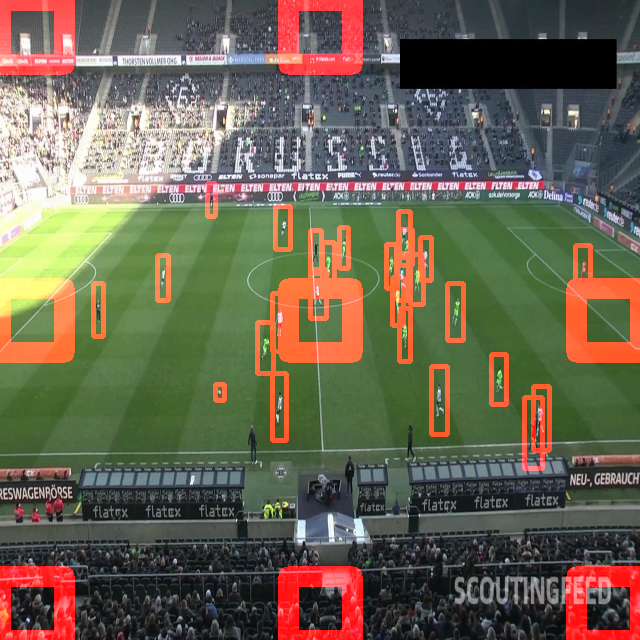

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread("/content/dataset_football/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg")  # Replace with the path to your image
# image = cv2.imread("/content/dataset_football/train/images/4b770a_7_4_png.rf.0d32debf0134ad7c91f72cae1647cc7c.jpg")
image = cv2.resize(image, (im_size_x, im_size_y), interpolation = cv2.INTER_AREA)

for idx, gt_mask in enumerate(gts_masks):
    # print(f"object {idx}")
    gt = gt_mask[0][:-1]
    print(f"gt: {gt}")
    mask = gt_mask[1]
    print(f"mask: {mask}")

    # Create a blank frame
    frame = np.zeros_like(image, dtype=np.uint8)

    # Draw the border lines on the frame
    cv2.rectangle(frame, (int(gt[0]), int(gt[1])), (int(gt[2]), int(gt[3])), (0, 0, 255), 4)
    cv2.rectangle(frame, (int(mask[1]), int(mask[0])), (int(mask[3]), int(mask[2])), (0, 0, 255), 20)

    crop_in_gt(mask, gt)

    image = cv2.bitwise_or(image, frame)

# mm  = [806.76, 636.52, 842.42, 674.28] # 453.8025, 636.52, 473.86125, 674.28
#                                        # 458.81718750000005, 645.9599999999999, 468.8465625, 664.84
# frame = np.zeros_like(image, dtype=np.uint8)
# cv2.rectangle(frame, (int(mm[0]*im_size_x/1920), int(mm[1])), (int(mm[2]*im_size_x/1920), int(mm[3])), (0, 0, 255), 2)
# image = cv2.bitwise_or(image, frame)

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

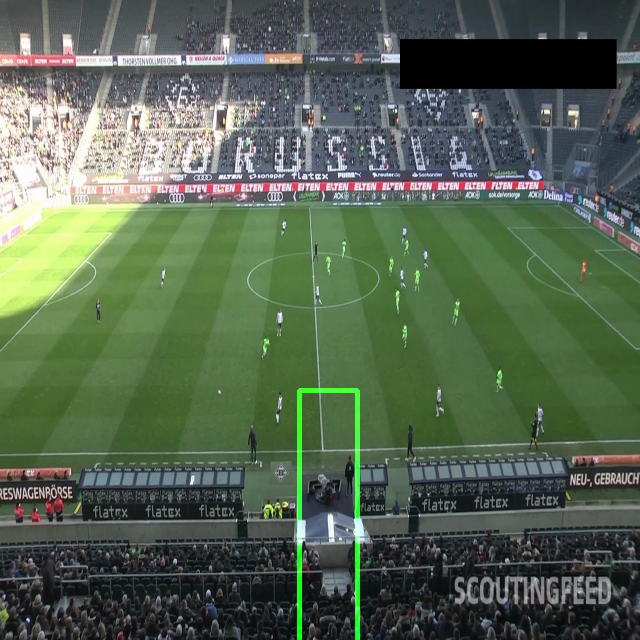

In [ ]:
# Load image
image = cv2.imread("/content/dataset_football/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg")  # Replace with the path to your image
image = cv2.resize(image, (im_size_x,im_size_y), interpolation = cv2.INTER_AREA)

nw_mask_cr_steps =  [[0, 0, 224, 224],
               [       44.8,           0,      268.8,         224],
               [       89.6,        44.8,         224,       179.2],
               [     171.49,      104.68,      195.87,      119.32],
               [     136.84,      104.81,      230.52,      125.04]
               ]
steps = [0,1,2,10,20]
idx = 4

nw_mask = nw_mask_cr_steps[idx]
nw_mask = [nw_mask[0] * im_size_x/224 , nw_mask[1] * im_size_y/224, nw_mask[2] * im_size_x/224, nw_mask[3] * im_size_y/224]

# Create a blank frame
frame = np.zeros_like(image, dtype=np.uint8)

# Draw the border lines on the frame
cv2.rectangle(frame, (int(nw_mask[1]), int(nw_mask[0])), (int(nw_mask[3]), int(nw_mask[2])), (0, 255, 0), 4)

image = cv2.bitwise_or(image, frame)

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
aa = read_label(label_file)

In [ ]:
bb = transform_groundtruth_to_keyvalues(aa, classes_name_index, img_size=im_size)
bb

In [ ]:
{k: list(map(lambda x: xywh2xyxy_in_list(x, img_size_x=1, img_size_y=1), v )) for k, v in bb.items()}


[72.0, 504.0, 136.0, 568.0]
[288.0, 504.0, 352.0, 568.0]
[504.0, 504.0, 568.0, 568.0]
[72.0, 288.0, 136.0, 352.0]
[288.0, 288.0, 352.0, 352.0]
[504.0, 288.0, 568.0, 352.0]
[72.0, 72.0, 136.0, 136.0]
[288.0, 72.0, 352.0, 136.0]
[504.0, 72.0, 568.0, 136.0]


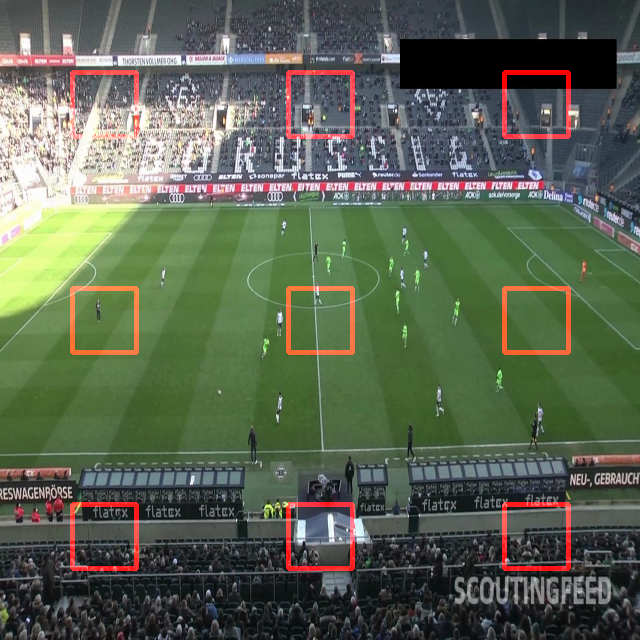

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image
image = cv2.imread("/content/dataset_football/train/images/08fd33_0_1_png.rf.59954a0e7db57cb7481c52f01f7195e5.jpg")  # Replace with the path to your image
# image = cv2.imread("/content/dataset_football/train/images/4b770a_7_4_png.rf.0d32debf0134ad7c91f72cae1647cc7c.jpg")
image = cv2.resize(image, (im_size_x, im_size_y), interpolation = cv2.INTER_AREA)
ns = nine_squared_adjust((im_size_x, im_size_y))

for x_y_axis in ns.values():
    print(x_y_axis)


    # Create a blank frame
    frame = np.zeros_like(image, dtype=np.uint8)

    # Draw the border lines on the frame
    cv2.rectangle(frame, (int(x_y_axis[1]), int(x_y_axis[0])), (int(x_y_axis[3]), int(x_y_axis[2])), (0, 0, 255), 4)

    image = cv2.bitwise_or(image, frame)

# mm  = [806.76, 636.52, 842.42, 674.28] # 453.8025, 636.52, 473.86125, 674.28
#                                        # 458.81718750000005, 645.9599999999999, 468.8465625, 664.84
# frame = np.zeros_like(image, dtype=np.uint8)
# cv2.rectangle(frame, (int(mm[0]*im_size_x/1920), int(mm[1])), (int(mm[2]*im_size_x/1920), int(mm[3])), (0, 0, 255), 2)
# image = cv2.bitwise_or(image, frame)

# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# dir_path = '/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Original/'
dir_path =   '/content/drive/MyDrive/NIDA/DADS9000/Projects/DRL_Model/Backbone_VGG16/'
start_word = "rendered_image"
end_word = ".png"

files_to_delete = [file for file in os.listdir(dir_path) if file.startswith(start_word) and file.endswith(end_word)]

for file_to_delete in files_to_delete:
    file_path = os.path.join(dir_path, file_to_delete)
    os.remove(file_path)

image[new_mask[1]:new_mask[3], new_mask[0]:new_mask[2]]:  [[[ 31  63  69]
  [ 33  65  71]
  [ 39  68  75]
  ...
  [ 35  60  92]
  [ 19  47  77]
  [  2  30  60]]

 [[ 48  80  86]
  [ 48  80  86]
  [ 51  80  87]
  ...
  [ 43  67 103]
  [ 28  53  87]
  [  8  35  69]]

 [[ 62  94 100]
  [ 60  92  98]
  [ 59  88  95]
  ...
  [ 42  64 105]
  [ 29  52  90]
  [ 21  44  82]]

 ...

 [[148 155 158]
  [152 159 162]
  [155 162 165]
  ...
  [ 51  50  60]
  [ 52  51  61]
  [ 52  51  60]]

 [[152 156 161]
  [158 162 167]
  [155 159 164]
  ...
  [ 81  82  92]
  [ 83  82  92]
  [ 83  82  92]]

 [[128 131 136]
  [128 131 136]
  [125 127 135]
  ...
  [ 97  97 109]
  [ 99  98 108]
  [ 99  98 108]]]


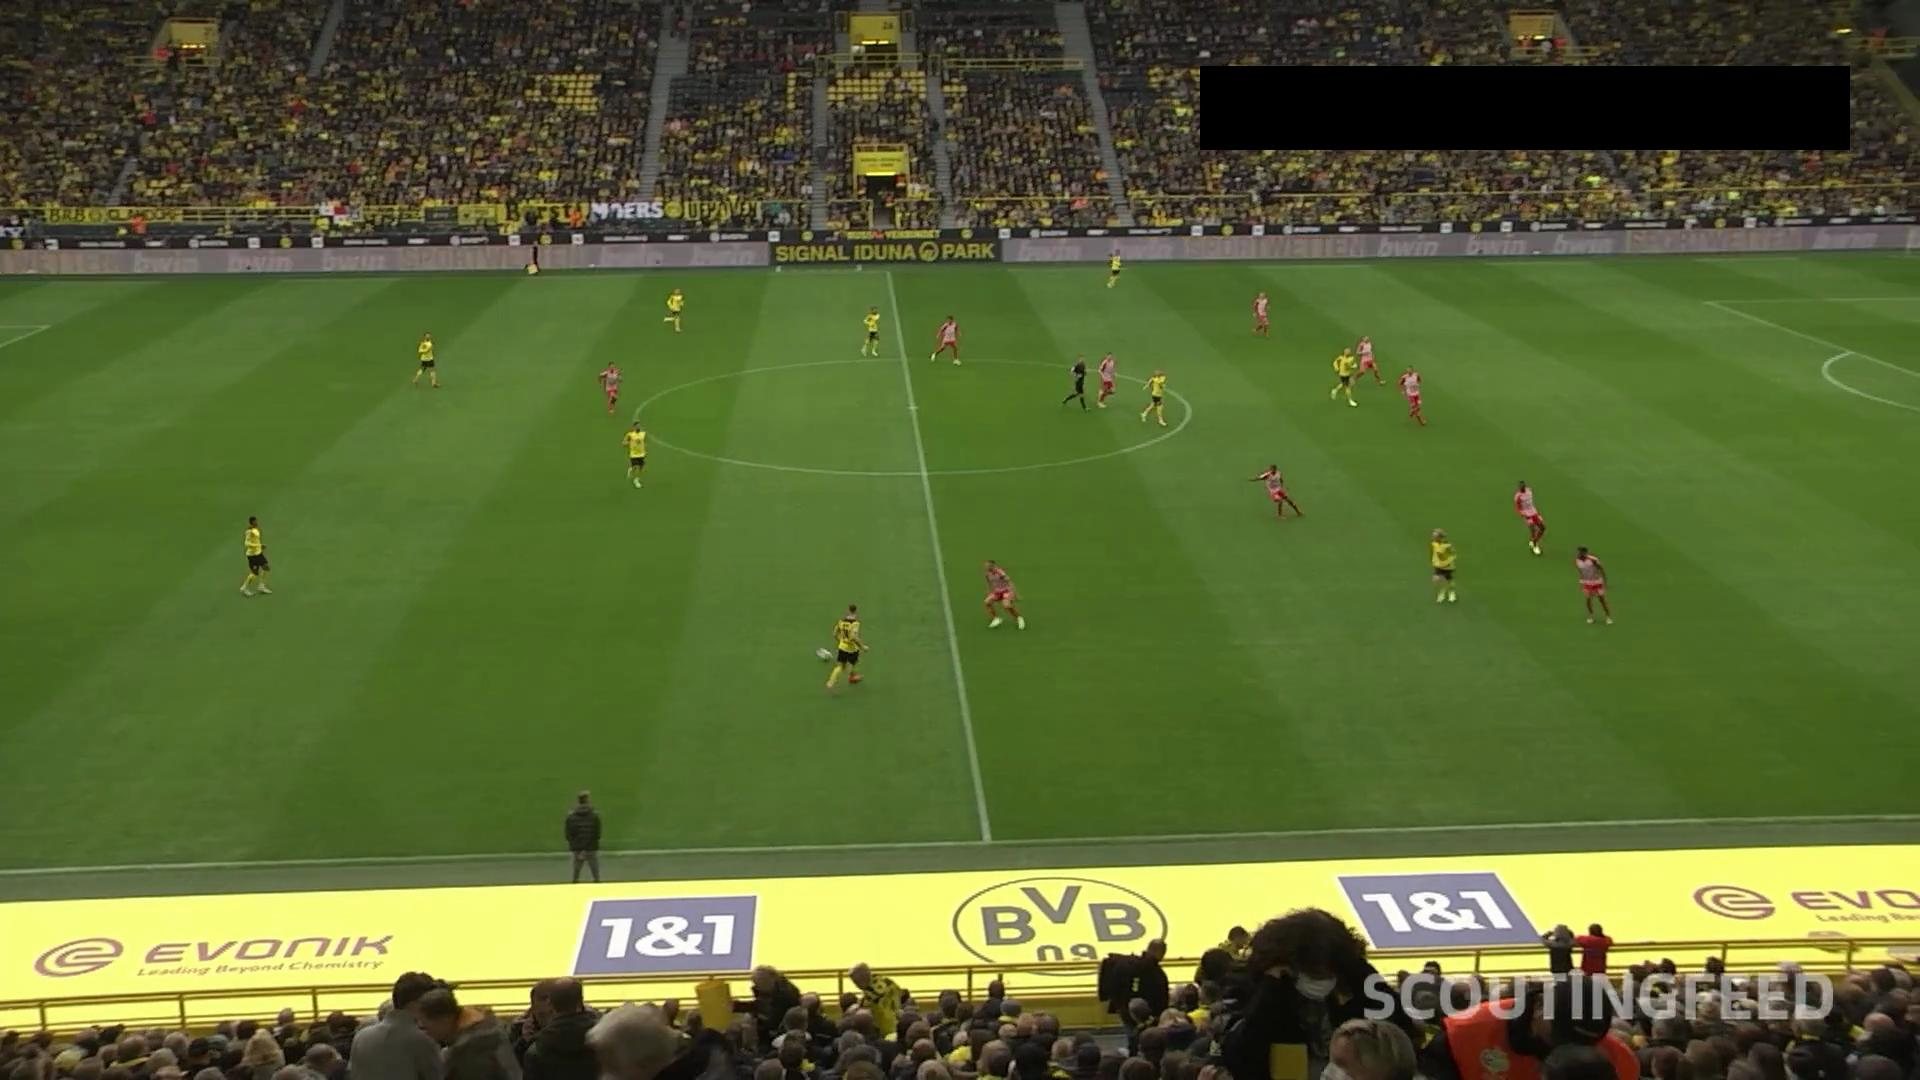

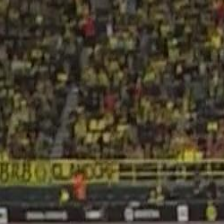

In [ ]:

# Sample image path
image_path = "/content/dataset_football/train/images/4b770a_7_4_png.rf.0d32debf0134ad7c91f72cae1647cc7c.jpg"

# Sample bounding box [x1, y1, x2, y2]
bounding_box = [50, 100, 300, 250]

# Read the sample image using OpenCV
sample_image = cv2.imread(image_path)

# Call the crop_image function to extract the region of interest
cropped_image = crop_image(sample_image, bounding_box)

# Display the original and cropped images
cv2_imshow(sample_image)
cv2_imshow(cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
